In [2]:
# Importing Dependencies

import numpy as np
import pickle
import gym
import time
import math
from gym import spaces
from operator import add
from google.colab import widgets
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random
import pandas as pd

# PART 1

In [7]:
class LawnMower(gym.Env):
    def __init__(self):

        # Defining state
        self.state = np.zeros((4, 4))

        # Positions of battery, rock and goal
        self.battery = [[3,0],[3,2]]
        self.rock = [[0, 2],[1, 3]]
        self.goal = [3, 3]

        # Starting Position of agent
        self.agent_pos = np.array([0, 0]) 

        # Action space - 4 possible actions: up, down, left, right
        self.action_space = spaces.Discrete(4)  

        # Observation space
        self.observation_space = range(16)

    def step(self, action):

        # Defining the movement of agent
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')

        # Keeping the agent inbounds
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1  # penalty for hitting the wall
            done = False
            return self.state, reward, done, {}

        # New position - rock, battery, goal

        # Rock
        if list(new_pos) in self.rock:
            reward = -10  # Penalty
            done = False
            return self.state, reward, done, {}
        # Battery
        elif list(new_pos) in self.battery:
            reward = 10  # Bonus
        # Goal
        elif list(new_pos) == list(self.goal):
            reward = 1000  # bonus
        else:
            reward = -1 

        # Updating agent position
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos

        # If the agent reaches goal the code will be terminated
        if reward == 1000:
            done = True
        else:
            done = False

        return self.state, reward, done, {}

    def reset(self):

        # Resetting the state 
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1

        # Resetting the agent's position
        self.agent_pos = np.array([0, 0])

        return self.state

    def render(self, mode='human'):

      # Dictionary for cell types
      cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}

      # creating state with integer values
      state_int = self.state.astype(int)

      # Replacing integer values with the above cell types
      for k, v in cell_types.items():
          state_int[self.state == k] = k

      # Plot
      fig, ax = plt.subplots(figsize=(4,4))  
      ax.set_xlim(0,4)
      ax.set_ylim(0,4)
      plt.grid()
      plt.xticks([0,1,2,3,4])
      plt.yticks([0,1,2,3,4]) 
      ax.grid(which='both', color='k', linewidth=2)  
      

      # Inserting 'battery' in grid
      for battery in self.battery:
          ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

      # Inserting 'rock' in grid
      for rock in self.rock:
          ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

      # Inserting 'goal' in grid
      ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

      # Inserting 'agent' in grid
      ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

      plt.show()

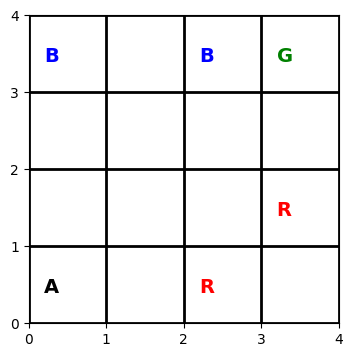

In [8]:
# Visualizing our environment

env = LawnMower()
env.reset()
env.render() 

Step: 1
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1


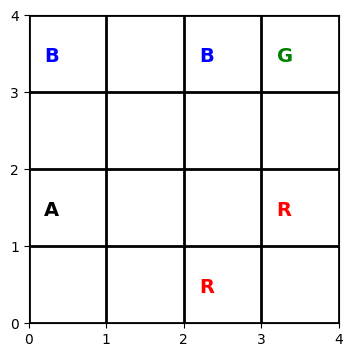

Step: 2
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1


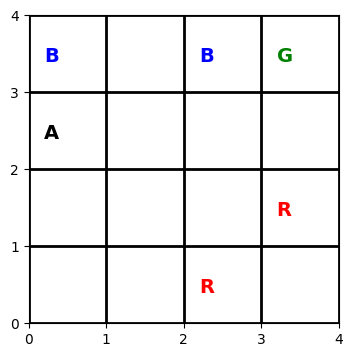

Step: 3
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1


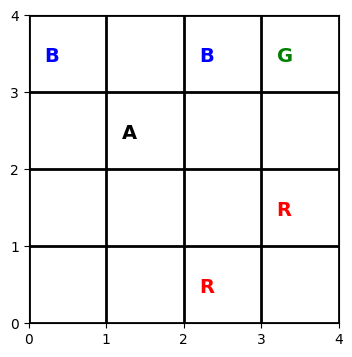

Step: 4
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1


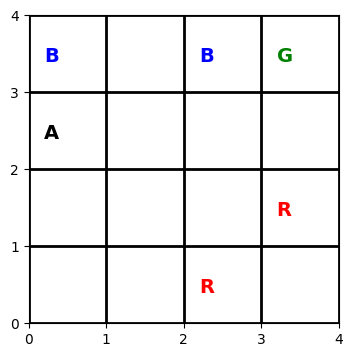

Step: 5
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1


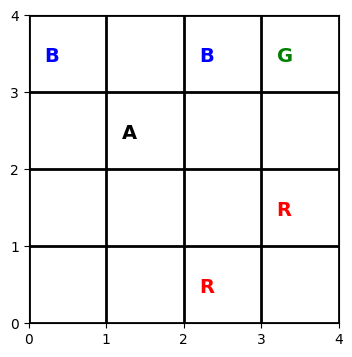

Step: 6
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1


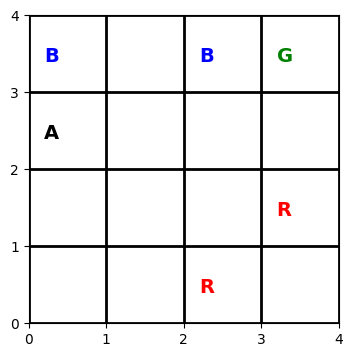

Step: 7
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1


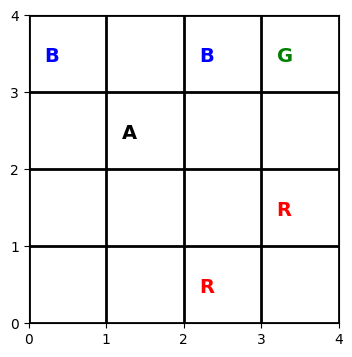

Step: 8
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1


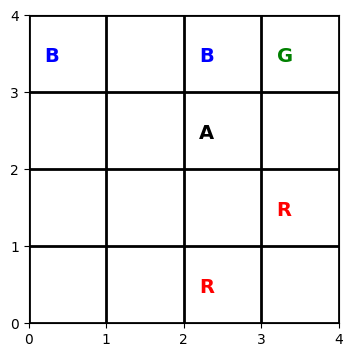

Step: 9
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1


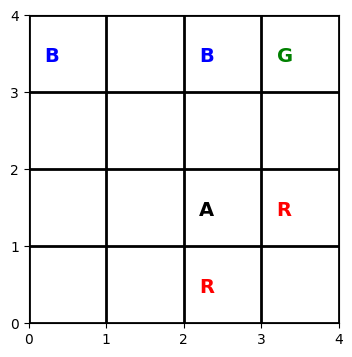

Step: 10
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1


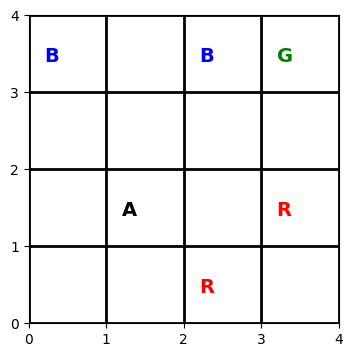

The total reward is  -10


In [53]:
# Running our agent for 10 steps

env = LawnMower()
obs = env.reset()
done = False
sum = 0

# max time steps = 10
for each in range(10):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    env.render()
    if done:
      break
print("The total reward is ", sum)


# PART 2 - SARSA

#### Hyperparameters


*  gamma=0.9
*  epsilon=1.0
*   epsilon_decay=0.99
*   epsilon_min=0.01
*   Max time steps = 20

Step: 1
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -1


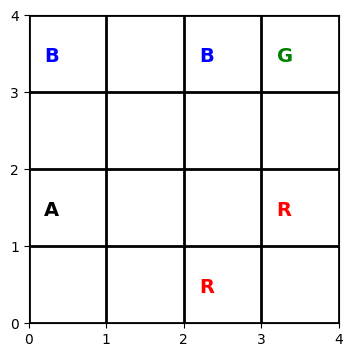

Step: 2
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -2


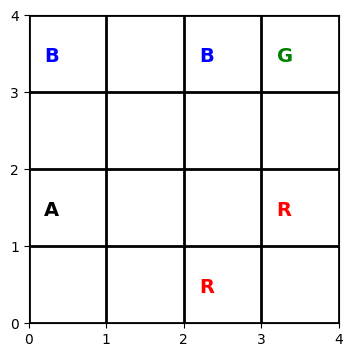

Step: 3
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -3


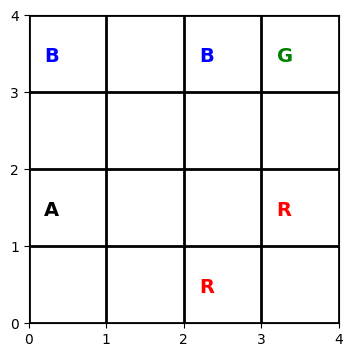

Step: 4
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -4


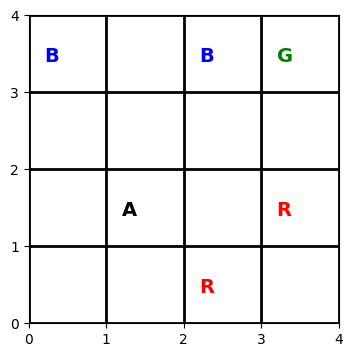

Step: 5
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -5


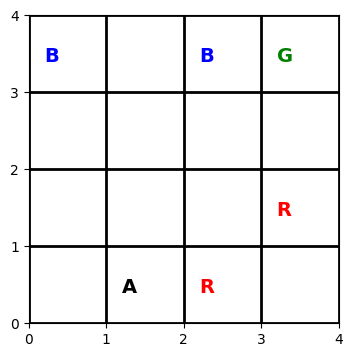

Step: 6
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -6


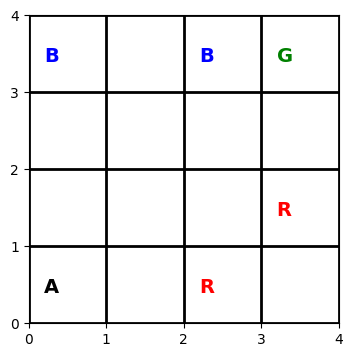

Step: 7
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -7


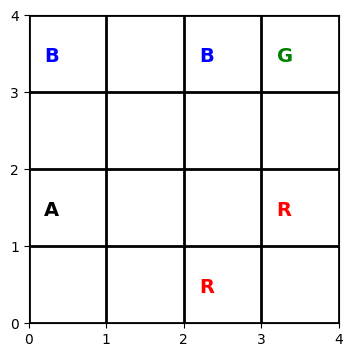

Step: 8
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -8


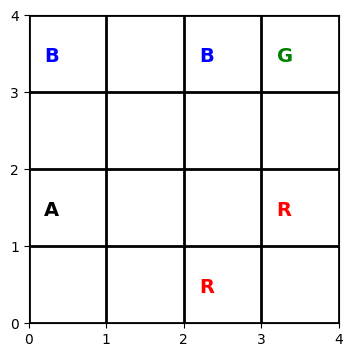

Step: 9
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -9


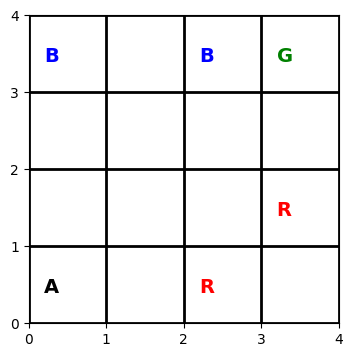

Step: 10
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -10


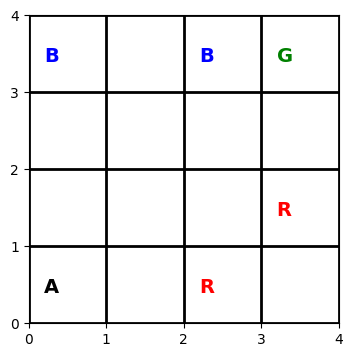

Step: 11
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -11


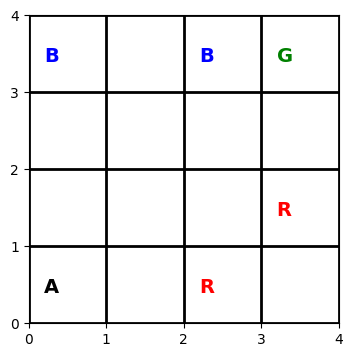

Step: 12
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -12


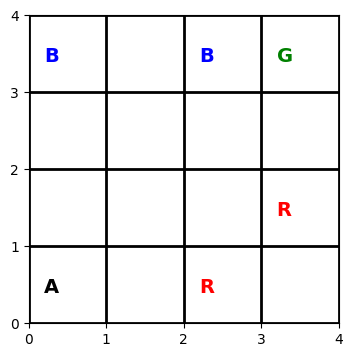

Step: 13
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -13


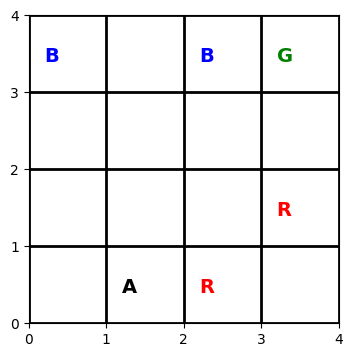

Step: 14
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -14


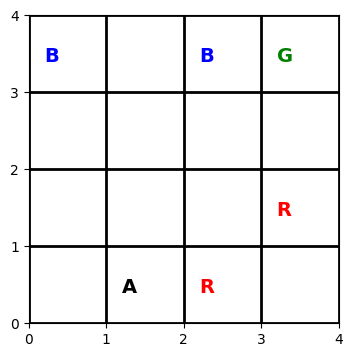

Step: 15
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -15


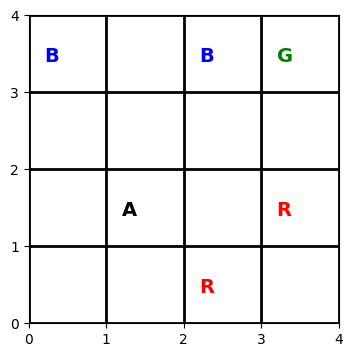

Step: 16
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -16


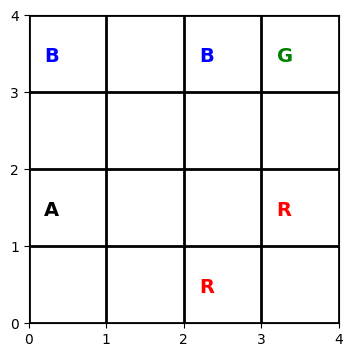

Step: 17
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -17


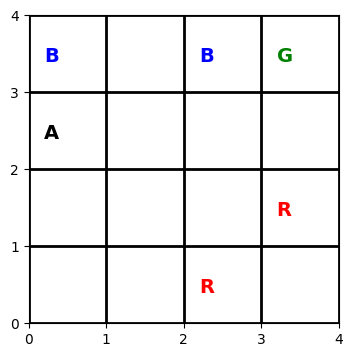

Step: 18
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -18


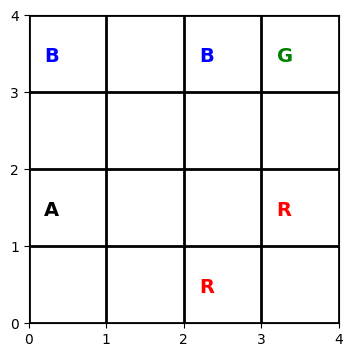

Step: 19
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -19


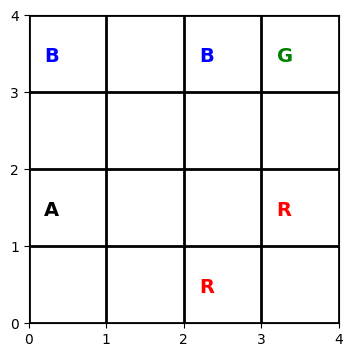

Step: 20
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -20


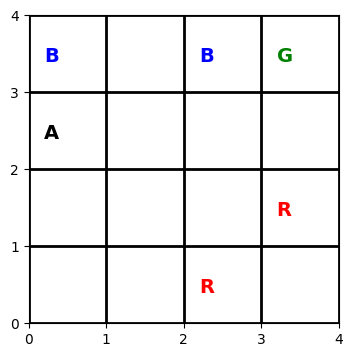

The total reward is  -20


In [56]:
class LawnMower(gym.Env):
    def __init__(self, gamma=0.9, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            # Exploration: choose a random action
            action = np.random.choice(self.action_space.n)
        else:
            # Exploitation: choose the action with the highest Q-value
            action = np.argmax(self.Q[state_flat])
        
        return action


    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
        else:
            reward = -1
        
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000:
            done = True
        else:
            done = False

        # Updating agent position
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos

        target = reward + self.gamma * np.max(self.Q[np.argmax(self.state), :])
        
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):

      cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}
      state_int = self.state.astype(int)

      for k, v in cell_types.items():
          state_int[self.state == k] = k

      # Plot
      fig, ax = plt.subplots(figsize=(4,4)) 
      ax.set_xlim(0,4)
      ax.set_ylim(0,4)
      plt.grid()
      plt.xticks([0,1,2,3,4])
      plt.yticks([0,1,2,3,4])
      ax.grid(which='both', color='k', linewidth=2) 
      

      # Inserting 'battery' in grid
      for battery in self.battery:
          ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

      # Inserting 'rock' in grid
      for rock in self.rock:
          ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

      # Inserting 'goal' in grid
      ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

      # Inserting 'agent' in grid
      ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

      plt.show()


env = LawnMower()
obs = env.reset()
done = False
sum = 0

for each in range(20):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

### Hyperparameter Tuning 
 We will be changing the hyperparameters - discount factpr and epsilon decay rate keeping reamining constant

**Setup 1**


gamma=0.2














Step: 1
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -1


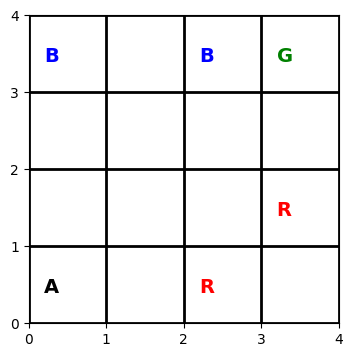

Step: 2
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -2


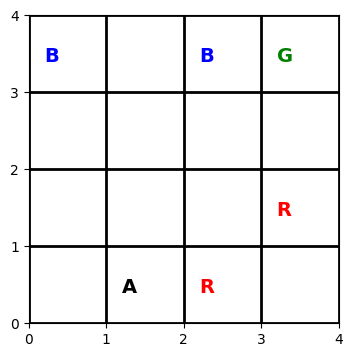

Step: 3
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -3


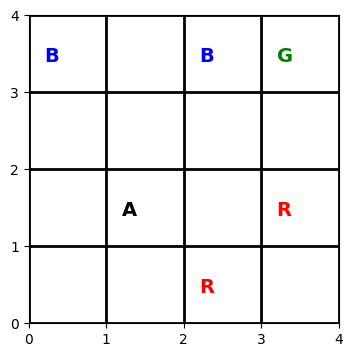

Step: 4
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -4


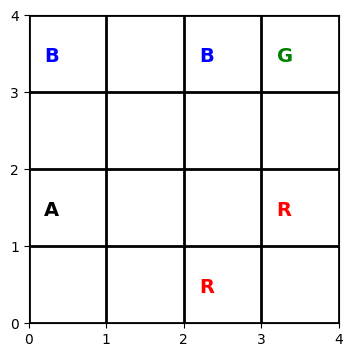

Step: 5
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -5


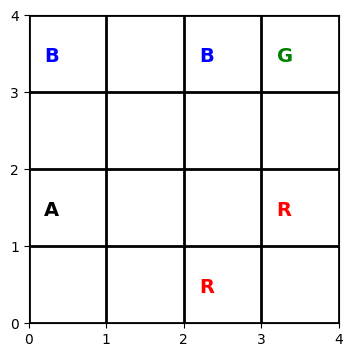

Step: 6
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -6


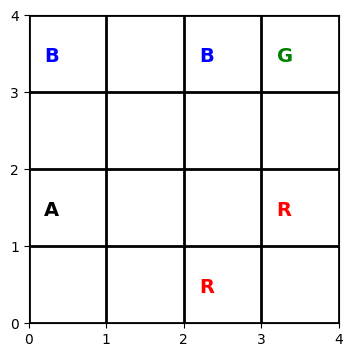

Step: 7
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -7


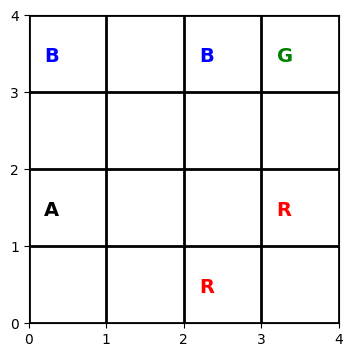

Step: 8
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -8


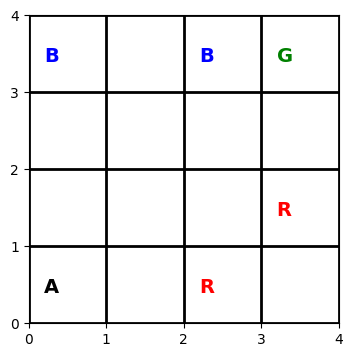

Step: 9
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -9


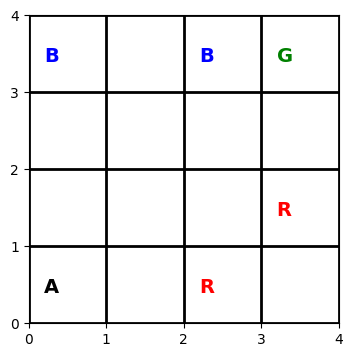

Step: 10
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -10


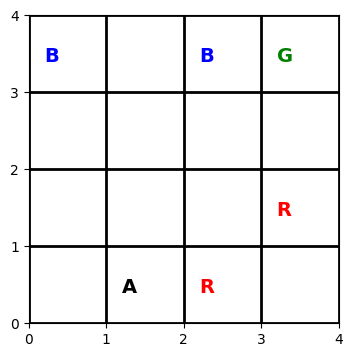

Step: 11
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -11


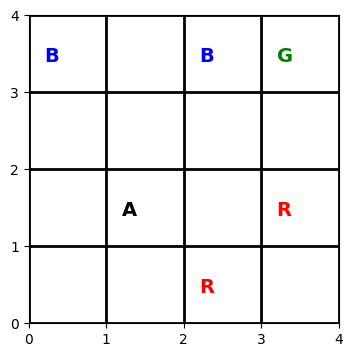

Step: 12
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -12


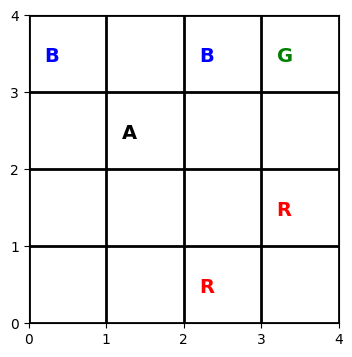

Step: 13
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -13


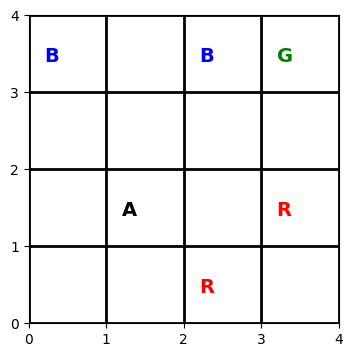

Step: 14
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -14


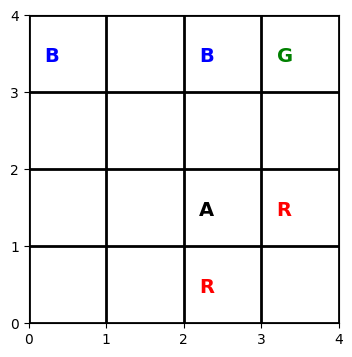

Step: 15
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -10
Cummulative Reward: -24


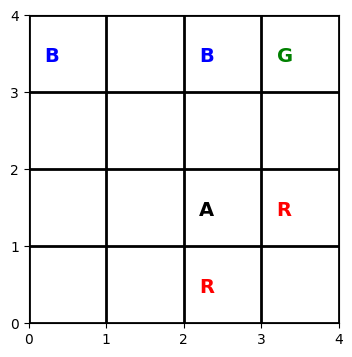

Step: 16
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -25


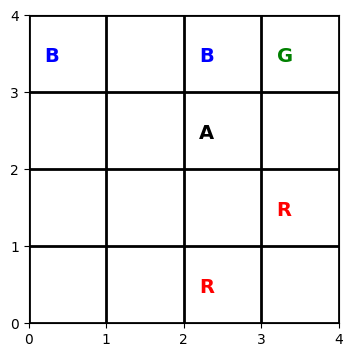

Step: 17
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
Action: 1
Reward: 10
Cummulative Reward: -15


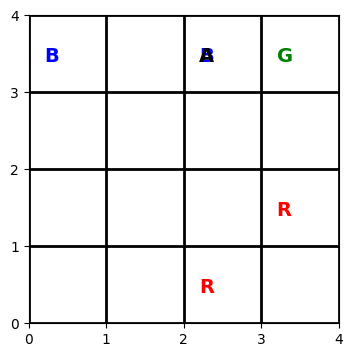

Step: 18
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
Action: 3
Reward: 1000
Cummulative Reward: 985


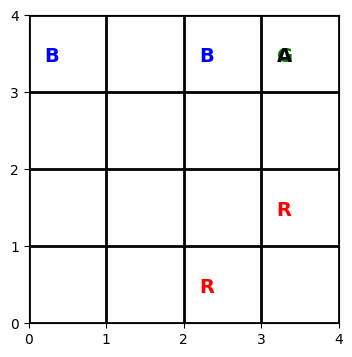

The total reward is  985


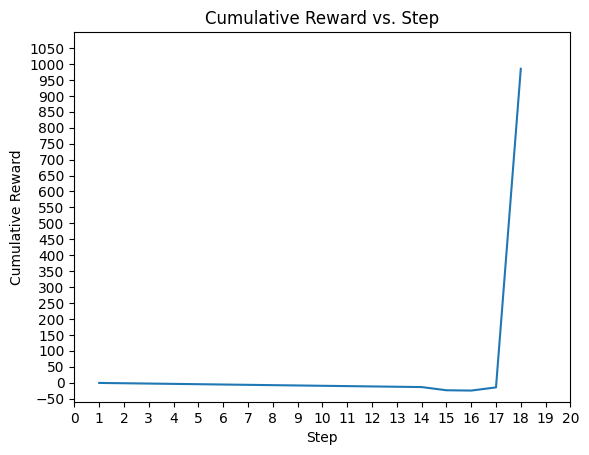

In [51]:
class LawnMower(gym.Env):
    def __init__(self, gamma=0.2, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.action_space.n)
        else:
            action = np.argmax(self.Q[state_flat])
        
        return action


    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
        else:
            reward = -1
        
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000:
            done = True
        else:
            done = False

        # Updating agent position
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos

        target = reward + self.gamma * np.max(self.Q[np.argmax(self.state), :])
        
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):
      cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}
      state_int = self.state.astype(int)

      for k, v in cell_types.items():
          state_int[self.state == k] = k

      # Plot
      fig, ax = plt.subplots(figsize=(4,4)) 
      ax.set_xlim(0,4)
      ax.set_ylim(0,4)
      plt.grid()
      plt.xticks([0,1,2,3,4])
      plt.yticks([0,1,2,3,4]) 
      ax.grid(which='both', color='k', linewidth=2)  

      # Inserting 'battery' in grid
      for battery in self.battery:
          ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

      # Inserting 'rock' in grid
      for rock in self.rock:
          ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

      # Inserting 'goal' in grid
      ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

      # Inserting 'agent' in grid
      ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

      plt.show()



env = LawnMower()
obs = env.reset()
done = False
sum = 0

steps = []
cumulative_rewards = []

for each in range(20):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward
    
    steps.append(each + 1)
    cumulative_rewards.append(sum)

    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

# Rewards Plot
plt.plot(steps, cumulative_rewards)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs. Step')

plt.ylim(-60, 1100)
plt.xlim(0,20)
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(-50, 1100, 50))

plt.show()


**SETUP 2**

gamma=0.5


Max time steps = 20

Step: 1
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -1


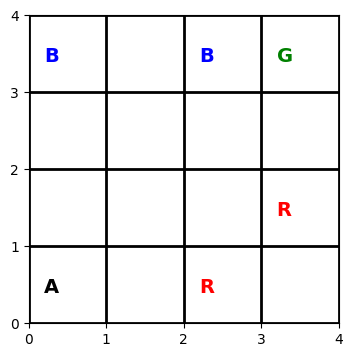

Step: 2
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -2


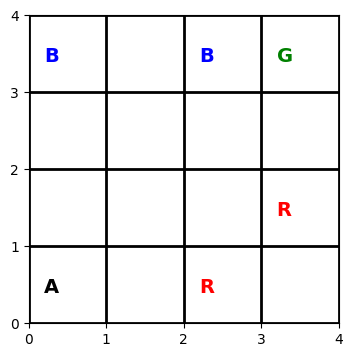

Step: 3
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -3


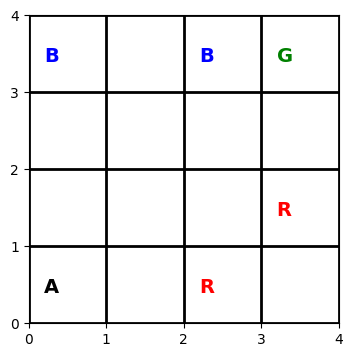

Step: 4
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -4


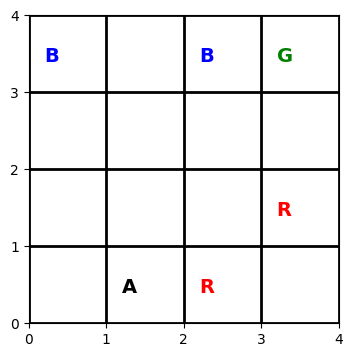

Step: 5
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -5


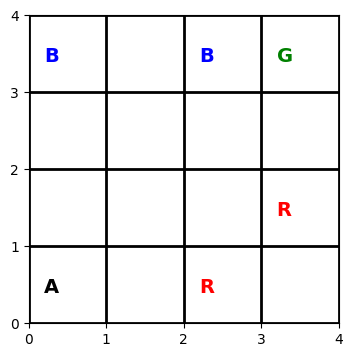

Step: 6
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -6


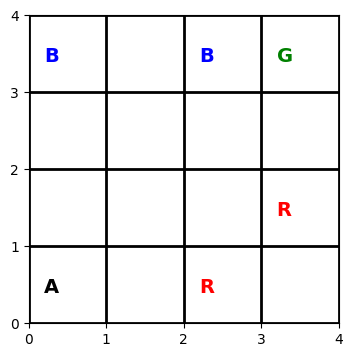

Step: 7
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -7


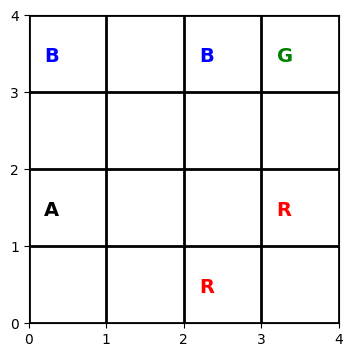

Step: 8
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -8


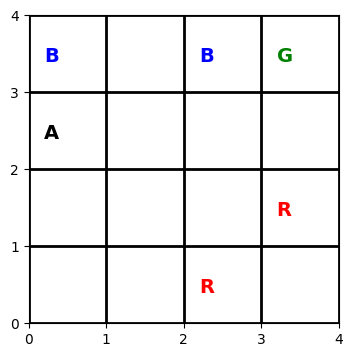

Step: 9
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: 10
Cummulative Reward: 2


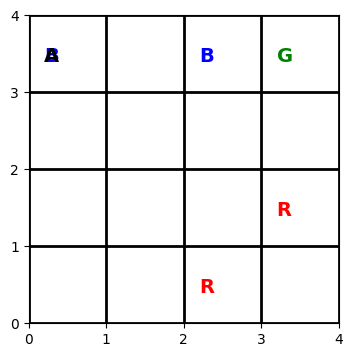

Step: 10
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: 1


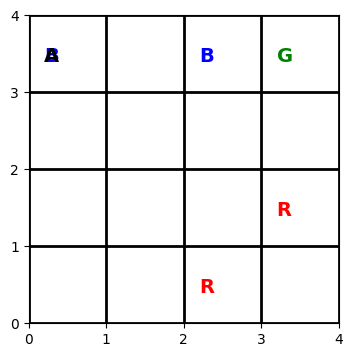

Step: 11
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: 0


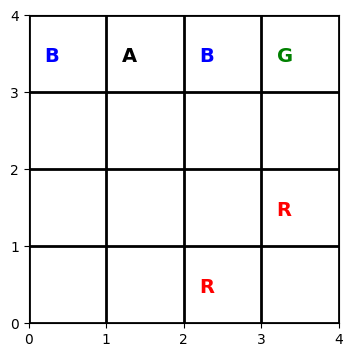

Step: 12
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 2
Reward: 10
Cummulative Reward: 10


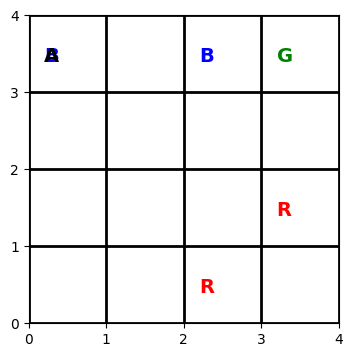

Step: 13
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: 9


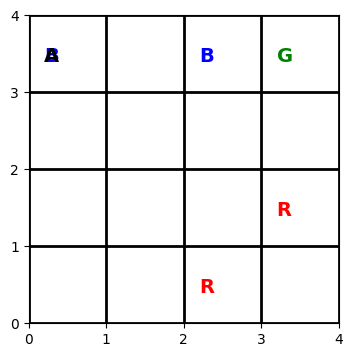

Step: 14
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: 8


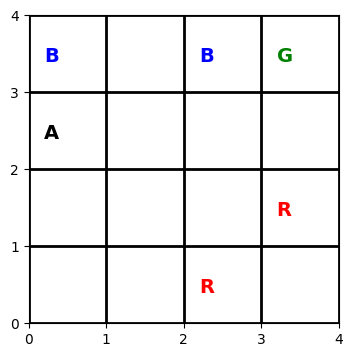

Step: 15
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: 10
Cummulative Reward: 18


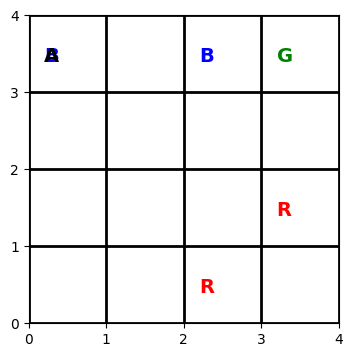

Step: 16
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: 17


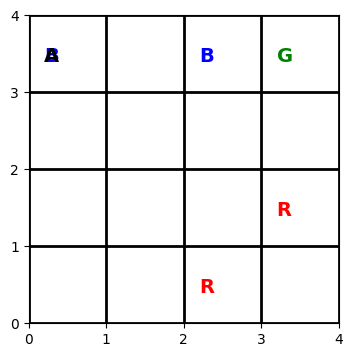

Step: 17
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: 16


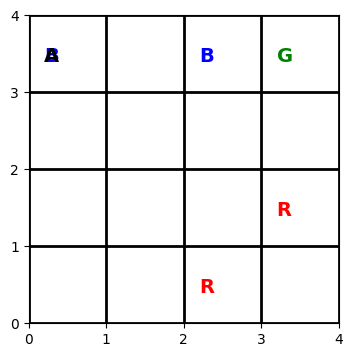

Step: 18
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: 15


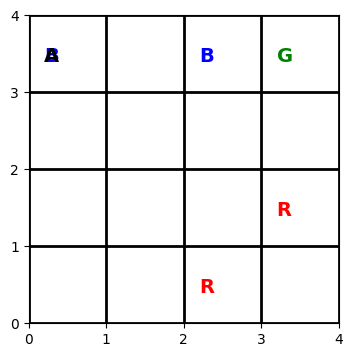

Step: 19
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: 14


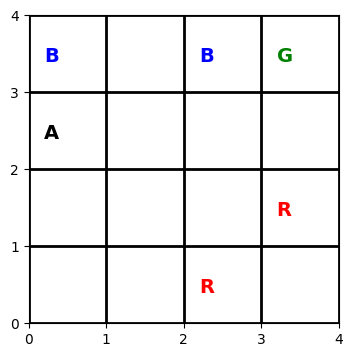

Step: 20
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: 13


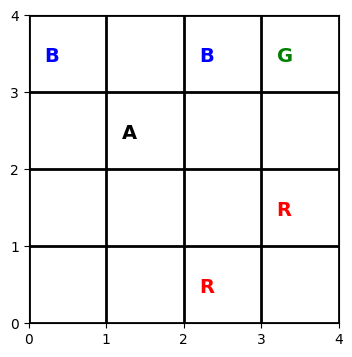

The total reward is  13


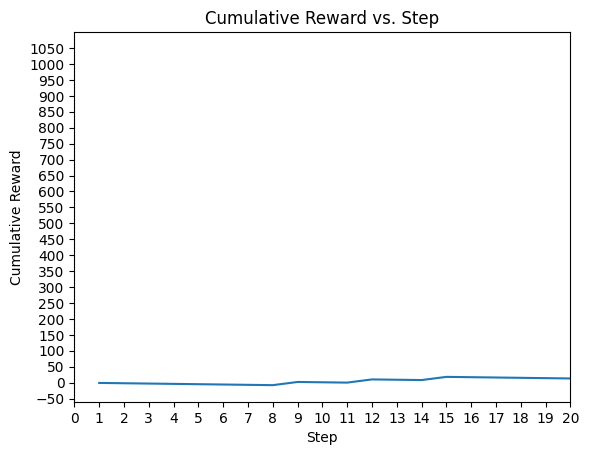

In [52]:
class LawnMower(gym.Env):
    def __init__(self, gamma=0.5, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.action_space.n)
        else:
            action = np.argmax(self.Q[state_flat])
        
        return action


    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
        else:
            reward = -1
        
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000:
            done = True
        else:
            done = False

        # Updating agent position
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos

        target = reward + self.gamma * np.max(self.Q[np.argmax(self.state), :])
        
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):
      cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}
      state_int = self.state.astype(int)

      for k, v in cell_types.items():
          state_int[self.state == k] = k

      # Plot
      fig, ax = plt.subplots(figsize=(4,4))  
      ax.set_xlim(0,4)
      ax.set_ylim(0,4)
      plt.grid()
      plt.xticks([0,1,2,3,4])
      plt.yticks([0,1,2,3,4])
      ax.grid(which='both', color='k', linewidth=2)  

      # Inserting 'battery' in grid
      for battery in self.battery:
          ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

      # Inserting 'rock' in grid
      for rock in self.rock:
          ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

      # Inserting 'goal' in grid
      ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

      # Inserting 'agent' in grid
      ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

      plt.show()


env = LawnMower()
obs = env.reset()
done = False
sum = 0
steps = []
cumulative_rewards = []

for each in range(20):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    steps.append(each + 1)
    cumulative_rewards.append(sum)

    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

# Rewards Plot
plt.plot(steps, cumulative_rewards)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs. Step')

plt.ylim(-60, 1100)
plt.xlim(0,20)
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(-50, 1100, 50))

plt.show()

**SETUP 3**

gamma=1



Step: 1
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -1


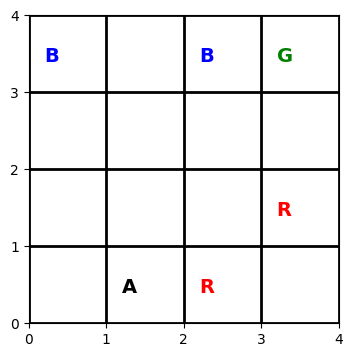

Step: 2
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -2


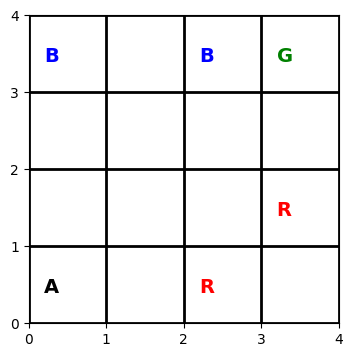

Step: 3
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -3


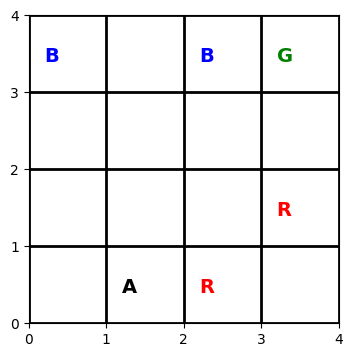

Step: 4
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -4


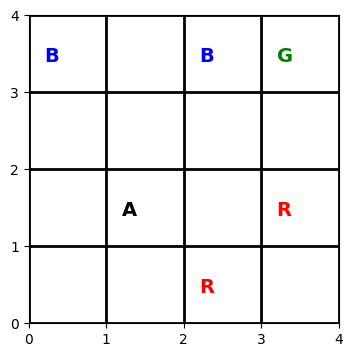

Step: 5
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -5


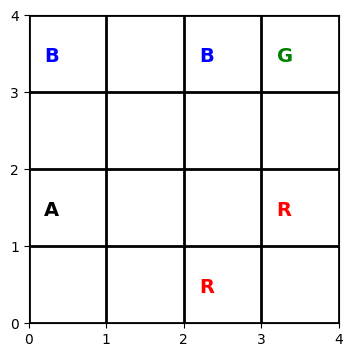

Step: 6
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -6


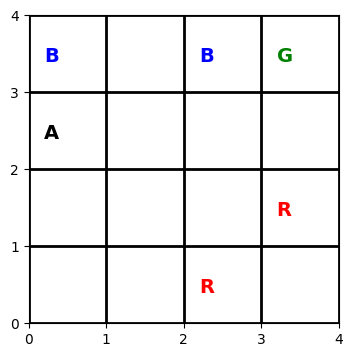

Step: 7
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -7


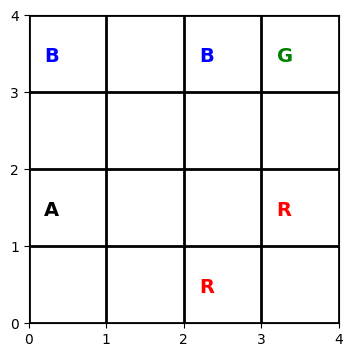

Step: 8
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -8


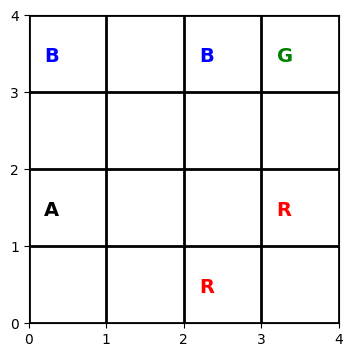

Step: 9
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -9


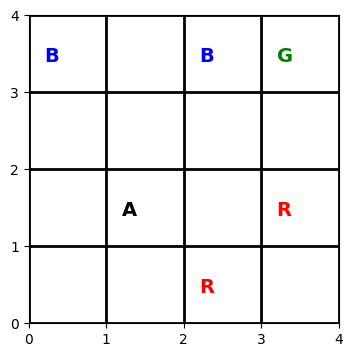

Step: 10
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -10


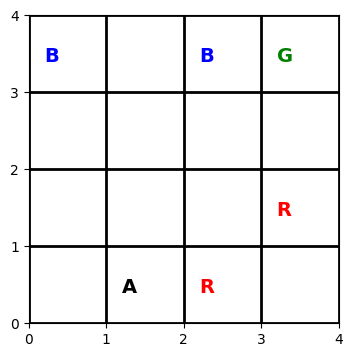

Step: 11
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -20


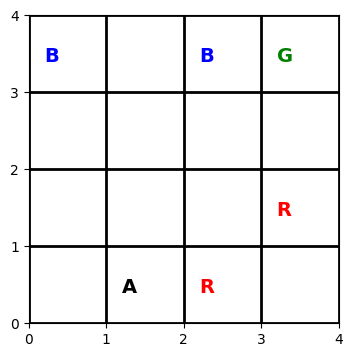

Step: 12
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -21


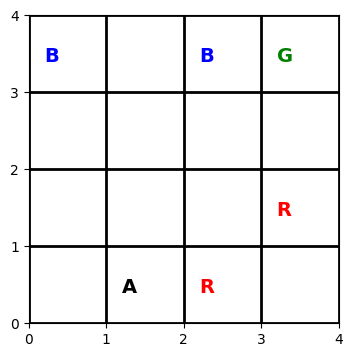

Step: 13
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -22


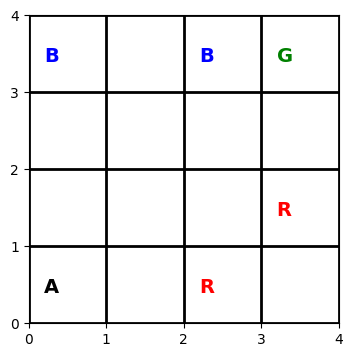

Step: 14
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -23


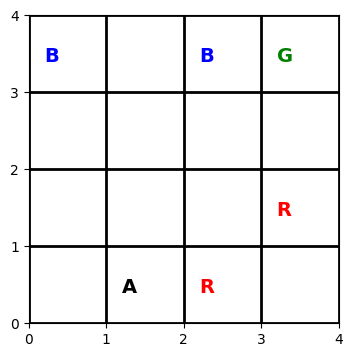

Step: 15
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -24


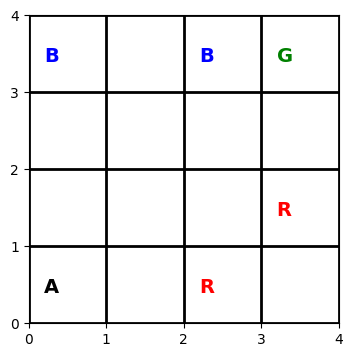

Step: 16
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -25


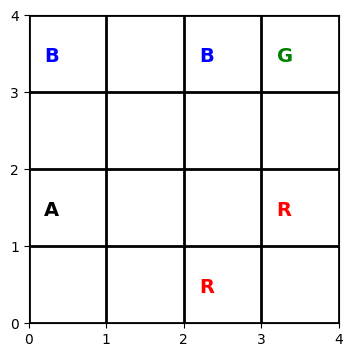

Step: 17
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -26


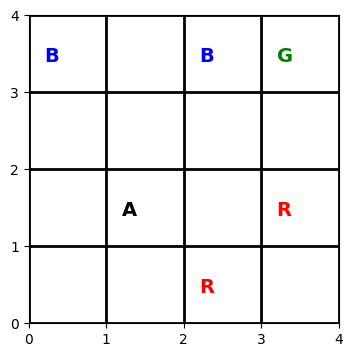

Step: 18
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -27


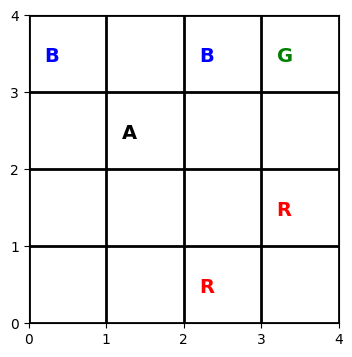

Step: 19
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -28


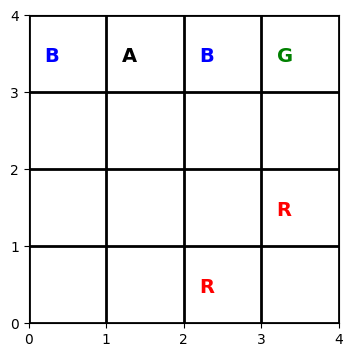

Step: 20
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 2
Reward: 10
Cummulative Reward: -18


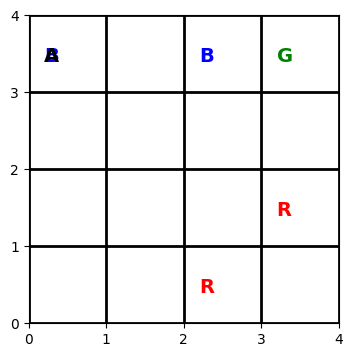

The total reward is  -18


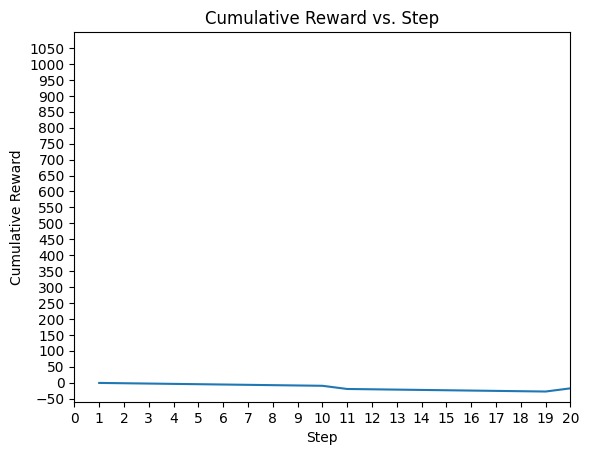

In [53]:
class LawnMower(gym.Env):
    def __init__(self, gamma=1, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            # Exploration: choose a random action
            action = np.random.choice(self.action_space.n)
        else:
            # Exploitation: choose the action with the highest Q-value
            action = np.argmax(self.Q[state_flat])
        
        return action


    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
        else:
            reward = -1
        
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000:
            done = True
        else:
            done = False

        # Updating agent position
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos

        target = reward + self.gamma * np.max(self.Q[np.argmax(self.state), :])
        
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):
      cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}
      state_int = self.state.astype(int)

      for k, v in cell_types.items():
          state_int[self.state == k] = k

      # Plot
      fig, ax = plt.subplots(figsize=(4,4))  
      ax.set_xlim(0,4)
      ax.set_ylim(0,4)
      plt.grid()
      plt.xticks([0,1,2,3,4])
      plt.yticks([0,1,2,3,4]) 
      ax.grid(which='both', color='k', linewidth=2) 

      # Inserting 'battery' in grid
      for battery in self.battery:
          ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

      # Inserting 'rock' in grid
      for rock in self.rock:
          ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

      # Inserting 'goal' in grid
      ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

      # Inserting 'agent' in grid
      ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

      plt.show()


env = LawnMower()
obs = env.reset()
done = False
sum = 0

steps = []
cumulative_rewards = []

for each in range(20):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    steps.append(each + 1)
    cumulative_rewards.append(sum)

    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

# Rewards Plot
plt.plot(steps, cumulative_rewards)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs. Step')
plt.ylim(-60, 1100)
plt.xlim(0,20)
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(-50, 1100, 50))

plt.show()

**SETUP 4** - continuing with gamma = 0.2 for the next setups

gamma = 0.2 

epsilon_decay=0.75


Step: 1
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -1


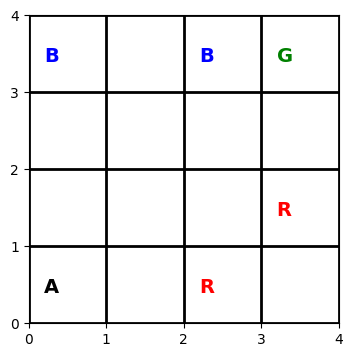

Step: 2
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -2


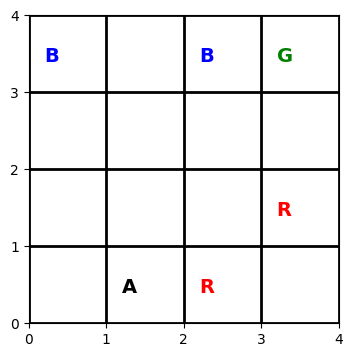

Step: 3
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -3


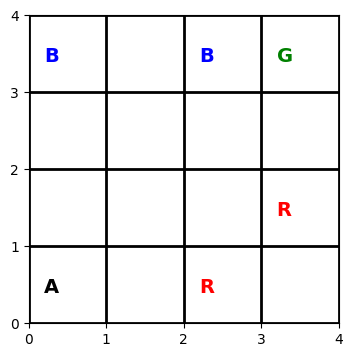

Step: 4
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -4


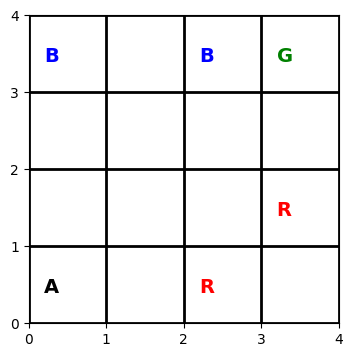

Step: 5
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -5


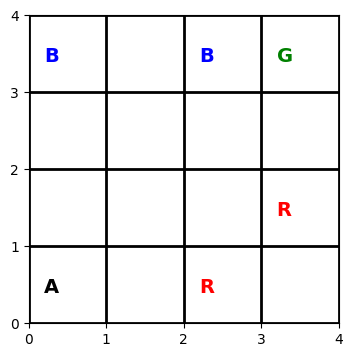

Step: 6
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -6


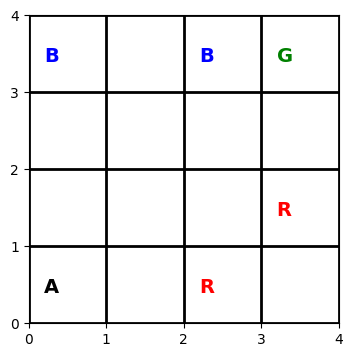

Step: 7
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -7


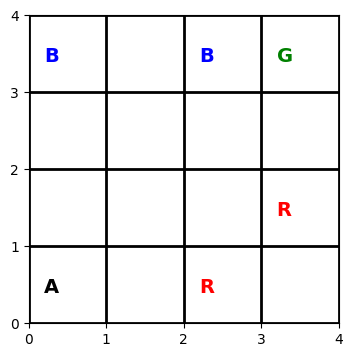

Step: 8
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -8


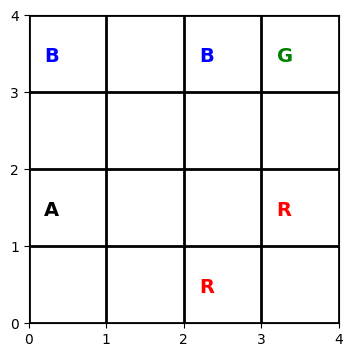

Step: 9
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -9


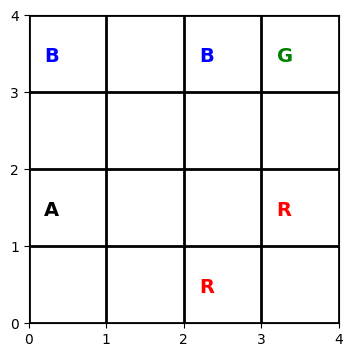

Step: 10
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -10


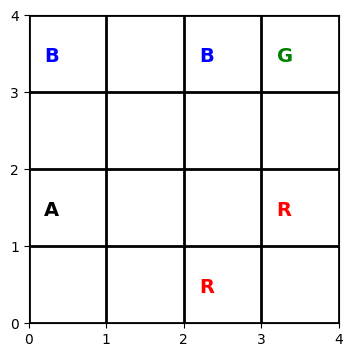

Step: 11
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -11


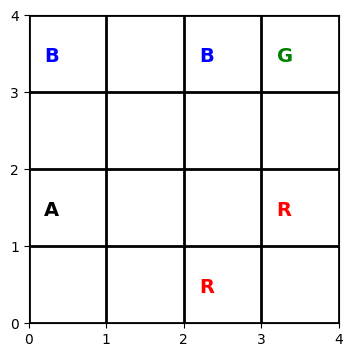

Step: 12
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -12


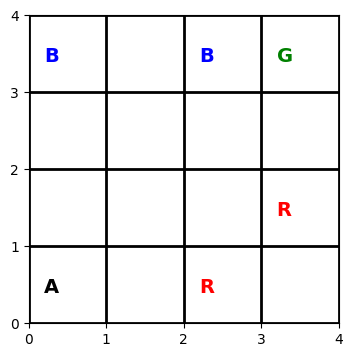

Step: 13
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -13


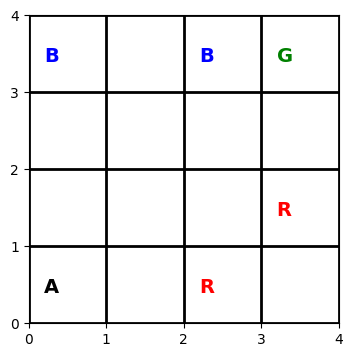

Step: 14
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -14


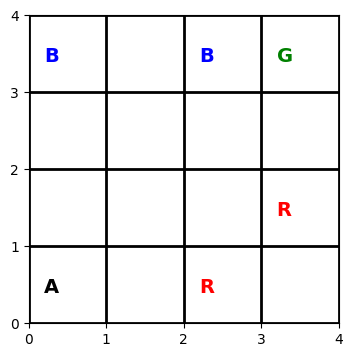

Step: 15
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -15


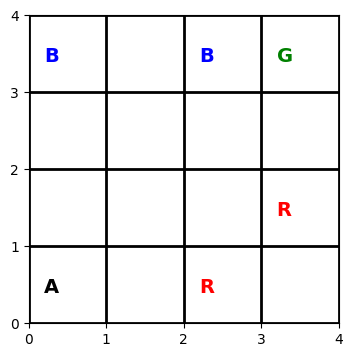

Step: 16
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -16


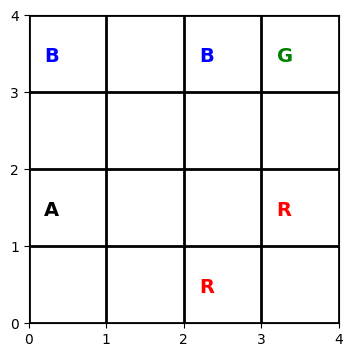

Step: 17
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -17


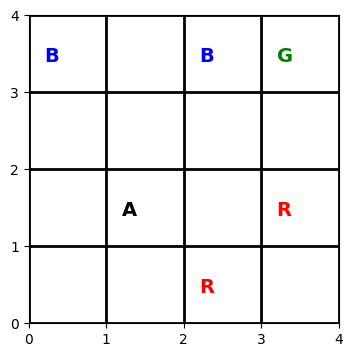

Step: 18
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -18


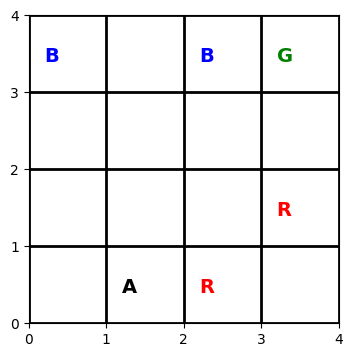

Step: 19
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -19


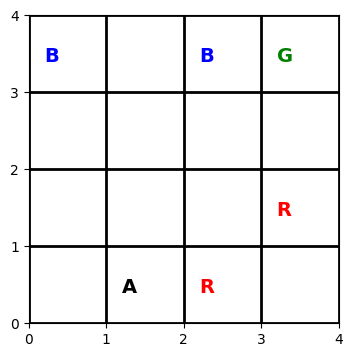

Step: 20
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -20


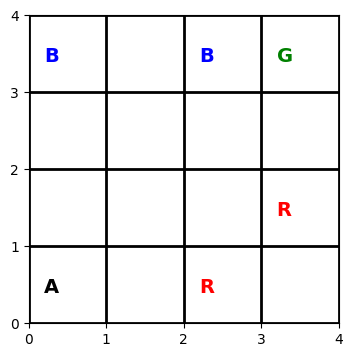

Step: 21
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -21


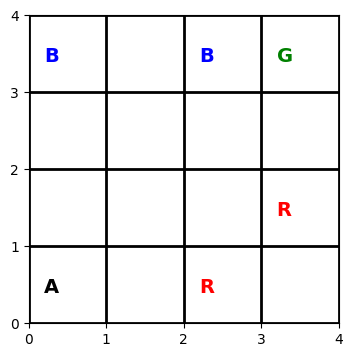

Step: 22
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -22


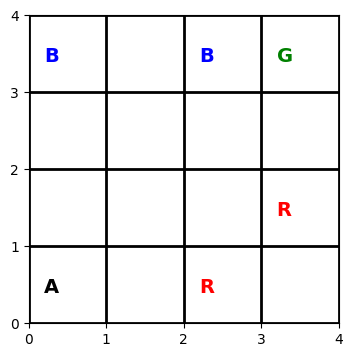

Step: 23
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -23


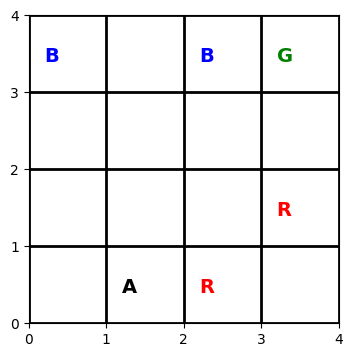

Step: 24
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -24


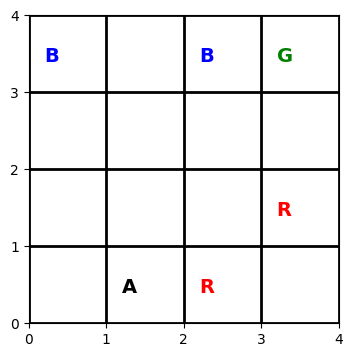

Step: 25
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -25


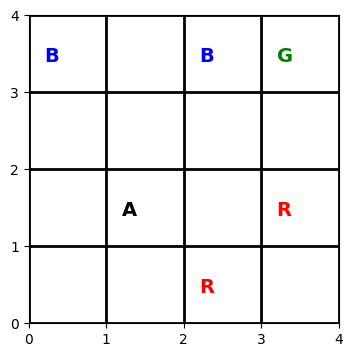

Step: 26
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -26


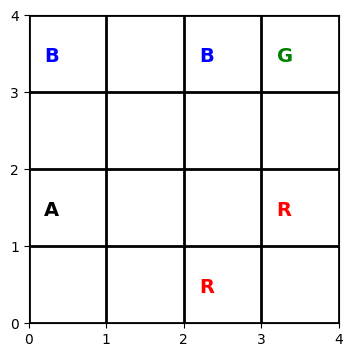

Step: 27
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -27


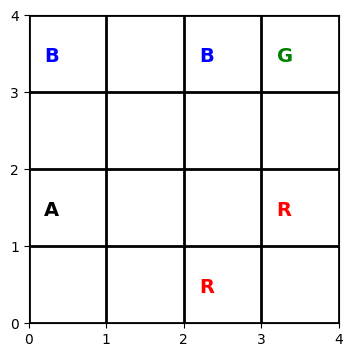

Step: 28
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -28


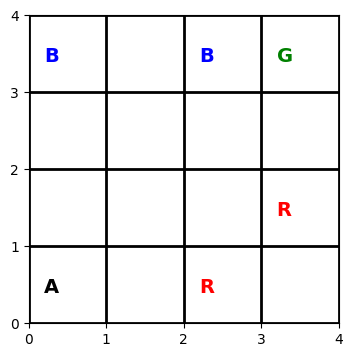

Step: 29
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -29


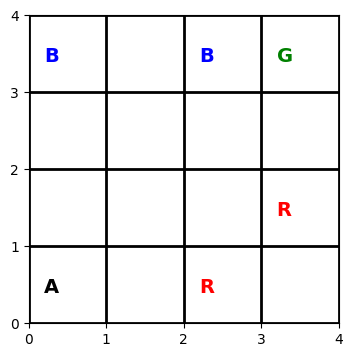

Step: 30
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -30


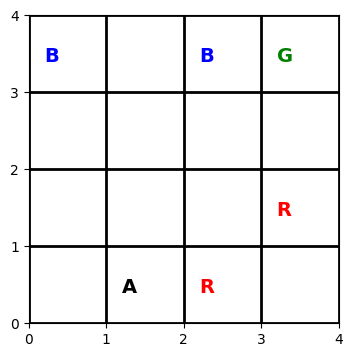

The total reward is  -30


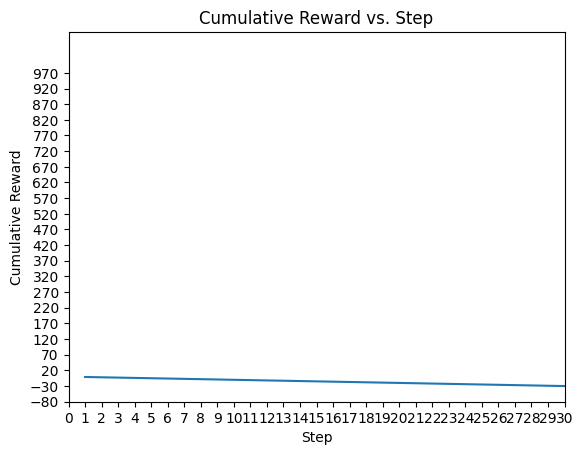

In [60]:
class LawnMower(gym.Env):
    def __init__(self, gamma = 0.2, epsilon=1.0, epsilon_decay=0.75, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.action_space.n)
        else:
            action = np.argmax(self.Q[state_flat])
        
        return action


    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
        else:
            reward = -1
        
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000 :
            done = True
        else:
            done = False

        # Updating agent position
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos

        target = reward + self.gamma * np.max(self.Q[np.argmax(self.state), :])
        
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):
      cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}
      state_int = self.state.astype(int)

      for k, v in cell_types.items():
          state_int[self.state == k] = k

      # Plot
      fig, ax = plt.subplots(figsize=(4,4))
      ax.set_xlim(0,4)
      ax.set_ylim(0,4)
      plt.grid()
      plt.xticks([0,1,2,3,4])
      plt.yticks([0,1,2,3,4]) 
      ax.grid(which='both', color='k', linewidth=2) 

      # Inserting 'battery' in grid
      for battery in self.battery:
          ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

      # Inserting 'rock' in grid
      for rock in self.rock:
          ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

      # Inserting 'goal' in grid
      ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

      # Inserting 'agent' in grid
      ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

      plt.show()


env = LawnMower()
obs = env.reset()
done = False
sum = 0
steps = []
cumulative_rewards = []

for each in range(30):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    steps.append(each + 1)
    cumulative_rewards.append(sum)

    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

# Rewards Plot
plt.plot(steps, cumulative_rewards)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs. Step')
plt.ylim(-80, 1100)
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, 1))
plt.yticks(np.arange(-80, 1010, 50))

plt.show()

#### SETUP 5 

gamma = 0.2
epsilon decay = 0.2

Step: 1
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -1


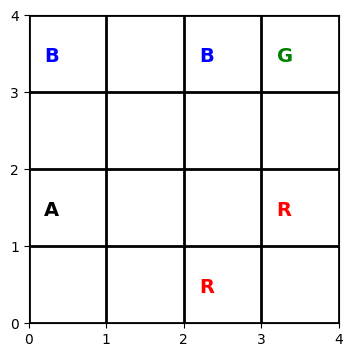

Step: 2
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -2


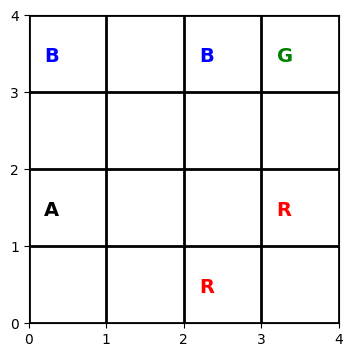

Step: 3
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -3


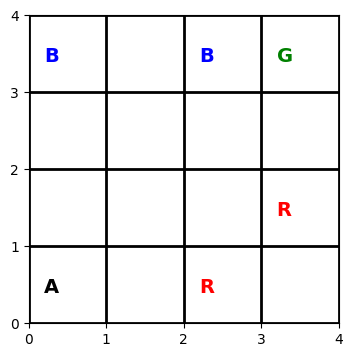

Step: 4
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -4


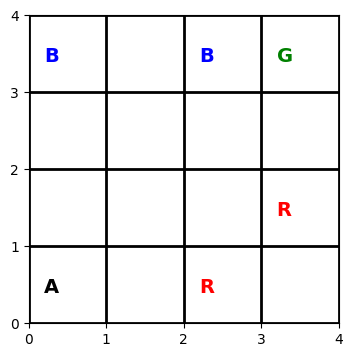

Step: 5
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -5


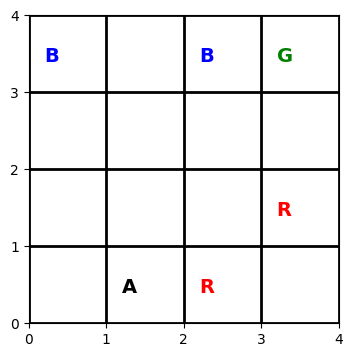

Step: 6
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -6


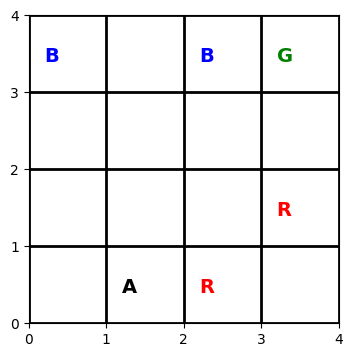

Step: 7
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -16


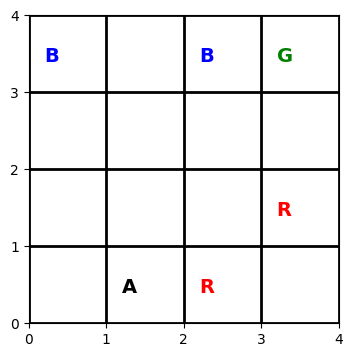

Step: 8
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -17


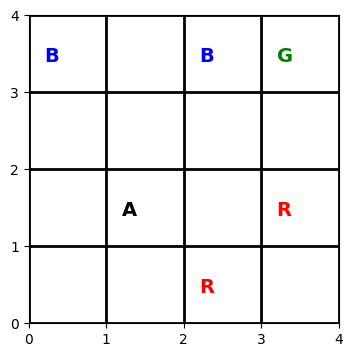

Step: 9
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -18


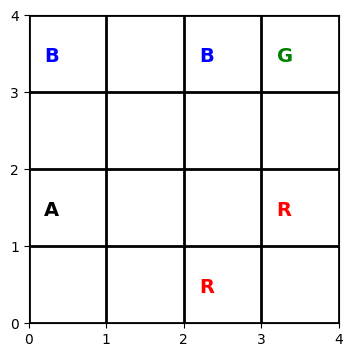

Step: 10
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -19


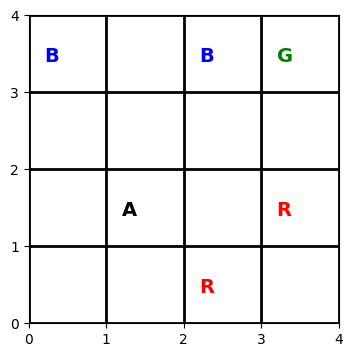

Step: 11
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -20


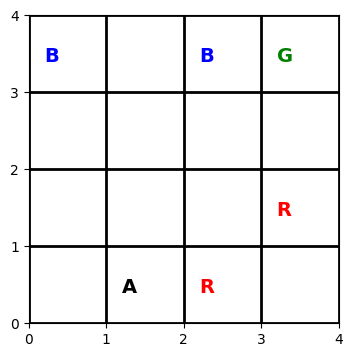

Step: 12
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -21


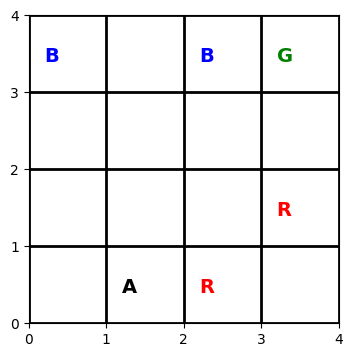

Step: 13
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -22


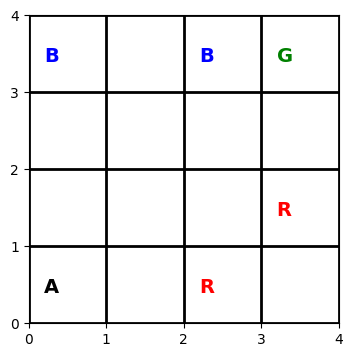

Step: 14
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -23


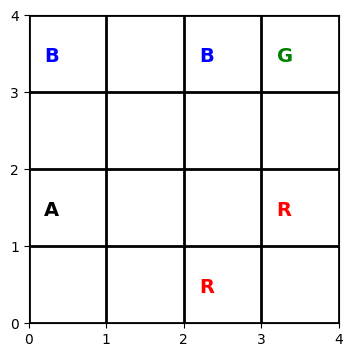

Step: 15
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -24


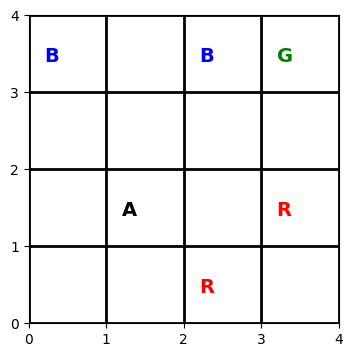

Step: 16
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -25


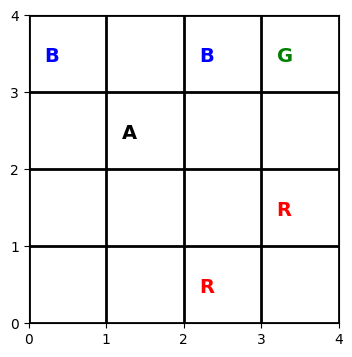

Step: 17
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -26


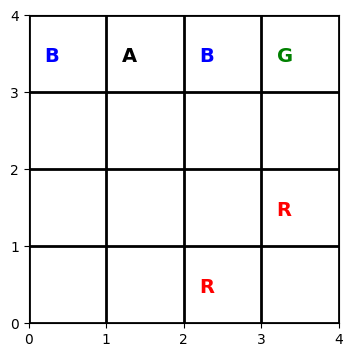

Step: 18
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -27


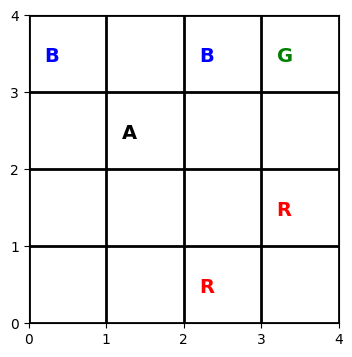

Step: 19
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -28


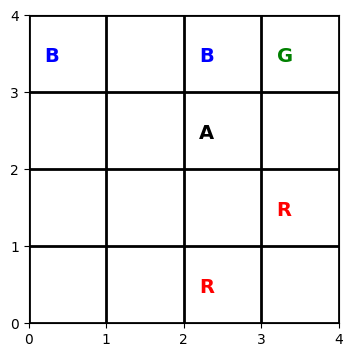

Step: 20
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -29


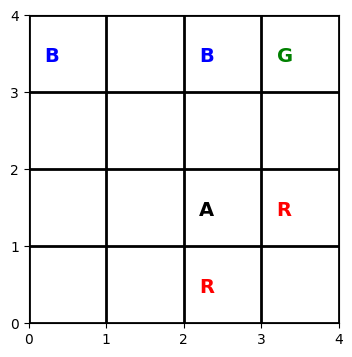

Step: 21
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -10
Cummulative Reward: -39


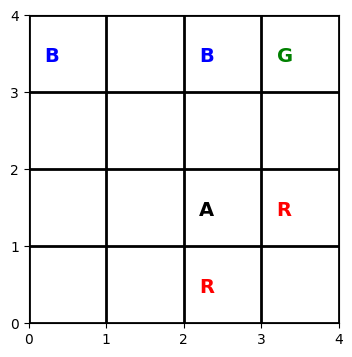

Step: 22
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -49


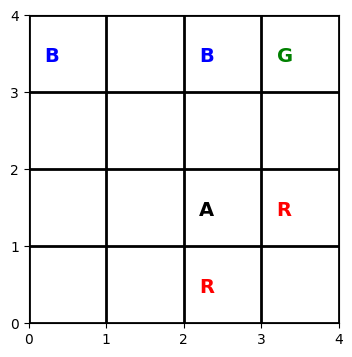

Step: 23
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -59


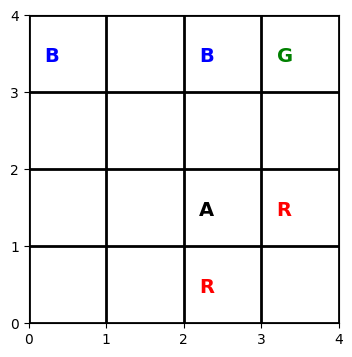

Step: 24
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -60


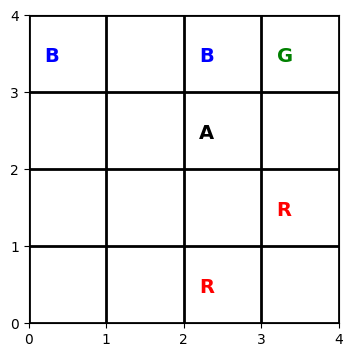

Step: 25
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -61


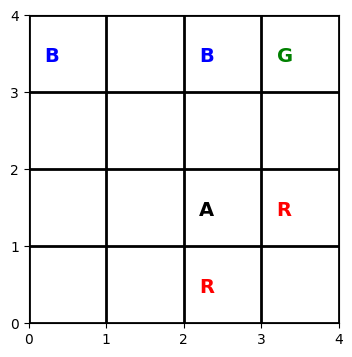

Step: 26
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -62


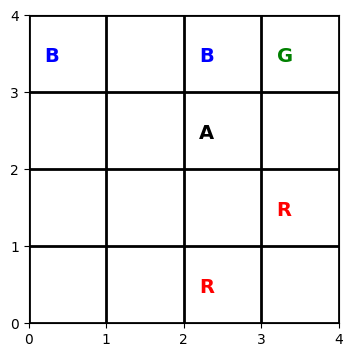

Step: 27
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -63


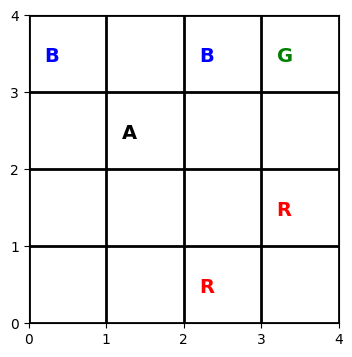

Step: 28
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -64


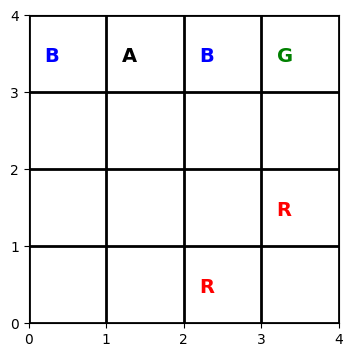

Step: 29
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -65


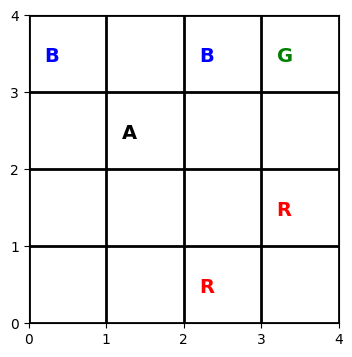

Step: 30
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -66


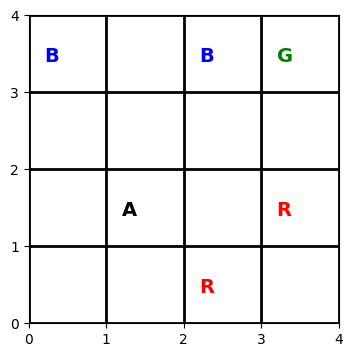

The total reward is  -66


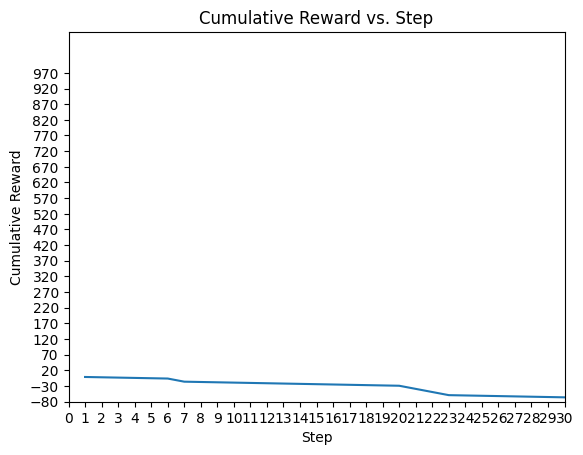

In [61]:
class LawnMower(gym.Env):
    def __init__(self, gamma=0.2, epsilon=1.0, epsilon_decay=0.2, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            # Exploration: choose a random action
            action = np.random.choice(self.action_space.n)
        else:
            # Exploitation: choose the action with the highest Q-value
            action = np.argmax(self.Q[state_flat])
        
        return action


    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
        else:
            reward = -1
        
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000 :
            done = True
        else:
            done = False

        # Updating agent position
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos

        target = reward + self.gamma * np.max(self.Q[np.argmax(self.state), :])
        
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):

      # Dictionary for cell types
      cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}

      # Create a copy of the state with integer values
      state_int = self.state.astype(int)

      # Replace integer values with corresponding cell types
      for k, v in cell_types.items():
          state_int[self.state == k] = k

      # Plot
      fig, ax = plt.subplots(figsize=(4,4))  # set figure size
      ax.set_xlim(0,4)
      ax.set_ylim(0,4)
      plt.grid()
      plt.xticks([0,1,2,3,4])
      plt.yticks([0,1,2,3,4]) # set y ticks
      ax.grid(which='both', color='k', linewidth=2)  # add grid
      # ax.imshow(state_int, cmap='Greys')  # show state as image

      # Inserting 'battery' in grid
      for battery in self.battery:
          ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

      # Inserting 'rock' in grid
      for rock in self.rock:
          ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

      # Inserting 'goal' in grid
      ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

      # Inserting 'agent' in grid
      ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

      plt.show()


env = LawnMower()

obs = env.reset()
done = False
sum = 0
steps = []
cumulative_rewards = []

for each in range(30):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    steps.append(each + 1)
    cumulative_rewards.append(sum)


    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

plt.plot(steps, cumulative_rewards)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs. Step')
plt.ylim(-80, 1100)
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, 1))
plt.yticks(np.arange(-80, 1010, 50))

plt.show()

#### Setup 6
gamma = 0.2

epsilon decay - 1

Step: 1
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -1


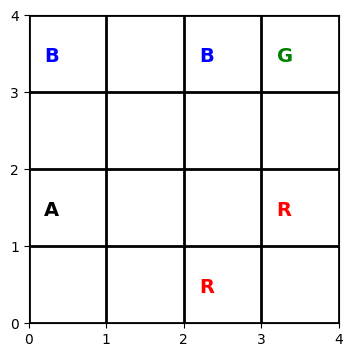

Step: 2
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -2


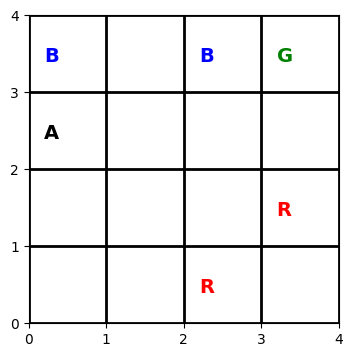

Step: 3
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -3


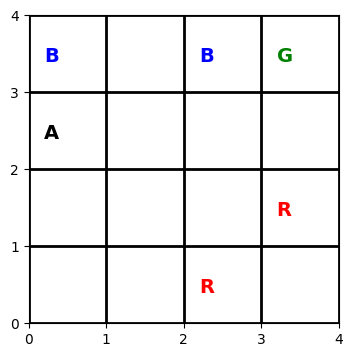

Step: 4
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -4


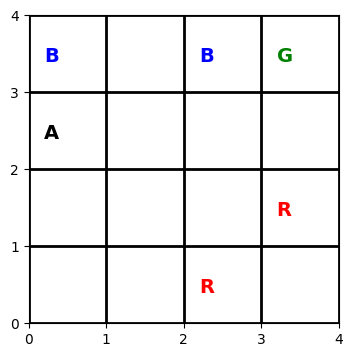

Step: 5
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -5


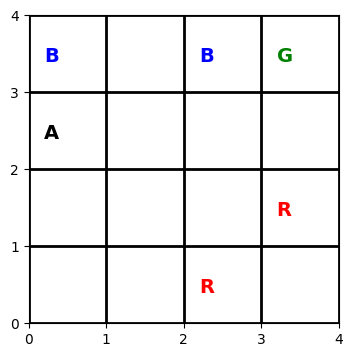

Step: 6
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -6


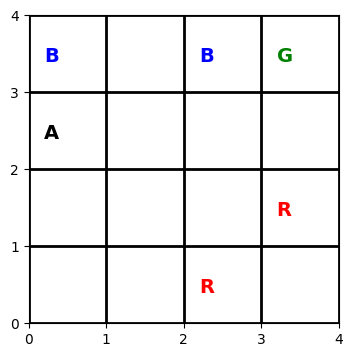

Step: 7
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: 10
Cummulative Reward: 4


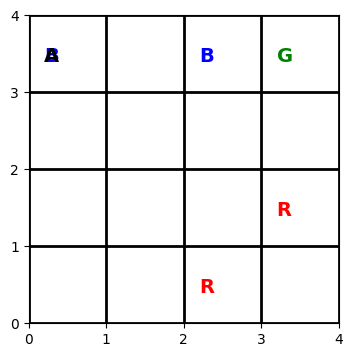

Step: 8
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: 3


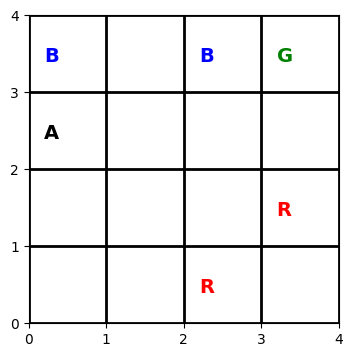

Step: 9
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: 2


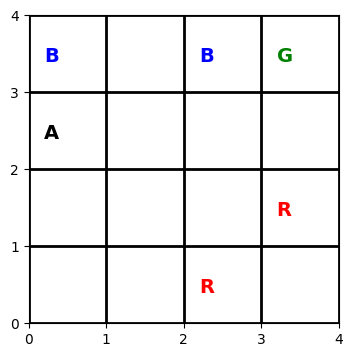

Step: 10
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: 1


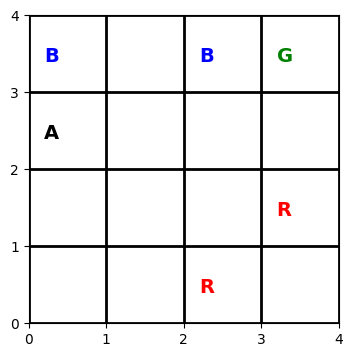

Step: 11
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: 10
Cummulative Reward: 11


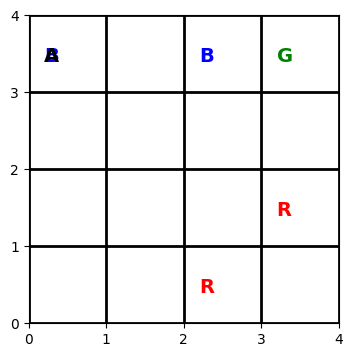

Step: 12
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: 10


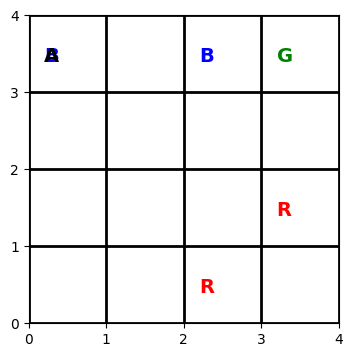

Step: 13
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: 9


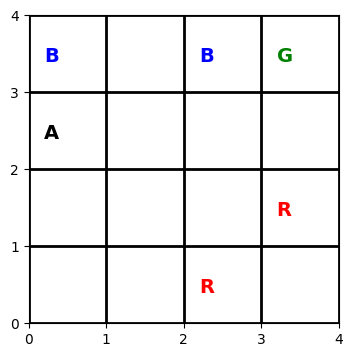

Step: 14
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: 8


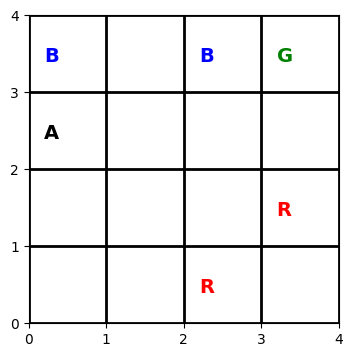

Step: 15
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: 10
Cummulative Reward: 18


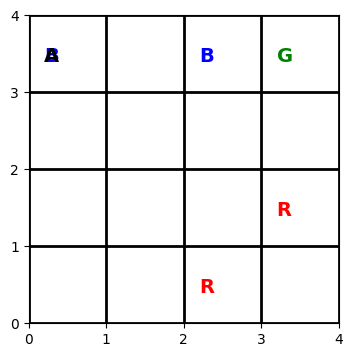

Step: 16
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: 17


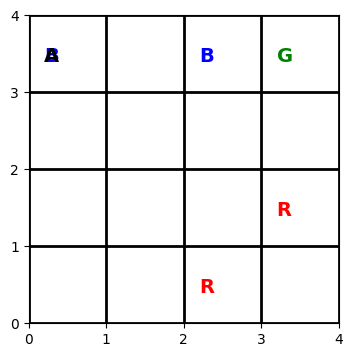

Step: 17
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: 16


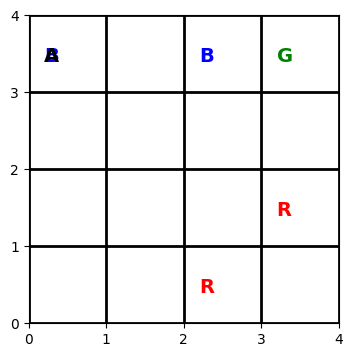

Step: 18
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: 15


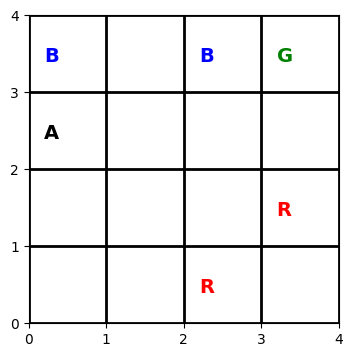

Step: 19
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: 14


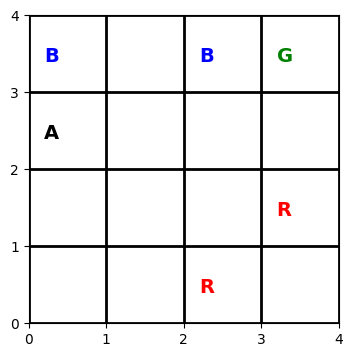

Step: 20
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: 13


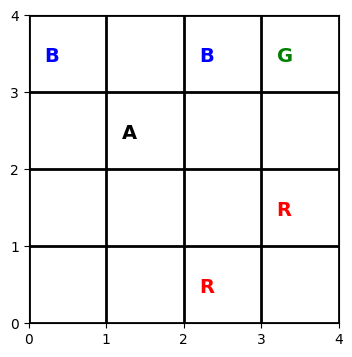

Step: 21
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: 12


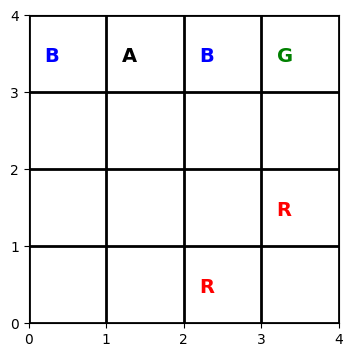

Step: 22
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
Action: 3
Reward: 10
Cummulative Reward: 22


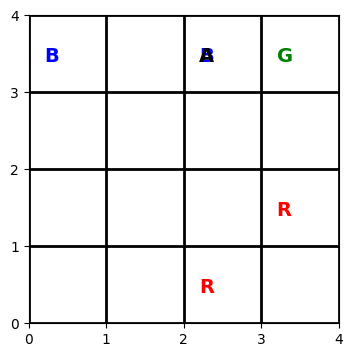

Step: 23
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: 21


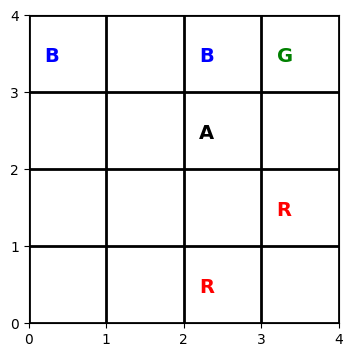

Step: 24
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
Action: 1
Reward: 10
Cummulative Reward: 31


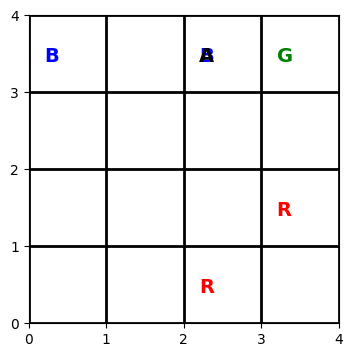

Step: 25
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: 30


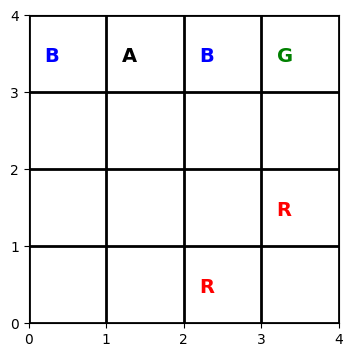

Step: 26
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
Action: 3
Reward: 10
Cummulative Reward: 40


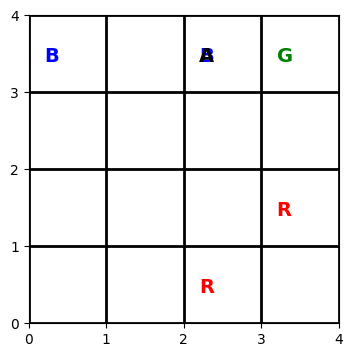

Step: 27
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
Action: 1
Reward: -1
Cummulative Reward: 39


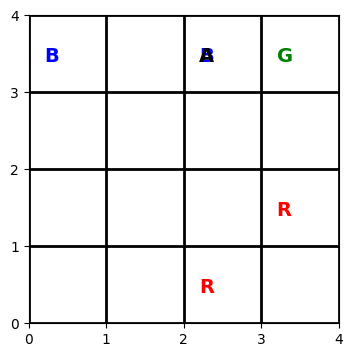

Step: 28
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
Action: 3
Reward: 1000
Cummulative Reward: 1039


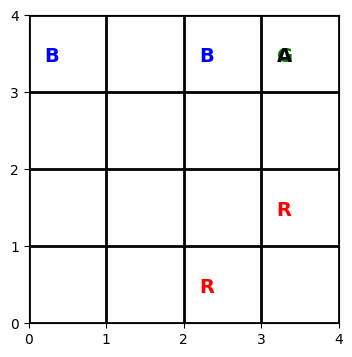

The total reward is  1039


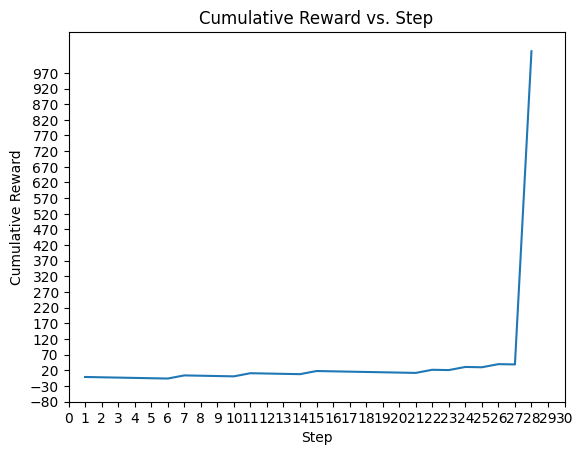

In [62]:
class LawnMower(gym.Env):
    def __init__(self, gamma=0.2, epsilon=0.3, epsilon_decay=1, epsilon_min=0.05):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.action_space.n)
        else:
            action = np.argmax(self.Q[state_flat])
        
        return action


    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
        else:
            reward = -1
        
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000 :
            done = True
        else:
            done = False

        # Updating agent position
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos

        target = reward + self.gamma * np.max(self.Q[np.argmax(self.state), :])
        
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):

      cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}
      state_int = self.state.astype(int)

      for k, v in cell_types.items():
          state_int[self.state == k] = k

      # Plot
      fig, ax = plt.subplots(figsize=(4,4)) 
      ax.set_xlim(0,4)
      ax.set_ylim(0,4)
      plt.grid()
      plt.xticks([0,1,2,3,4])
      plt.yticks([0,1,2,3,4]) 
      ax.grid(which='both', color='k', linewidth=2)  

      # Inserting 'battery' in grid
      for battery in self.battery:
          ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

      # Inserting 'rock' in grid
      for rock in self.rock:
          ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

      # Inserting 'goal' in grid
      ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

      # Inserting 'agent' in grid
      ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

      plt.show()


env = LawnMower()

obs = env.reset()
done = False
sum = 0
steps = []
cumulative_rewards = []

for each in range(30):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    steps.append(each + 1)
    cumulative_rewards.append(sum)


    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

plt.plot(steps, cumulative_rewards)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs. Step')
plt.ylim(-80, 1100)
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, 1))
plt.yticks(np.arange(-80, 1010, 50))

plt.show()

# Part 3 

## Q-Learning

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Step: 1
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -1


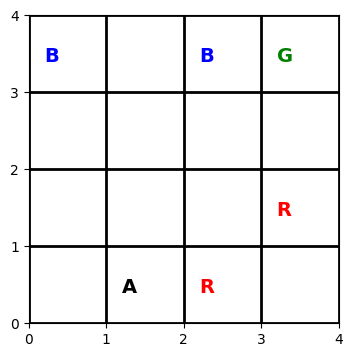

Step: 2
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -11


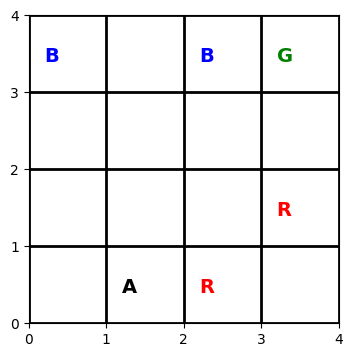

Step: 3
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -21


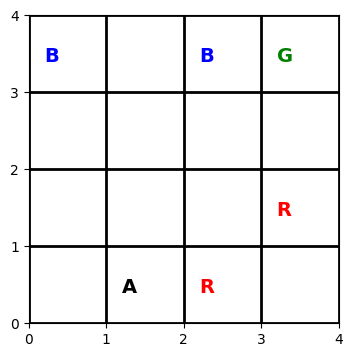

Step: 4
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -22


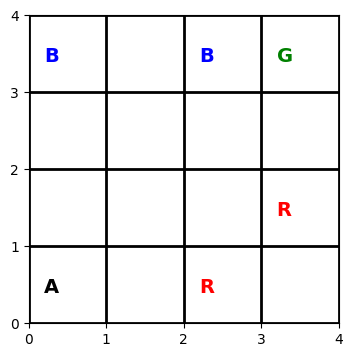

Step: 5
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -23


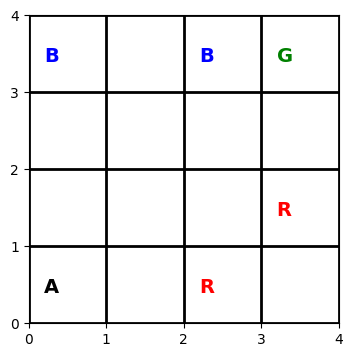

Step: 6
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -24


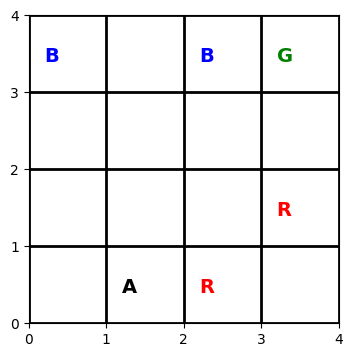

Step: 7
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -34


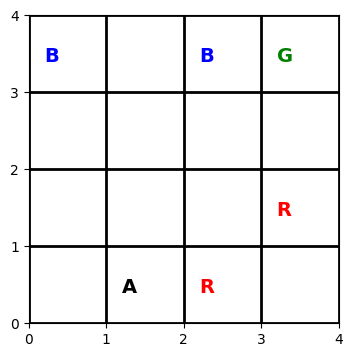

Step: 8
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -44


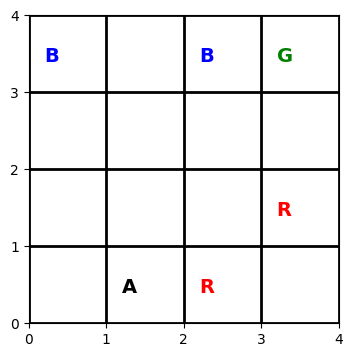

Step: 9
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -45


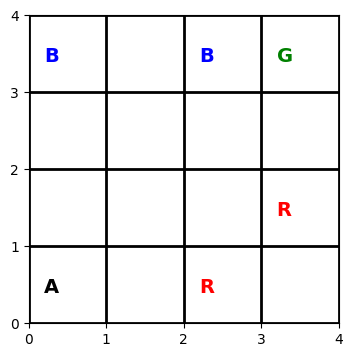

Step: 10
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -46


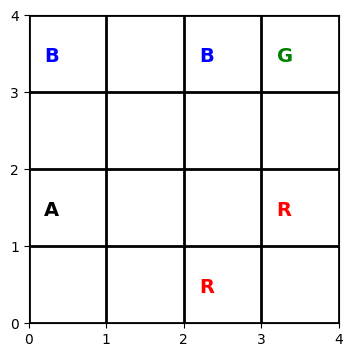

Step: 11
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -47


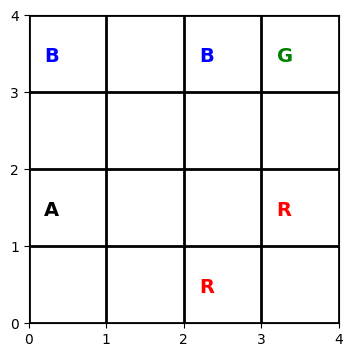

Step: 12
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -48


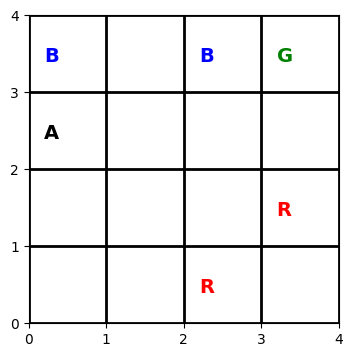

Step: 13
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: 10
Cummulative Reward: -38


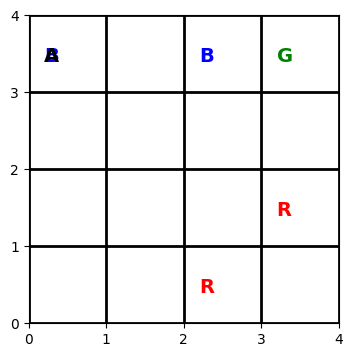

Step: 14
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -39


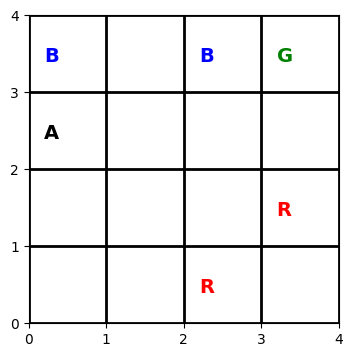

Step: 15
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -40


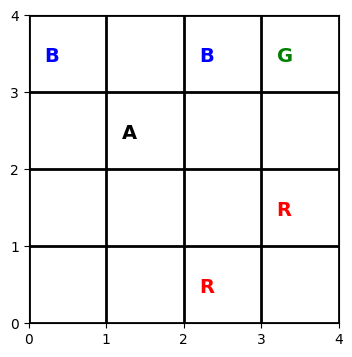

Step: 16
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -41


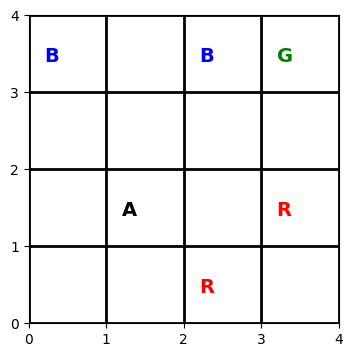

Step: 17
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -42


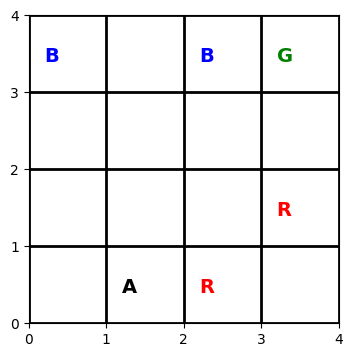

Step: 18
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -43


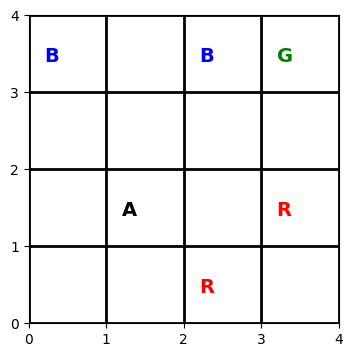

Step: 19
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -44


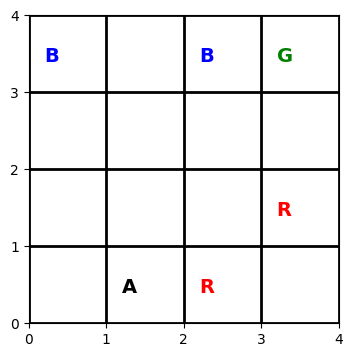

Step: 20
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -45


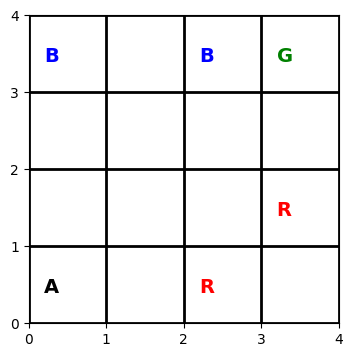

The total reward is  -45


In [12]:
class LawnMower(gym.Env):
    def __init__(self, gamma=0.9, alpha=0.5, epsilon=1.0, epsilon_decay=0.9, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.action_space.n)
        else:
            action = np.argmax(self.Q[state_flat])
        
        return action
    
    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
        else:
            reward = -1
        
        # Updating Q-value
        next_state = np.argmax(self.state)
        self.Q[current_state, action] += self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[current_state, action])

        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000:
          done = True
        else:
          done = False
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):

        cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}
        state_int = self.state.astype(int)

        for k, v in cell_types.items():
            state_int[self.state == k] = k

        # Plot
        fig, ax = plt.subplots(figsize=(4,4)) 
        ax.set_xlim(0,4)
        ax.set_ylim(0,4)
        plt.grid()
        plt.xticks([0,1,2,3,4])
        plt.yticks([0,1,2,3,4])
        ax.grid(which='both', color='k', linewidth=2)  

        # Inserting 'battery' in grid
        for battery in self.battery:
            ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

        # Inserting 'rock' in grid
        for rock in self.rock:
            ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

        # Inserting 'goal' in grid
        ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

        # Inserting 'agent' in grid
        ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

        plt.show()

env = LawnMower()
obs = env.reset()
done = False
sum = 0

for each in range(20):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

### Hyperparameter Tuning

**SETUP 1**



*   gamma = 0.9 
*   alpha = 0.5



Step: 1
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -1


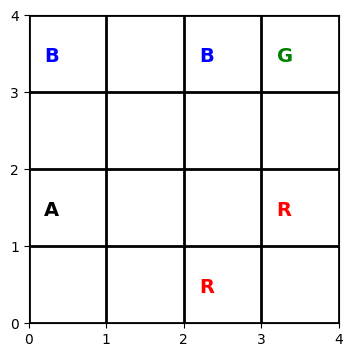

Step: 2
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -2


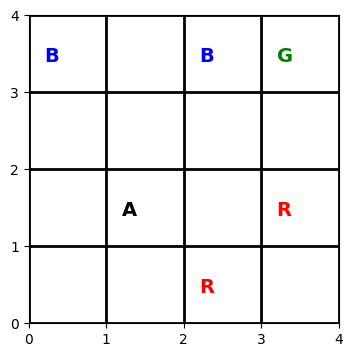

Step: 3
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -3


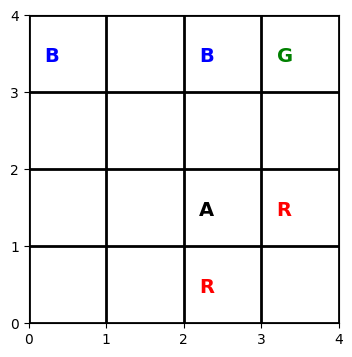

Step: 4
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -10
Cummulative Reward: -13


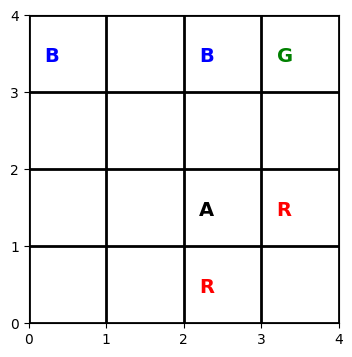

Step: 5
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -23


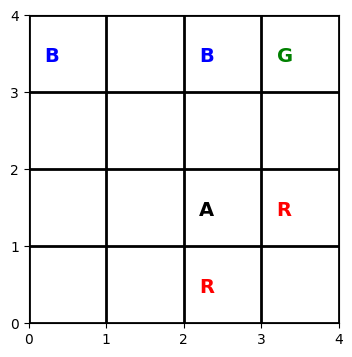

Step: 6
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -33


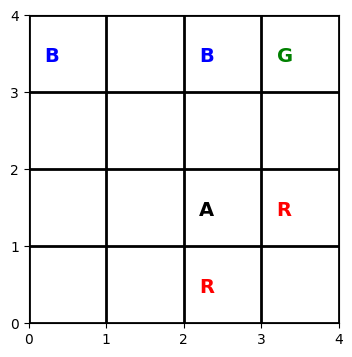

Step: 7
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -10
Cummulative Reward: -43


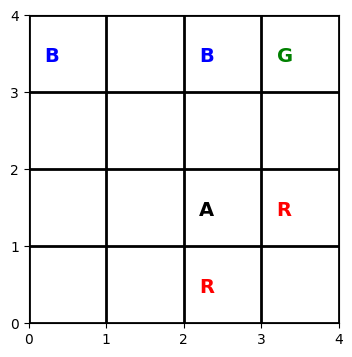

Step: 8
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -44


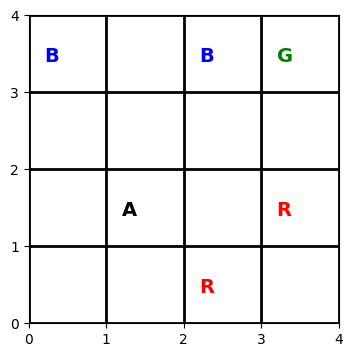

Step: 9
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -45


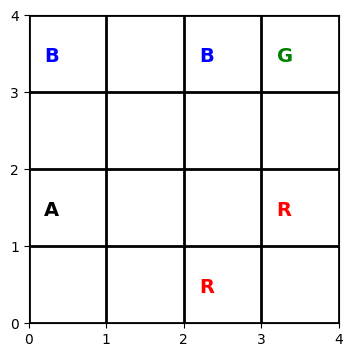

Step: 10
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -46


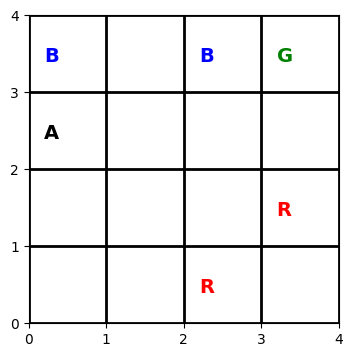

Step: 11
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -47


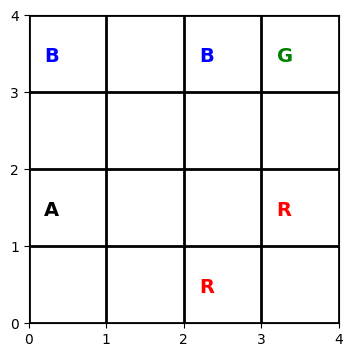

Step: 12
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -48


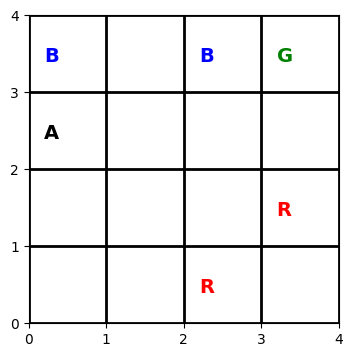

Step: 13
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: 10
Cummulative Reward: -38


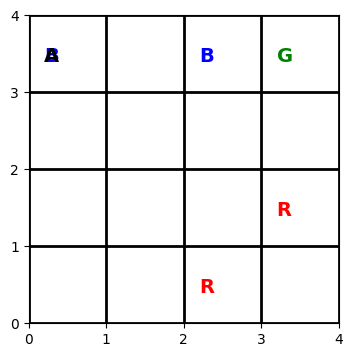

Step: 14
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -39


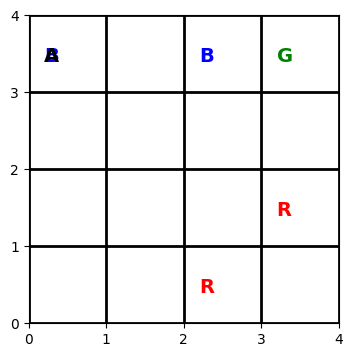

Step: 15
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -40


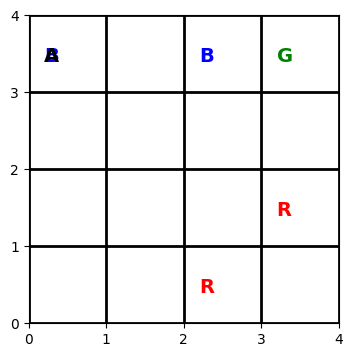

Step: 16
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -41


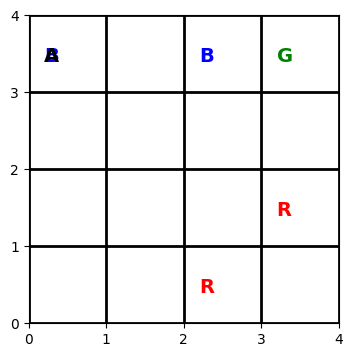

Step: 17
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -42


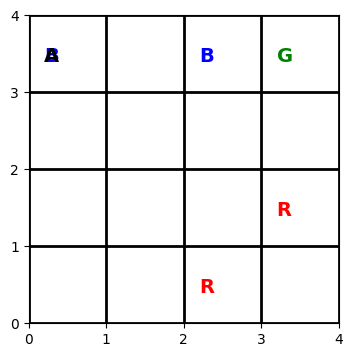

Step: 18
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -43


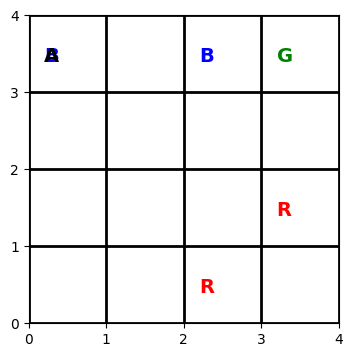

Step: 19
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -44


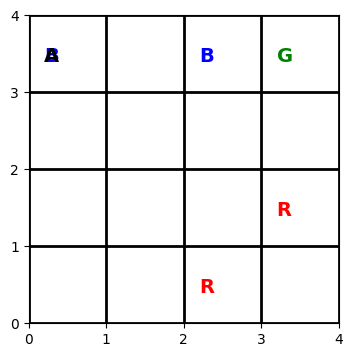

Step: 20
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -45


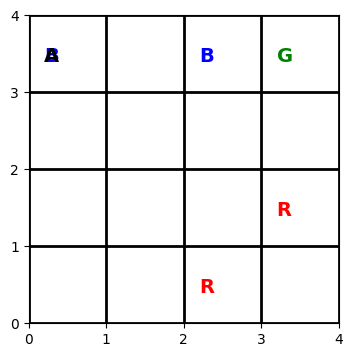

Step: 21
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -46


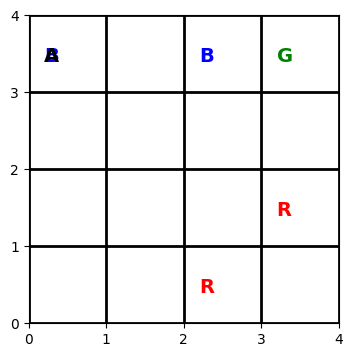

Step: 22
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -47


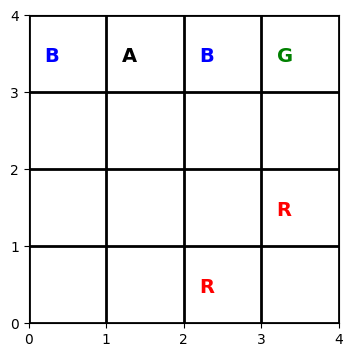

Step: 23
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -48


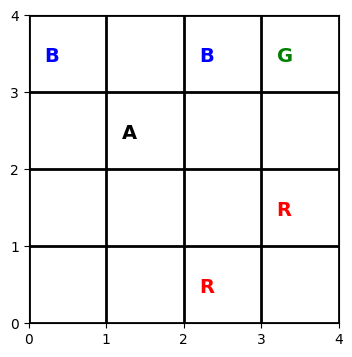

Step: 24
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -49


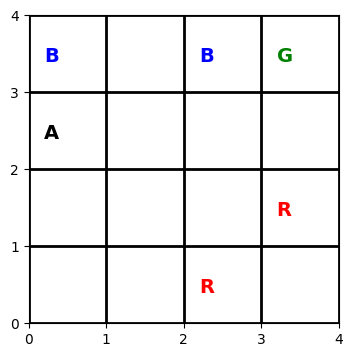

Step: 25
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: 10
Cummulative Reward: -39


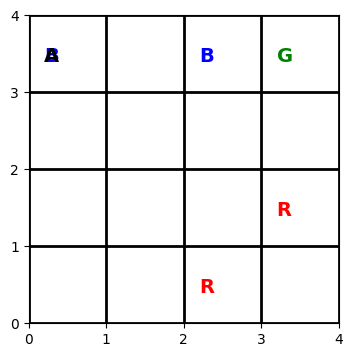

Step: 26
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -40


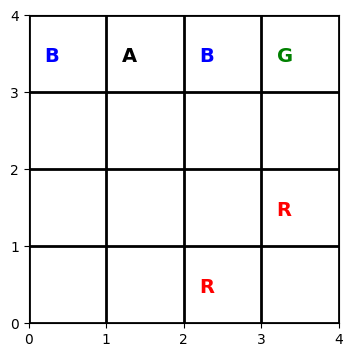

Step: 27
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 2
Reward: 10
Cummulative Reward: -30


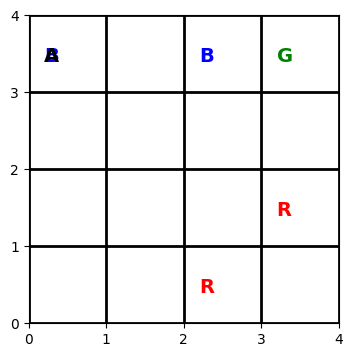

Step: 28
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -31


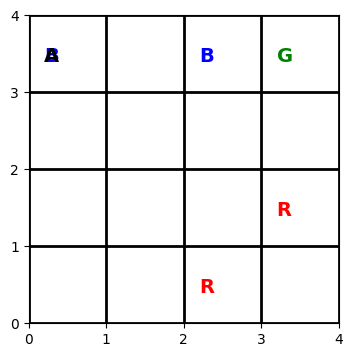

Step: 29
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -32


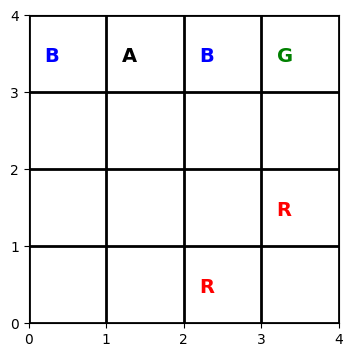

Step: 30
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
Action: 3
Reward: 10
Cummulative Reward: -22


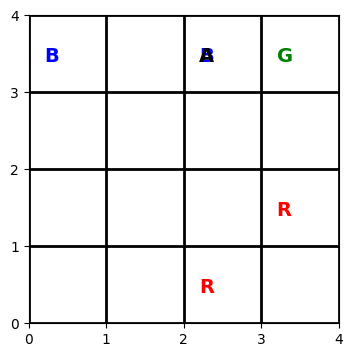

The total reward is  -22


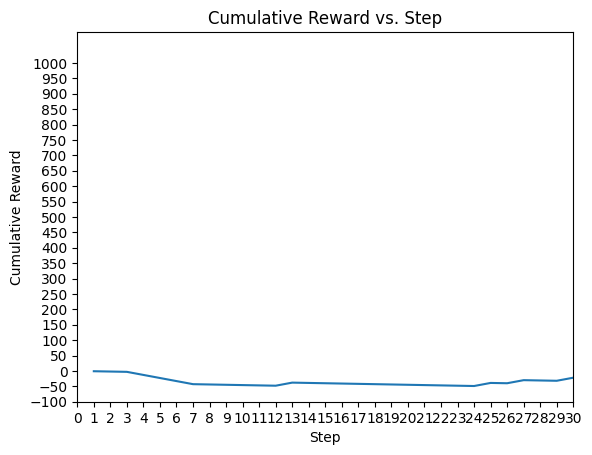

In [63]:
class LawnMower(gym.Env):
    def __init__(self, gamma=0.9, alpha=0.5, epsilon=1.0, epsilon_decay=0.9, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.action_space.n)
        else:
            action = np.argmax(self.Q[state_flat])
        
        return action
    
    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
        else:
            reward = -1
        
        # Updating Q-value
        next_state = np.argmax(self.state)
        self.Q[current_state, action] += self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[current_state, action])

        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000:
          done = True
        else:
          done = False
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):

        cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}
        state_int = self.state.astype(int)

        for k, v in cell_types.items():
            state_int[self.state == k] = k

        # Plot
        fig, ax = plt.subplots(figsize=(4,4)) 
        ax.set_xlim(0,4)
        ax.set_ylim(0,4)
        plt.grid()
        plt.xticks([0,1,2,3,4])
        plt.yticks([0,1,2,3,4]) 
        ax.grid(which='both', color='k', linewidth=2)

        # Inserting 'battery' in grid
        for battery in self.battery:
            ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

        # Inserting 'rock' in grid
        for rock in self.rock:
            ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

        # Inserting 'goal' in grid
        ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

        # Inserting 'agent' in grid
        ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

        plt.show()

env = LawnMower()
obs = env.reset()
done = False
sum = 0
steps = []
cumulative_rewards = []

for each in range(30):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    steps.append(each + 1)
    cumulative_rewards.append(sum)


    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

# Rewards Plot
plt.plot(steps, cumulative_rewards)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs. Step')
plt.ylim(-100, 1100)
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, 1))
plt.yticks(np.arange(-100, 1010, 50))

plt.show()



**SETUP 2**
*   gamma = 0.5 
*   alpha = 0.5

Step: 1
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -1


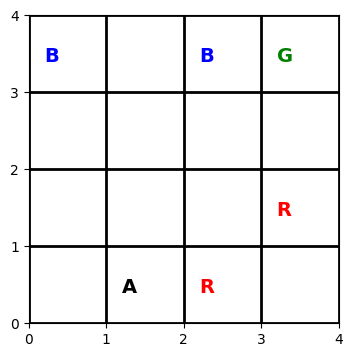

Step: 2
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -11


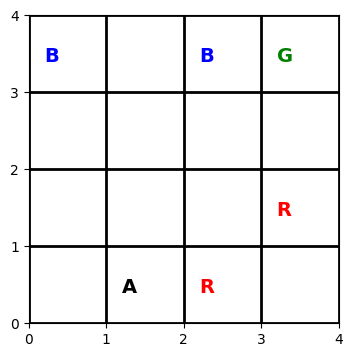

Step: 3
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -12


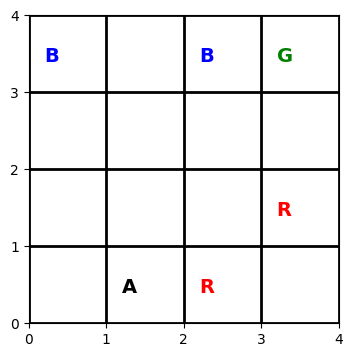

Step: 4
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -13


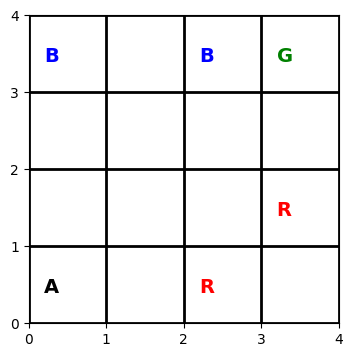

Step: 5
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -14


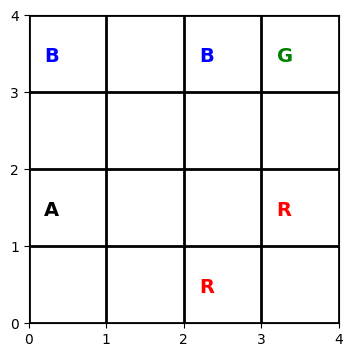

Step: 6
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -15


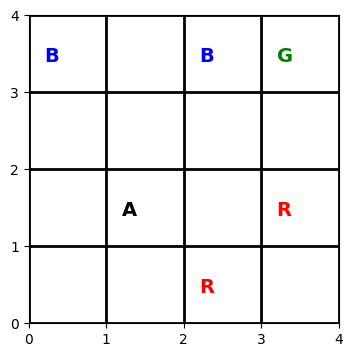

Step: 7
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -16


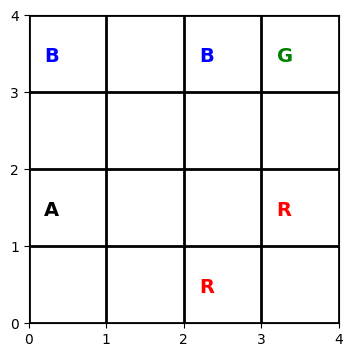

Step: 8
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -17


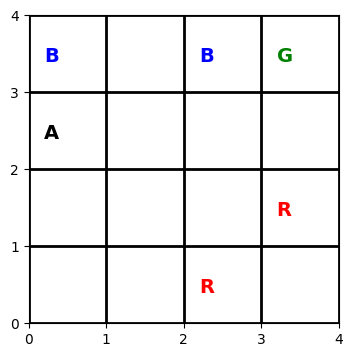

Step: 9
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -18


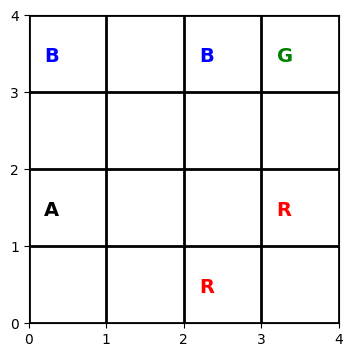

Step: 10
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -19


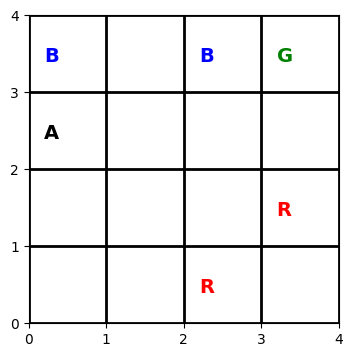

Step: 11
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -20


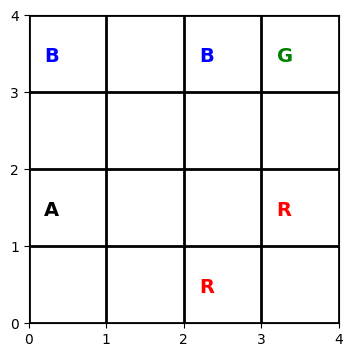

Step: 12
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -21


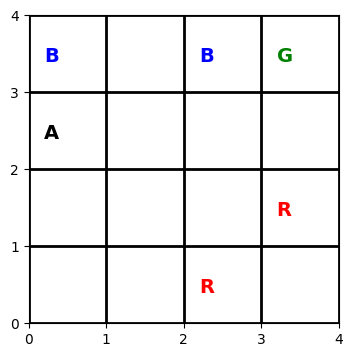

Step: 13
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -22


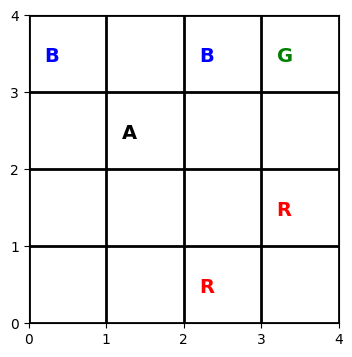

Step: 14
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -23


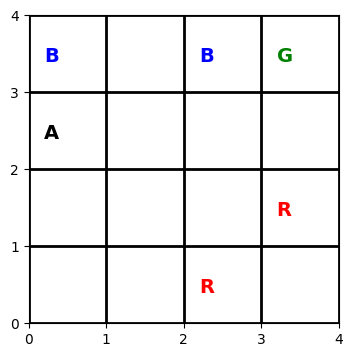

Step: 15
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: 10
Cummulative Reward: -13


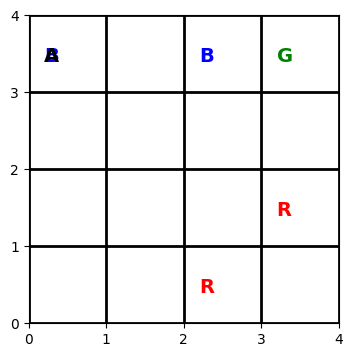

Step: 16
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -14


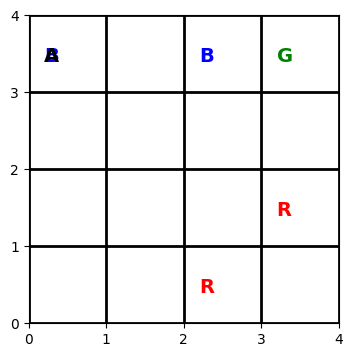

Step: 17
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -15


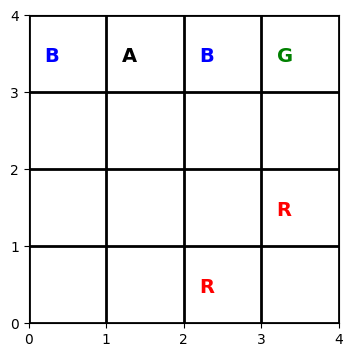

Step: 18
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 2
Reward: 10
Cummulative Reward: -5


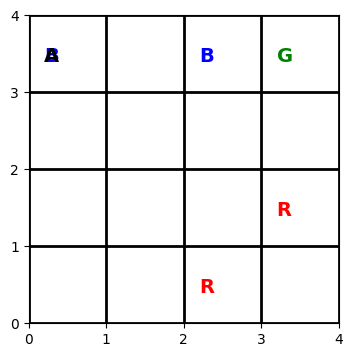

Step: 19
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -6


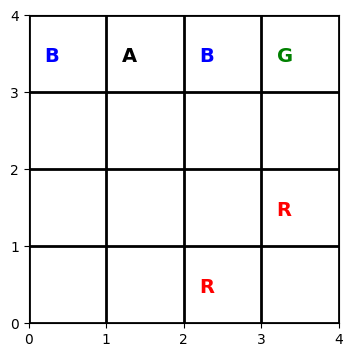

Step: 20
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -7


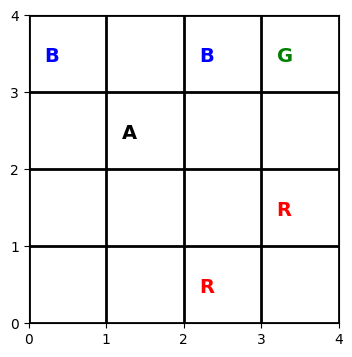

Step: 21
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -8


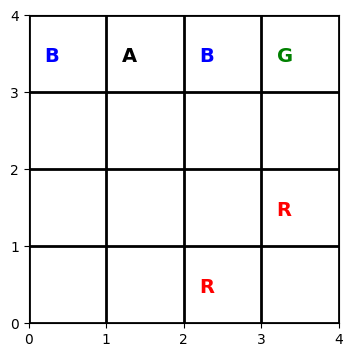

Step: 22
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -9


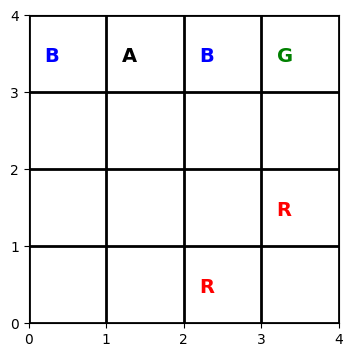

Step: 23
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -10


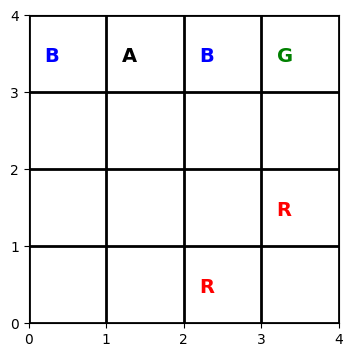

Step: 24
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -11


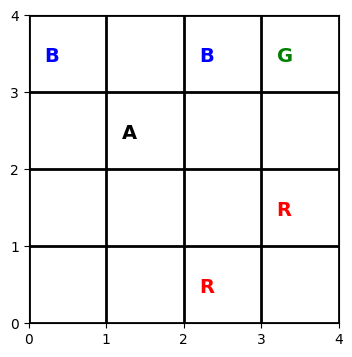

Step: 25
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -12


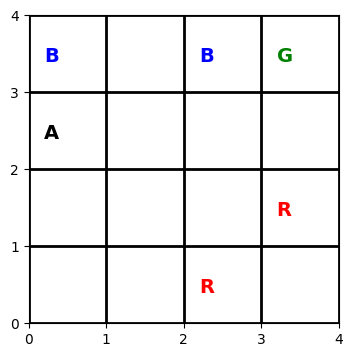

Step: 26
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -13


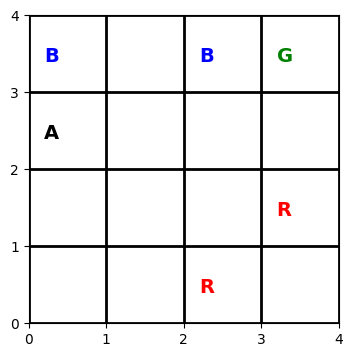

Step: 27
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
Action: 1
Reward: 10
Cummulative Reward: -3


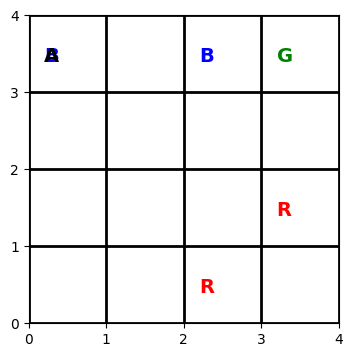

Step: 28
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -4


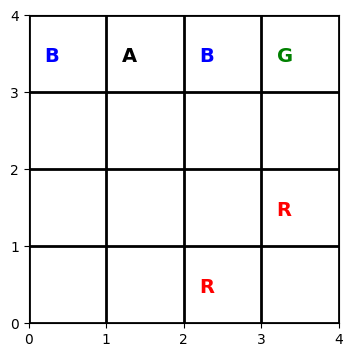

Step: 29
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
Action: 3
Reward: 10
Cummulative Reward: 6


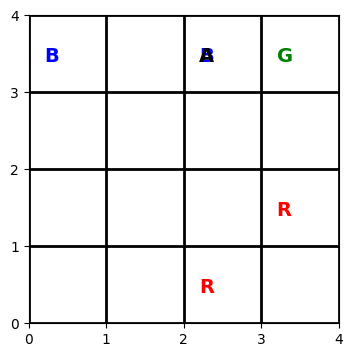

Step: 30
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
Action: 3
Reward: 1000
Cummulative Reward: 1006


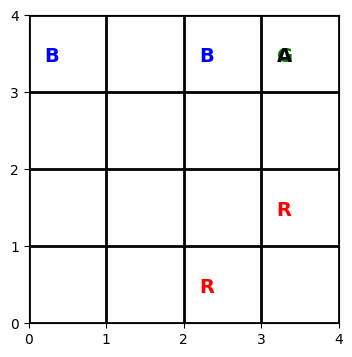

The total reward is  1006


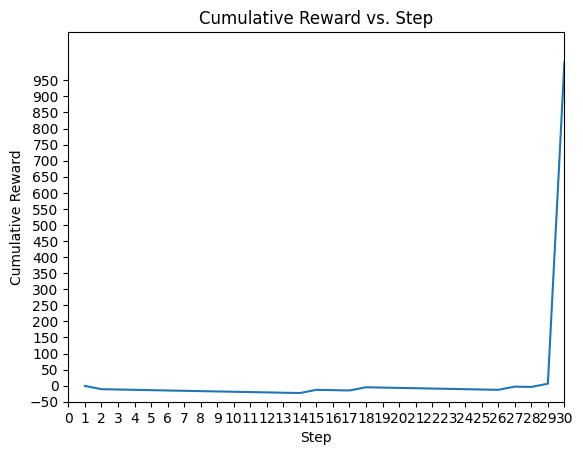

In [64]:
class LawnMower(gym.Env):
    def __init__(self,gamma=0.5, alpha=0.5, epsilon=1.0, epsilon_decay=0.9, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            # Exploration: choose a random action
            action = np.random.choice(self.action_space.n)
        else:
            # Exploitation: choose the action with the highest Q-value
            action = np.argmax(self.Q[state_flat])
        
        return action
    
    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
            done = True
        else:
            reward = -1
        
        # Update Q-value
        next_state = np.argmax(self.state)
        self.Q[current_state, action] += self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[current_state, action])

        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000:
          done = True
        else:
          done = False
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):
        # Dictionary for cell types
        cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}

        # Create a copy of the state with integer values
        state_int = self.state.astype(int)

        # Replace integer values with corresponding cell types
        for k, v in cell_types.items():
            state_int[self.state == k] = k

        # Plot
        fig, ax = plt.subplots(figsize=(4,4))  # set figure size
        ax.set_xlim(0,4)
        ax.set_ylim(0,4)
        plt.grid()
        plt.xticks([0,1,2,3,4])
        plt.yticks([0,1,2,3,4]) # set y ticks
        ax.grid(which='both', color='k', linewidth=2)  # add grid
        # ax.imshow(state_int, cmap='Greys')  # show state as image

        # Inserting 'battery' in grid
        for battery in self.battery:
            ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

        # Inserting 'rock' in grid
        for rock in self.rock:
            ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

        # Inserting 'goal' in grid
        ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

        # Inserting 'agent' in grid
        ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

        plt.show()

env = LawnMower()
obs = env.reset()
done = False
sum = 0
steps = []
cumulative_rewards = []
 
for each in range(30):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    steps.append(each + 1)
    cumulative_rewards.append(sum)

    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

# Rewards Plot
plt.plot(steps, cumulative_rewards)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs. Step')
plt.ylim(-50, 1100)
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, 1))
plt.yticks(np.arange(-50, 1000, 50))

plt.show()



**SETUP 3**

*   gamma = 0.7
*   alpha = 0.5

Step: 1
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -1


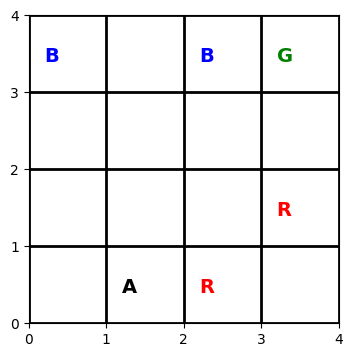

Step: 2
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -2


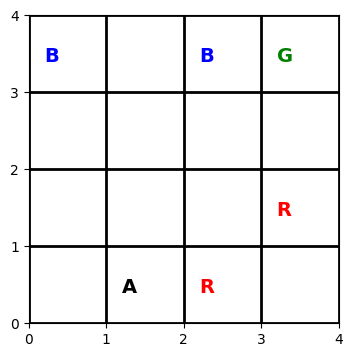

Step: 3
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -3


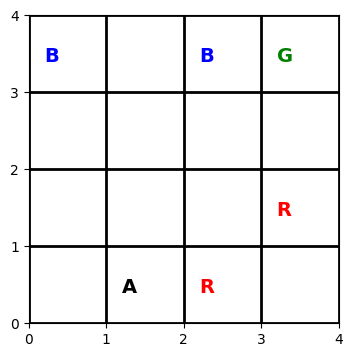

Step: 4
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -4


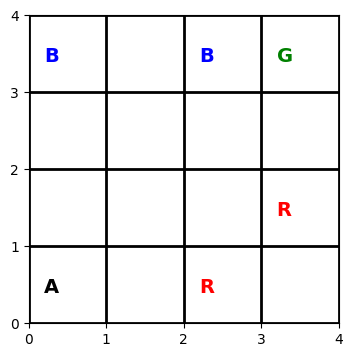

Step: 5
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -5


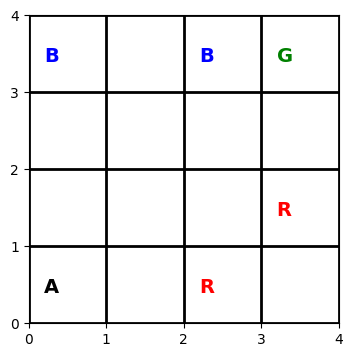

Step: 6
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -6


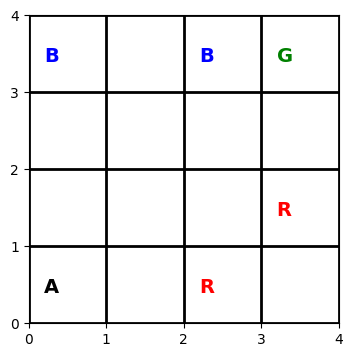

Step: 7
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -7


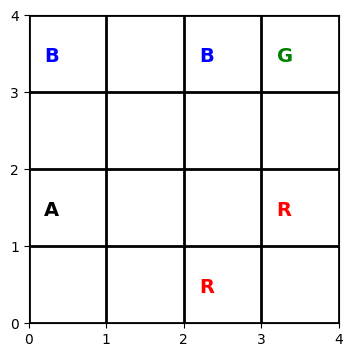

Step: 8
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -8


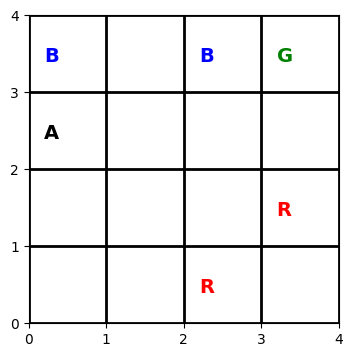

Step: 9
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -9


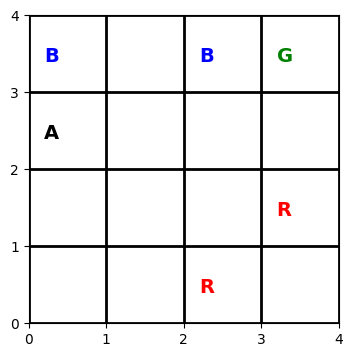

Step: 10
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -10


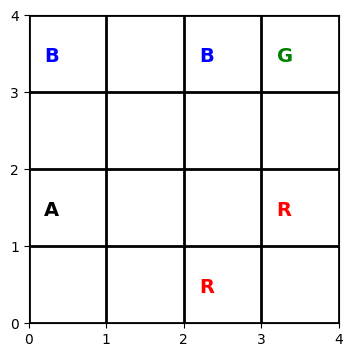

Step: 11
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -11


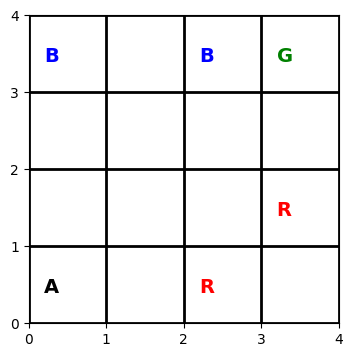

Step: 12
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -12


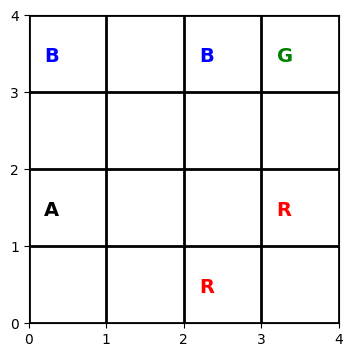

Step: 13
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -13


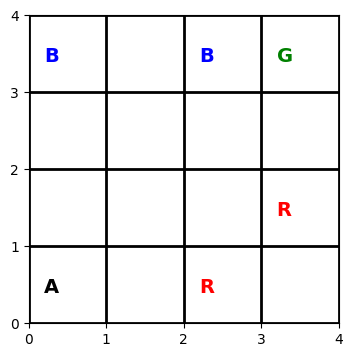

Step: 14
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -14


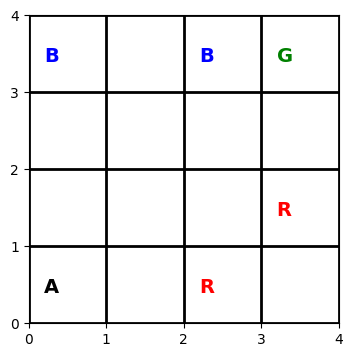

Step: 15
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -15


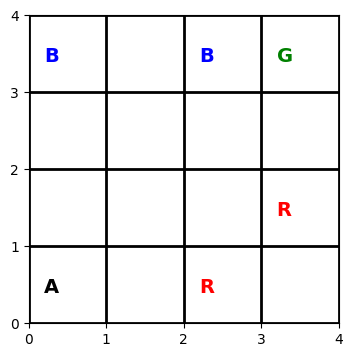

Step: 16
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -16


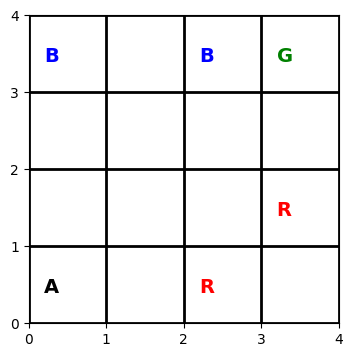

Step: 17
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -17


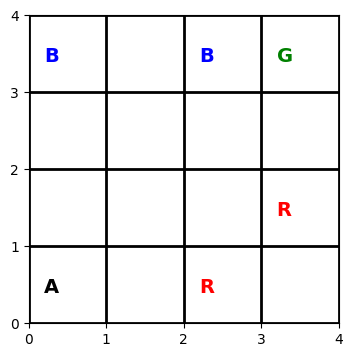

Step: 18
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -18


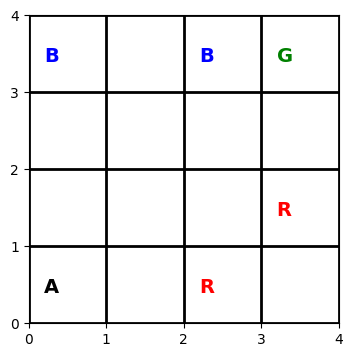

Step: 19
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -19


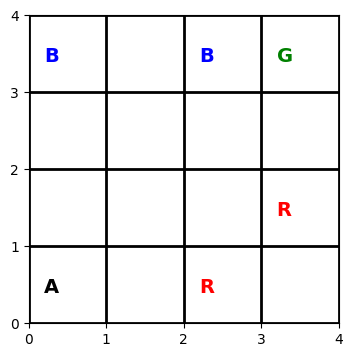

Step: 20
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -20


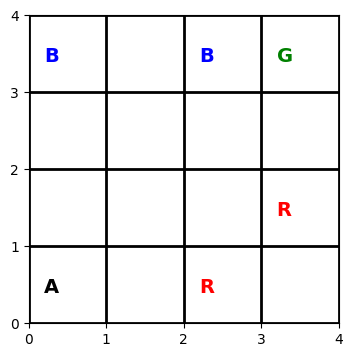

Step: 21
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -21


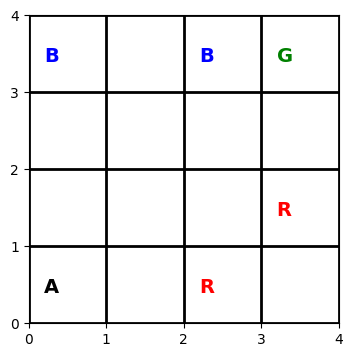

Step: 22
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -22


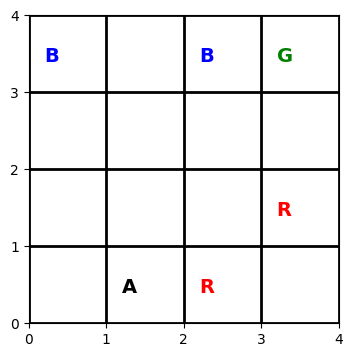

Step: 23
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -32


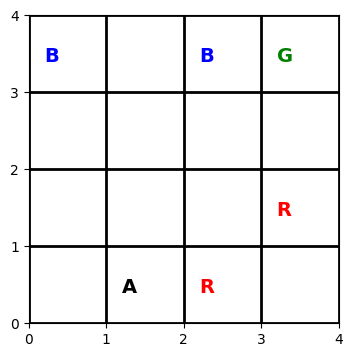

Step: 24
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -33


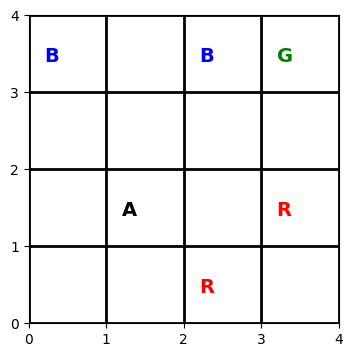

Step: 25
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -34


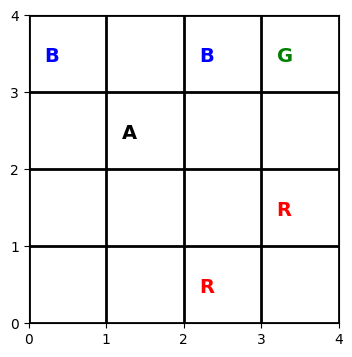

Step: 26
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -35


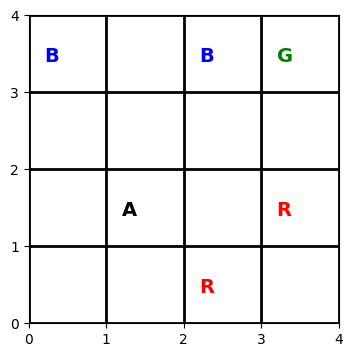

Step: 27
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -36


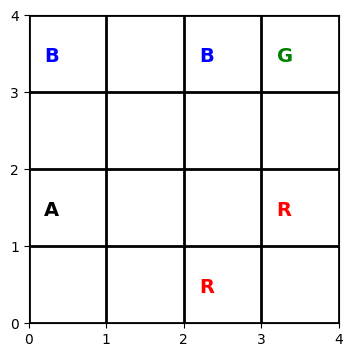

Step: 28
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -37


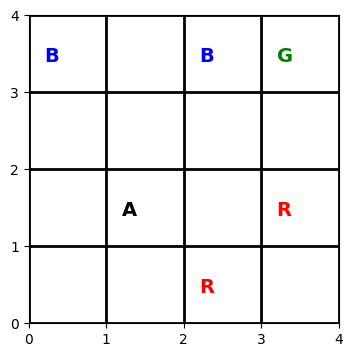

Step: 29
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -38


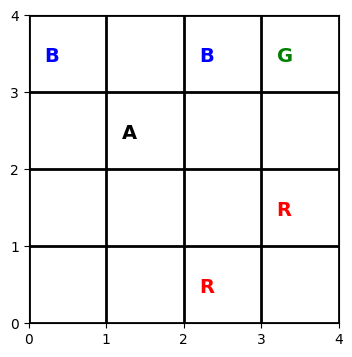

Step: 30
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -39


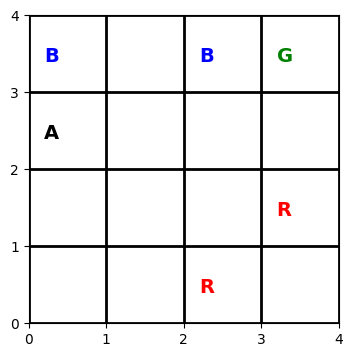

The total reward is  -39


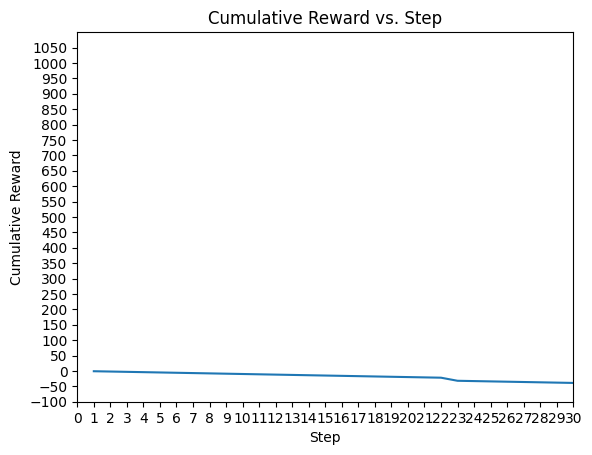

In [77]:
class LawnMower(gym.Env):
    def __init__(self,gamma=0.7, alpha=0.5, epsilon=1.0, epsilon_decay=0.9, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.action_space.n)
        else:
            action = np.argmax(self.Q[state_flat])
        
        return action
    
    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
            done = True
        else:
            reward = -1
        
        # Updating Q-value
        next_state = np.argmax(self.state)
        self.Q[current_state, action] += self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[current_state, action])

        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000:
          done = True
        else:
          done = False
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):

        cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}
        state_int = self.state.astype(int)

        for k, v in cell_types.items():
            state_int[self.state == k] = k

        # Plot
        fig, ax = plt.subplots(figsize=(4,4))  
        ax.set_xlim(0,4)
        ax.set_ylim(0,4)
        plt.grid()
        plt.xticks([0,1,2,3,4])
        plt.yticks([0,1,2,3,4]) 
        ax.grid(which='both', color='k', linewidth=2)  

        # Inserting 'battery' in grid
        for battery in self.battery:
            ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

        # Inserting 'rock' in grid
        for rock in self.rock:
            ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

        # Inserting 'goal' in grid
        ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

        # Inserting 'agent' in grid
        ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

        plt.show()


env = LawnMower()
obs = env.reset()
done = False
sum = 0
steps = []
cumulative_rewards = []
for each in range(30):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    steps.append(each + 1)
    cumulative_rewards.append(sum)

    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

# Rewards Plot
plt.plot(steps, cumulative_rewards)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs. Step')
plt.ylim(-100, 1100)
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, 1))
plt.yticks(np.arange(-100, 1100, 50))

plt.show()



**SETUP 4**

*   gamma = 0.2
*   alpha = 0.5

Step: 1
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -1


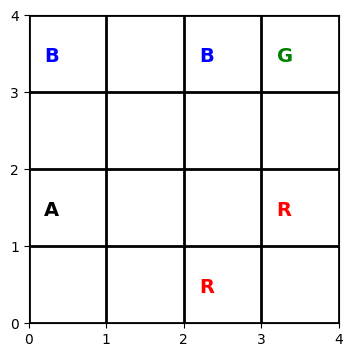

Step: 2
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -2


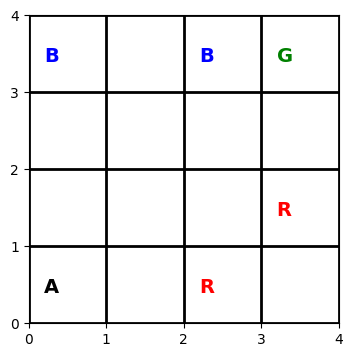

Step: 3
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -3


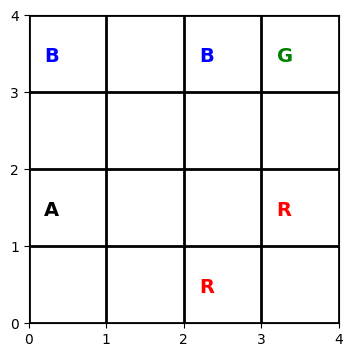

Step: 4
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -4


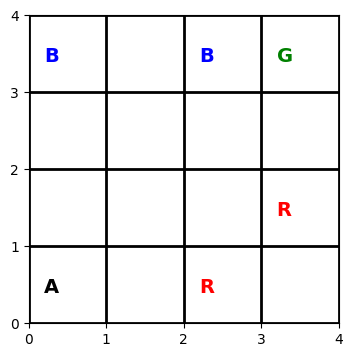

Step: 5
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -5


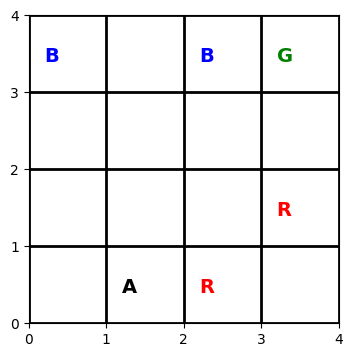

Step: 6
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -6


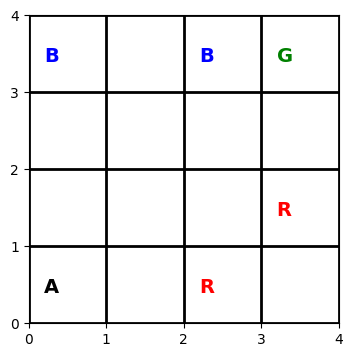

Step: 7
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -7


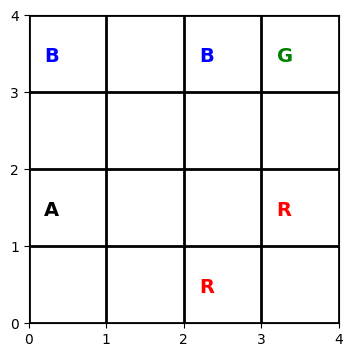

Step: 8
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -8


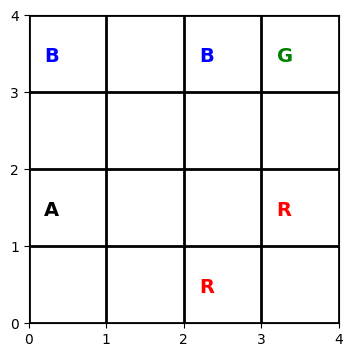

Step: 9
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -9


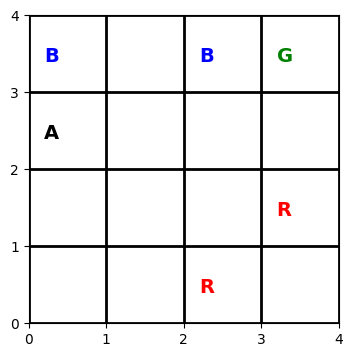

Step: 10
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -10


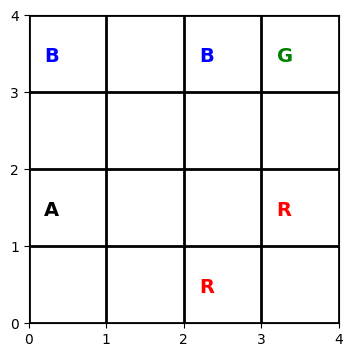

Step: 11
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -11


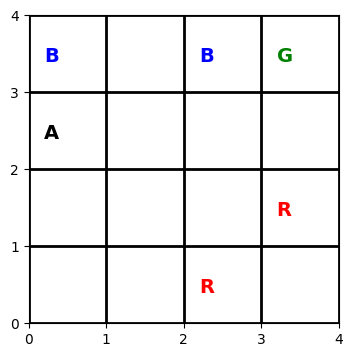

Step: 12
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -12


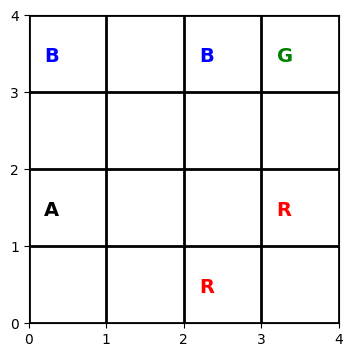

Step: 13
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -13


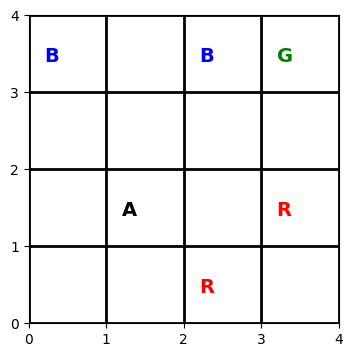

Step: 14
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -14


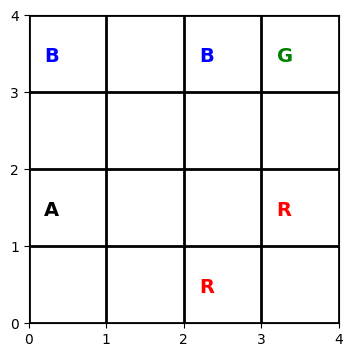

Step: 15
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -15


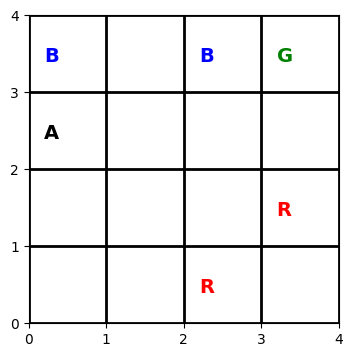

Step: 16
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -16


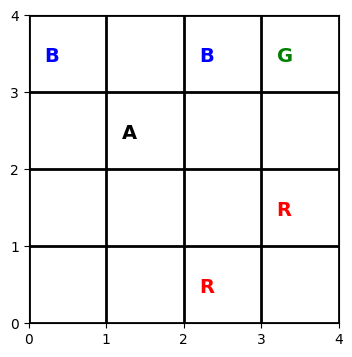

Step: 17
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -17


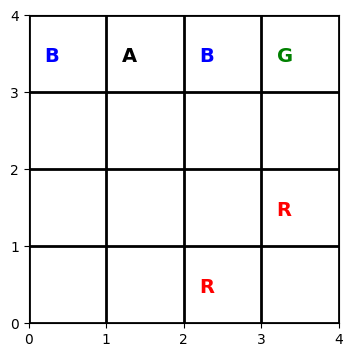

Step: 18
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -18


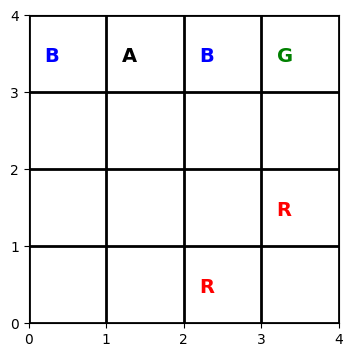

Step: 19
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -19


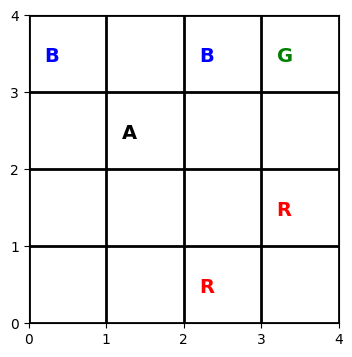

Step: 20
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -20


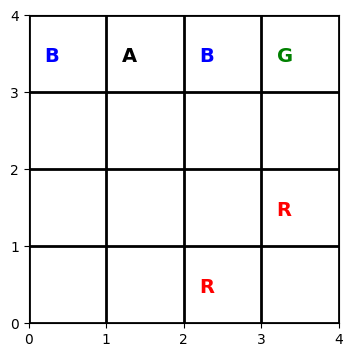

Step: 21
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -21


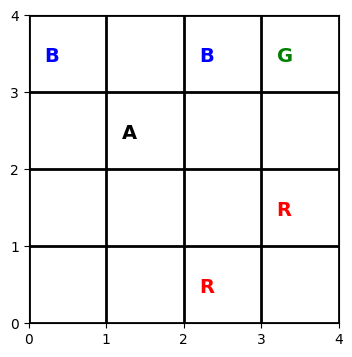

Step: 22
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -22


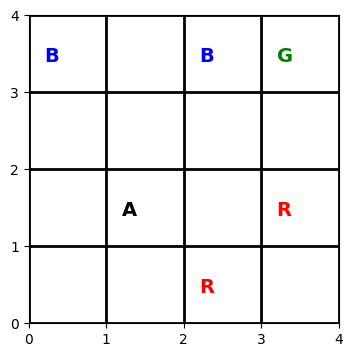

Step: 23
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -23


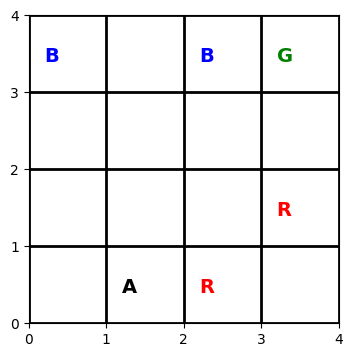

Step: 24
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -24


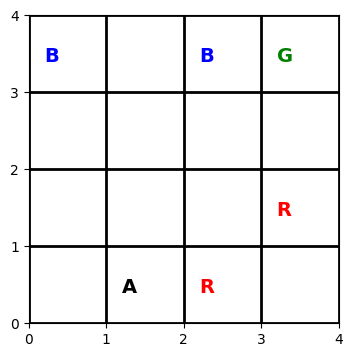

Step: 25
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -34


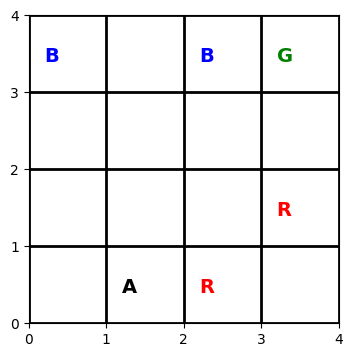

Step: 26
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -35


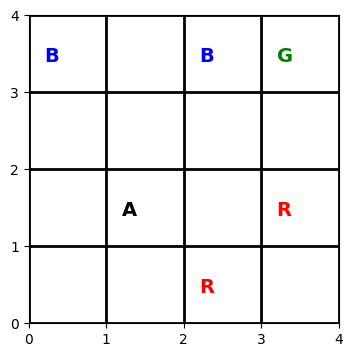

Step: 27
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -36


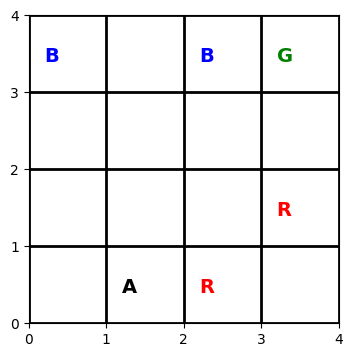

Step: 28
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -37


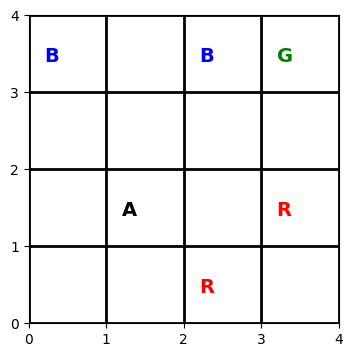

Step: 29
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -38


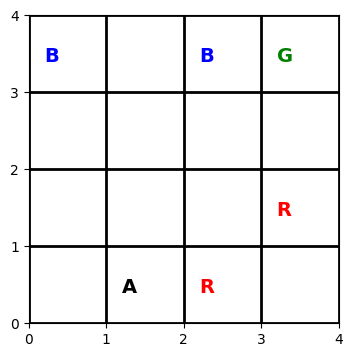

Step: 30
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -39


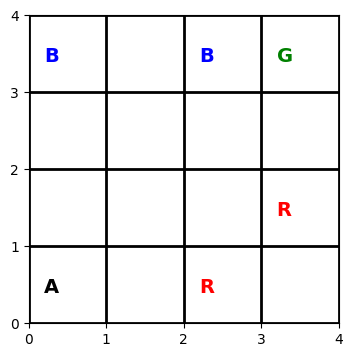

The total reward is  -39


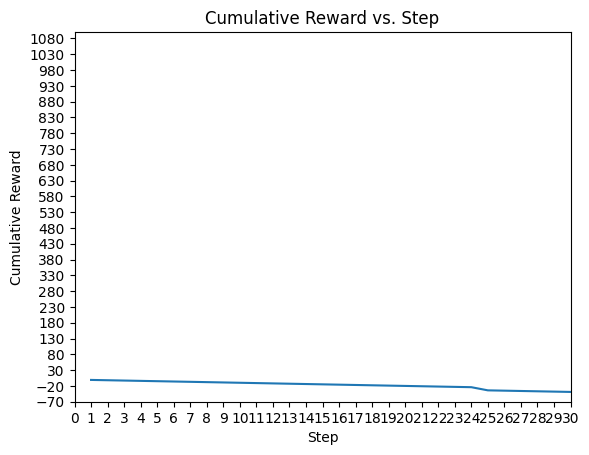

In [72]:
class LawnMower(gym.Env):
    def __init__(self, gamma=0.2, alpha=0.5, epsilon=1.0, epsilon_decay=0.9, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.action_space.n)
        else:
            action = np.argmax(self.Q[state_flat])
        
        return action
    
    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
            done = True
        else:
            reward = -1
        
        # Update Q-value
        next_state = np.argmax(self.state)
        self.Q[current_state, action] += self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[current_state, action])

        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000:
          done = True
        else:
          done = False
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):

        cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}
        state_int = self.state.astype(int)

        for k, v in cell_types.items():
            state_int[self.state == k] = k

        # Plot
        fig, ax = plt.subplots(figsize=(4,4)) 
        ax.set_xlim(0,4)
        ax.set_ylim(0,4)
        plt.grid()
        plt.xticks([0,1,2,3,4])
        plt.yticks([0,1,2,3,4])
        ax.grid(which='both', color='k', linewidth=2)  

        # Inserting 'battery' in grid
        for battery in self.battery:
            ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

        # Inserting 'rock' in grid
        for rock in self.rock:
            ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

        # Inserting 'goal' in grid
        ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

        # Inserting 'agent' in grid
        ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

        plt.show()


env = LawnMower()
obs = env.reset()
done = False
sum = 0
steps = []
cumulative_rewards = []

for each in range(30):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    steps.append(each + 1)
    cumulative_rewards.append(sum)
    
    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

plt.plot(steps, cumulative_rewards)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs. Step')
plt.ylim(-70, 1100)
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, 1))
plt.yticks(np.arange(-70, 1100, 50))

plt.show()

#### Setup 5
*   gamma = 0.2
*   alpha = 0.1

Step: 1
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -1


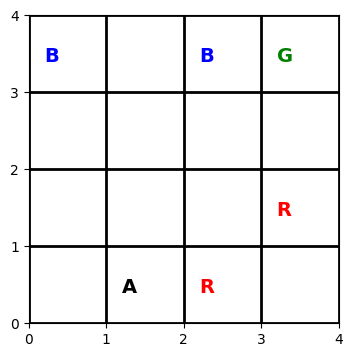

Step: 2
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -2


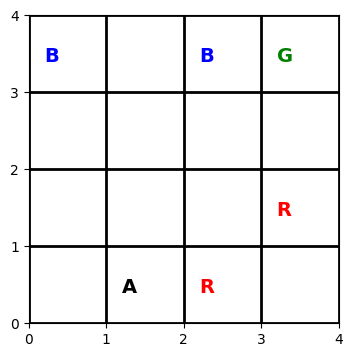

Step: 3
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -3


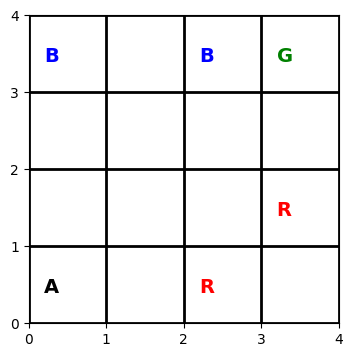

Step: 4
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -4


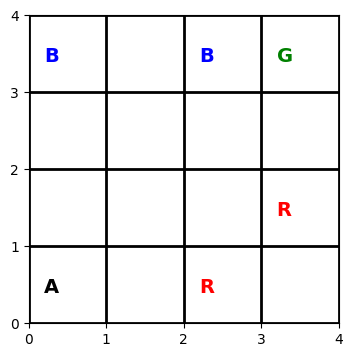

Step: 5
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -5


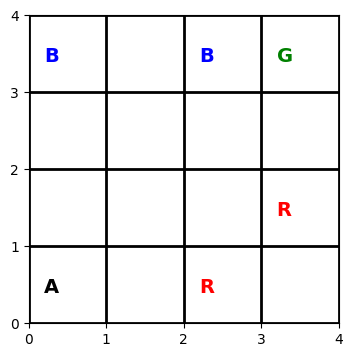

Step: 6
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -6


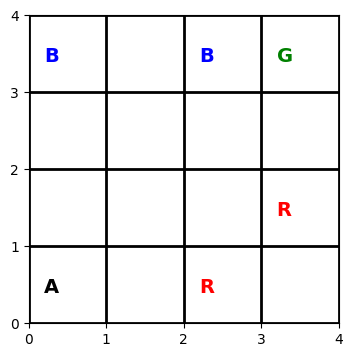

Step: 7
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -7


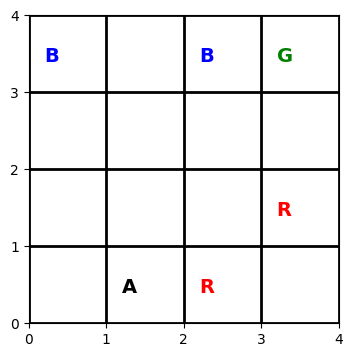

Step: 8
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -8


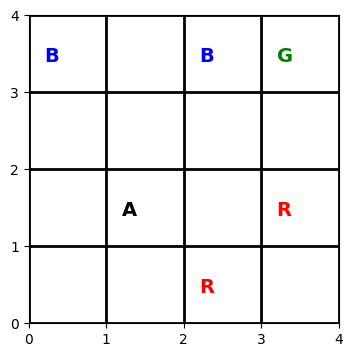

Step: 9
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -9


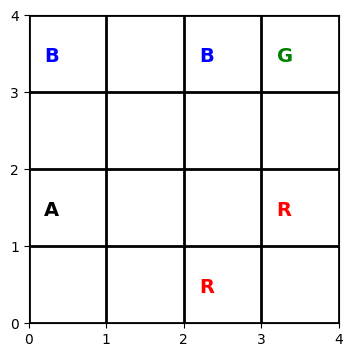

Step: 10
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -10


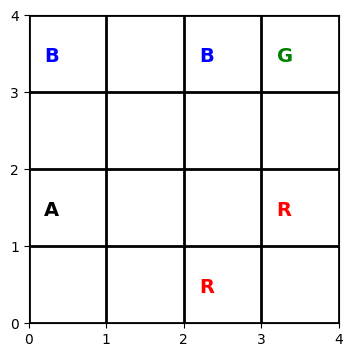

Step: 11
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -11


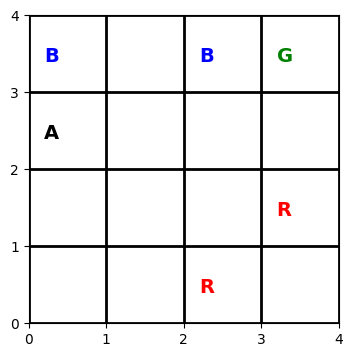

Step: 12
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -12


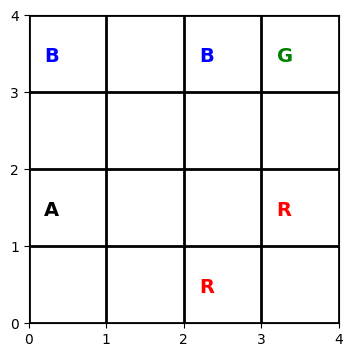

Step: 13
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -13


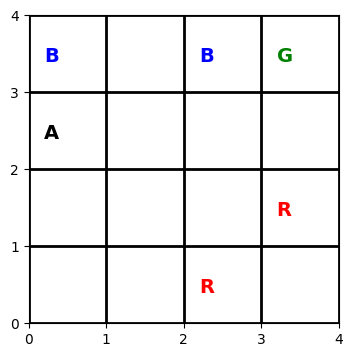

Step: 14
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -14


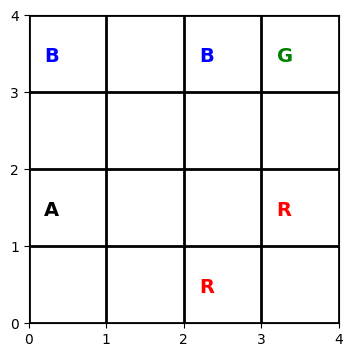

Step: 15
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -15


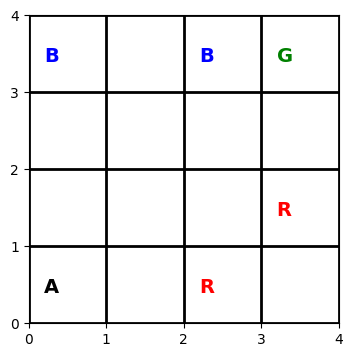

Step: 16
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -16


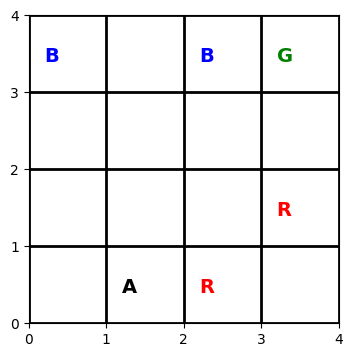

Step: 17
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -17


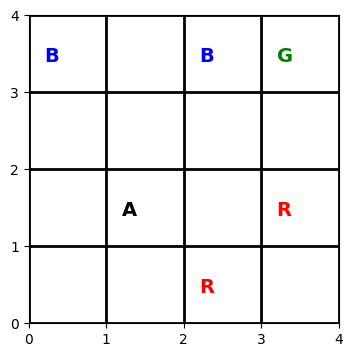

Step: 18
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -18


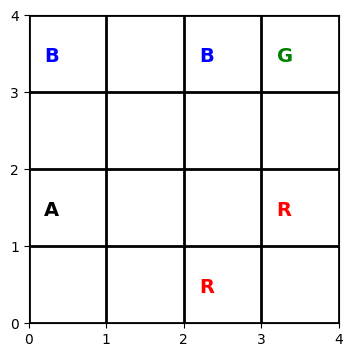

Step: 19
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -19


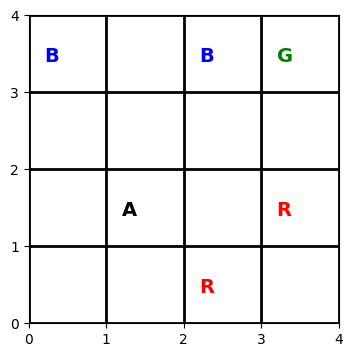

Step: 20
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -20


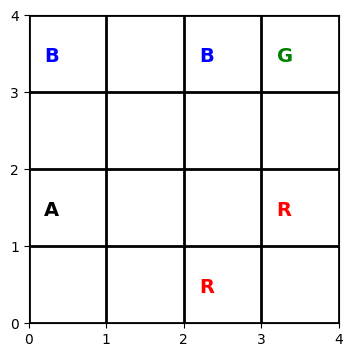

Step: 21
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -21


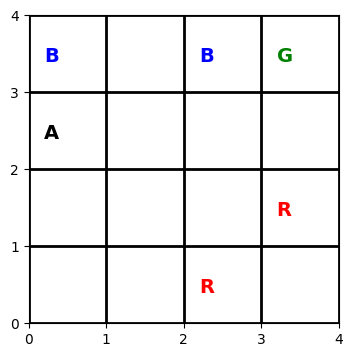

Step: 22
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -22


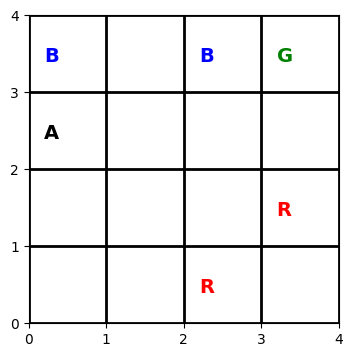

Step: 23
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -23


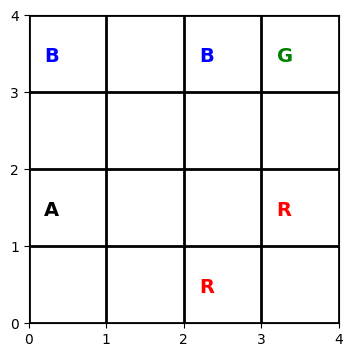

Step: 24
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -24


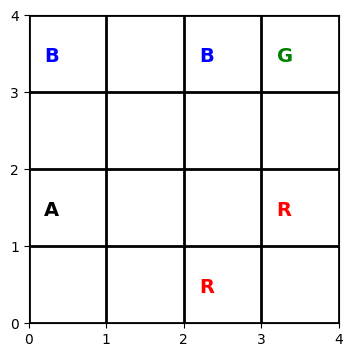

Step: 25
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -25


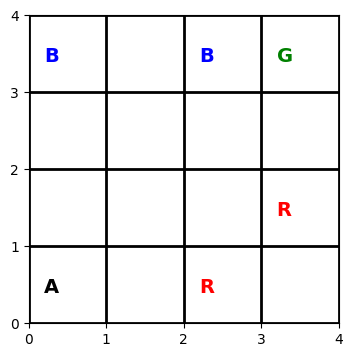

Step: 26
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -26


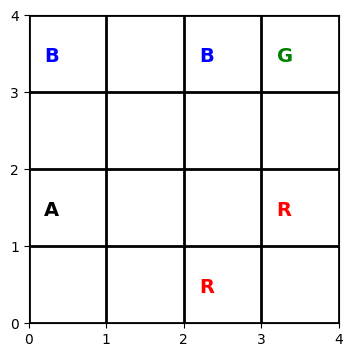

Step: 27
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -27


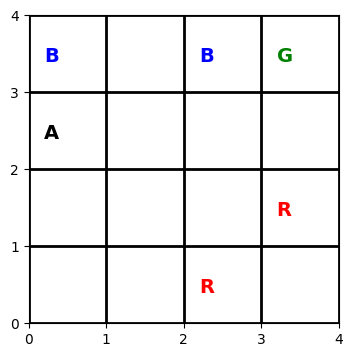

Step: 28
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -28


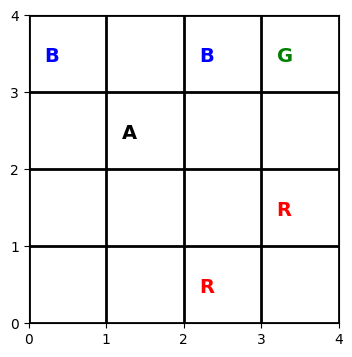

Step: 29
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -29


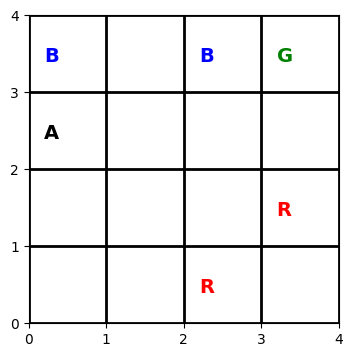

Step: 30
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -30


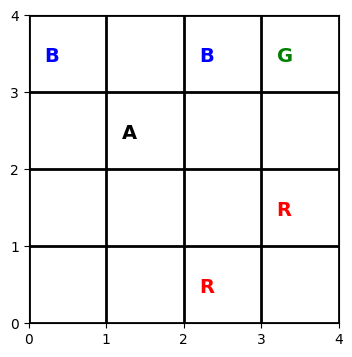

The total reward is  -30


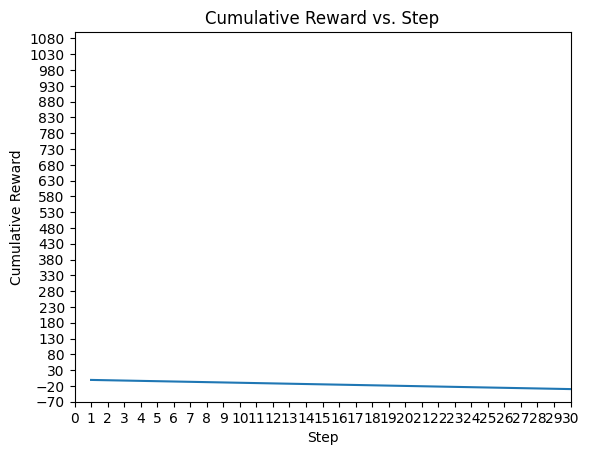

In [71]:
class LawnMower(gym.Env):
    def __init__(self, gamma=0.2, alpha=0.1, epsilon=1.0, epsilon_decay=0.9, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.action_space.n)
        else:
            action = np.argmax(self.Q[state_flat])
        
        return action
    
    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
            done = True
        else:
            reward = -1
        
        # Updating Q-value
        next_state = np.argmax(self.state)
        self.Q[current_state, action] += self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[current_state, action])

        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000:
          done = True
        else:
          done = False
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):

        cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}
        state_int = self.state.astype(int)

        for k, v in cell_types.items():
            state_int[self.state == k] = k

        # Plot
        fig, ax = plt.subplots(figsize=(4,4)) 
        ax.set_xlim(0,4)
        ax.set_ylim(0,4)
        plt.grid()
        plt.xticks([0,1,2,3,4])
        plt.yticks([0,1,2,3,4]) 
        ax.grid(which='both', color='k', linewidth=2)  

        # Inserting 'battery' in grid
        for battery in self.battery:
            ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

        # Inserting 'rock' in grid
        for rock in self.rock:
            ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

        # Inserting 'goal' in grid
        ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

        # Inserting 'agent' in grid
        ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

        plt.show()

env = LawnMower()
obs = env.reset()
done = False
sum = 0
steps = []
cumulative_rewards = []

for each in range(30):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    steps.append(each + 1)
    cumulative_rewards.append(sum)
    
    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

# Rewards Plot
plt.plot(steps, cumulative_rewards)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs. Step')
plt.ylim(-70, 1100)
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, 1))
plt.yticks(np.arange(-70, 1100, 50))

plt.show()

#### Setup 6
*   gamma = 0.2
*   alpha = 0.9

Step: 1
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -1


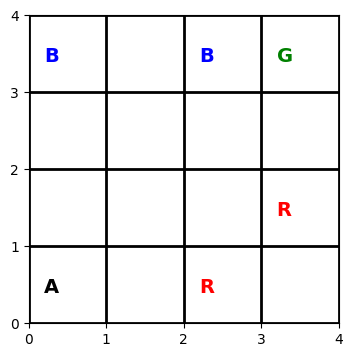

Step: 2
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -2


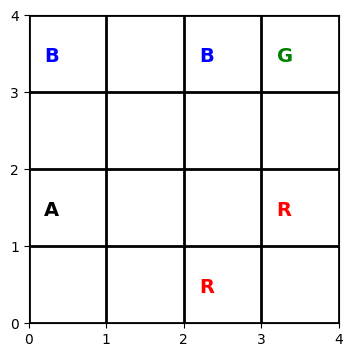

Step: 3
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -3


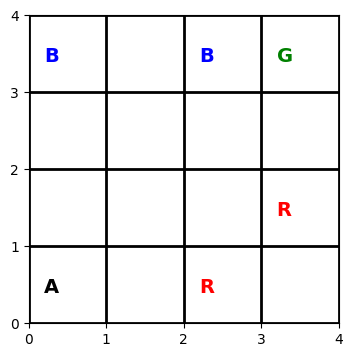

Step: 4
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -4


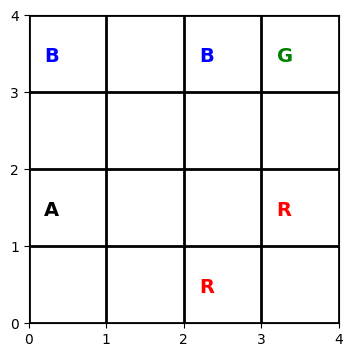

Step: 5
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -5


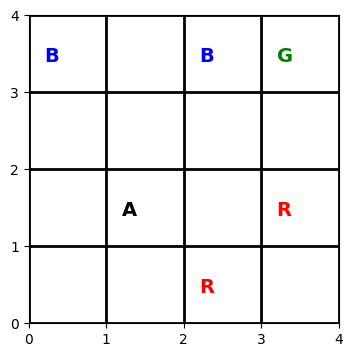

Step: 6
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -6


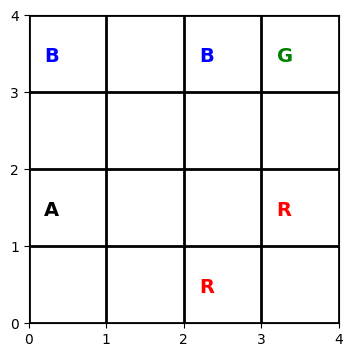

Step: 7
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -7


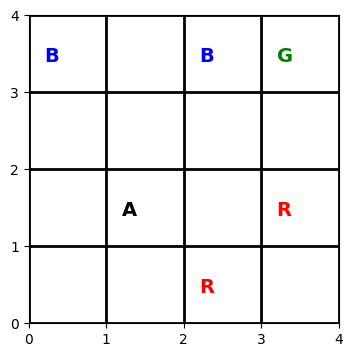

Step: 8
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -8


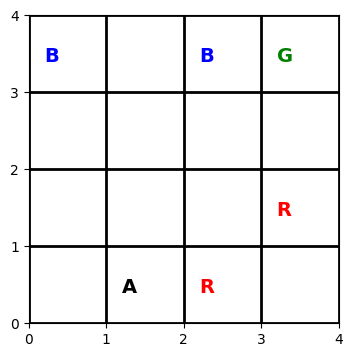

Step: 9
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -9


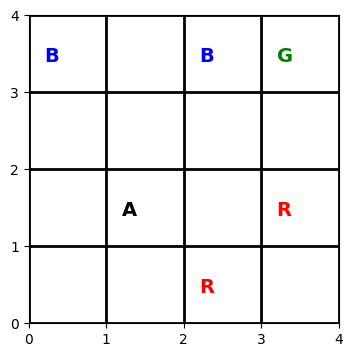

Step: 10
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -10


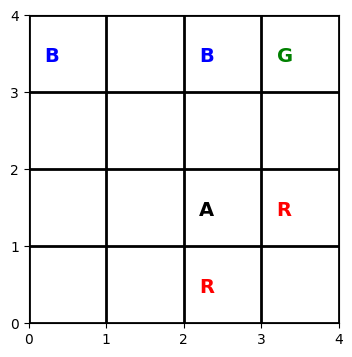

Step: 11
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -11


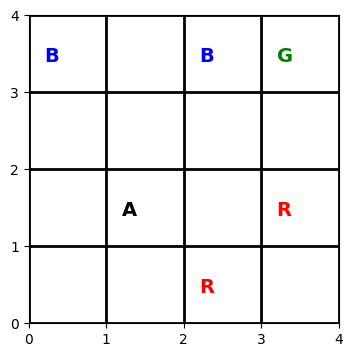

Step: 12
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -12


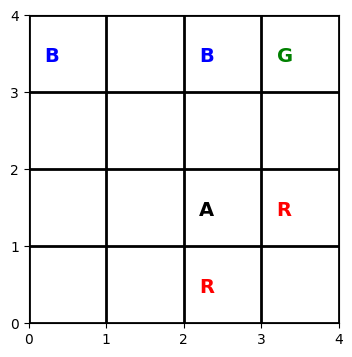

Step: 13
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -13


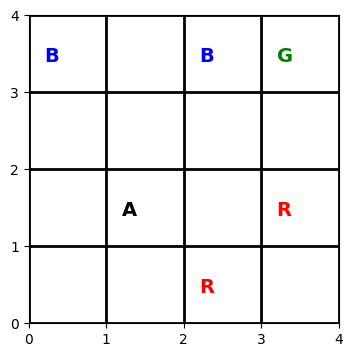

Step: 14
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -14


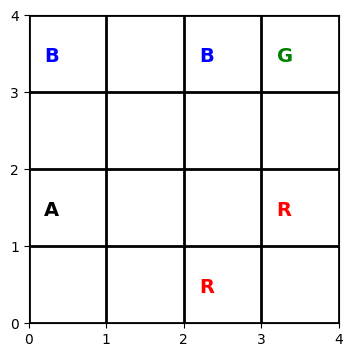

Step: 15
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -15


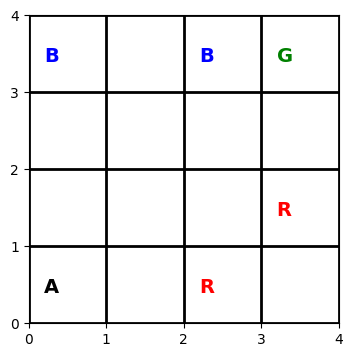

Step: 16
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -16


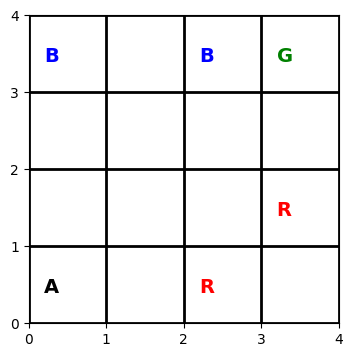

Step: 17
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -17


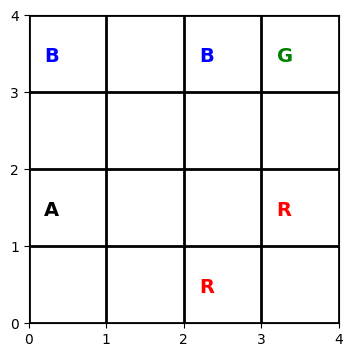

Step: 18
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -18


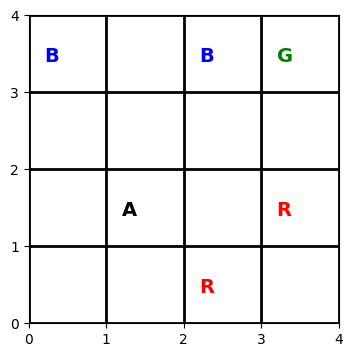

Step: 19
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -19


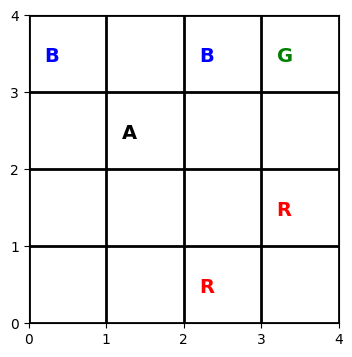

Step: 20
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -20


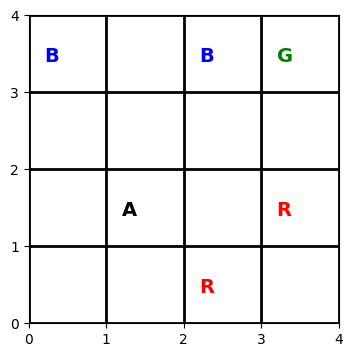

Step: 21
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -21


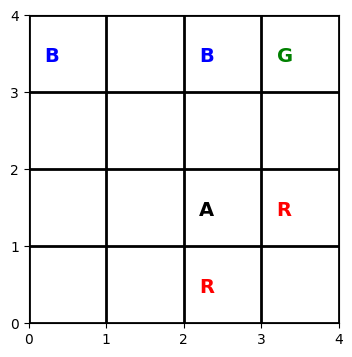

Step: 22
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -31


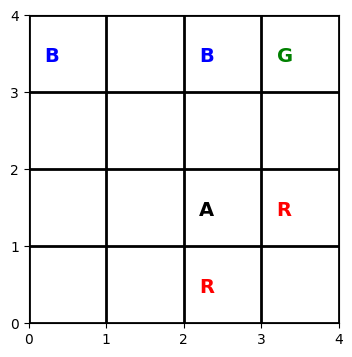

Step: 23
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -32


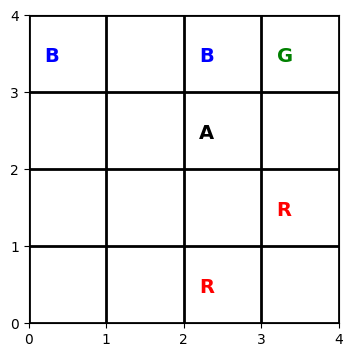

Step: 24
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
Action: 1
Reward: 10
Cummulative Reward: -22


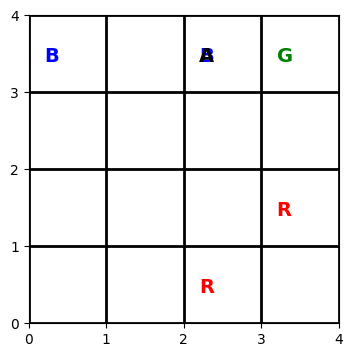

Step: 25
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -23


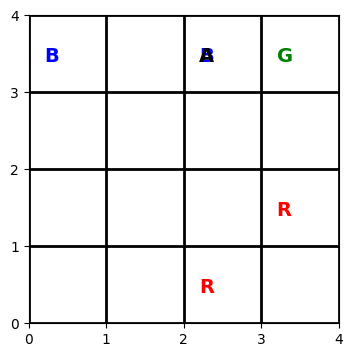

Step: 26
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
Action: 3
Reward: 1000
Cummulative Reward: 977


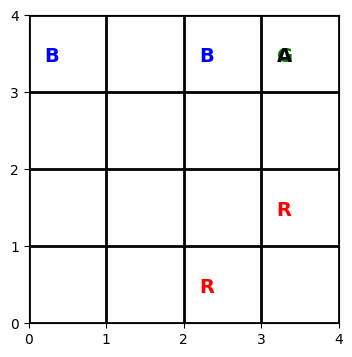

The total reward is  977


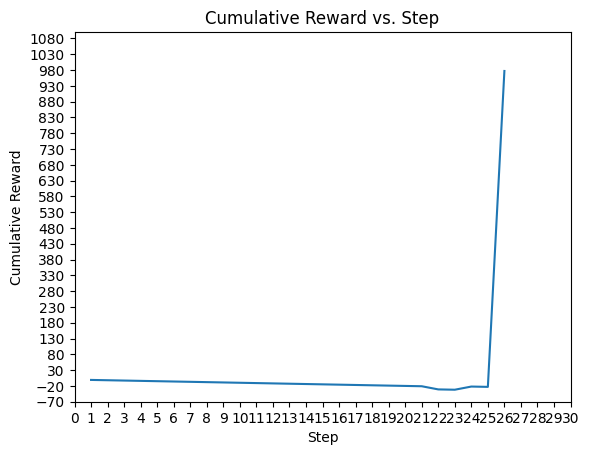

In [70]:
class LawnMower(gym.Env):
    def __init__(self, gamma=0.2, alpha=0.9, epsilon=1.0, epsilon_decay=0.9, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.action_space.n)
        else:
            action = np.argmax(self.Q[state_flat])
        
        return action
    
    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
            done = True
        else:
            reward = -1
        
        # Updating Q-value
        next_state = np.argmax(self.state)
        self.Q[current_state, action] += self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[current_state, action])

        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000:
          done = True
        else:
          done = False
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):

        cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}
        state_int = self.state.astype(int)

        for k, v in cell_types.items():
            state_int[self.state == k] = k

        # Plot
        fig, ax = plt.subplots(figsize=(4,4))
        ax.set_xlim(0,4)
        ax.set_ylim(0,4)
        plt.grid()
        plt.xticks([0,1,2,3,4])
        plt.yticks([0,1,2,3,4])
        ax.grid(which='both', color='k', linewidth=2)

        # Inserting 'battery' in grid
        for battery in self.battery:
            ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

        # Inserting 'rock' in grid
        for rock in self.rock:
            ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

        # Inserting 'goal' in grid
        ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

        # Inserting 'agent' in grid
        ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

        plt.show()

env = LawnMower()
obs = env.reset()
done = False
sum = 0
steps = []
cumulative_rewards = []

for each in range(30):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    steps.append(each + 1)
    cumulative_rewards.append(sum)
    
    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

# Rewards Plot 
plt.plot(steps, cumulative_rewards)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs. Step')
plt.ylim(-70, 1100)
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, 1))
plt.yticks(np.arange(-70, 1100, 50))

plt.show()

Compare the performance of both algorithms on the same environment

Step: 1
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -1


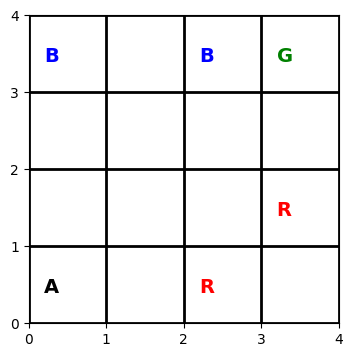

Step: 2
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -2


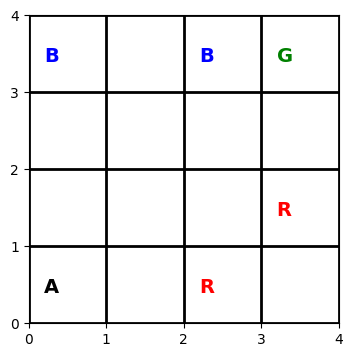

Step: 3
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -3


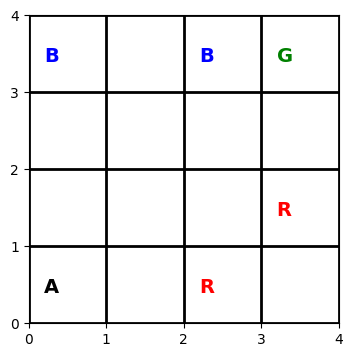

Step: 4
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -4


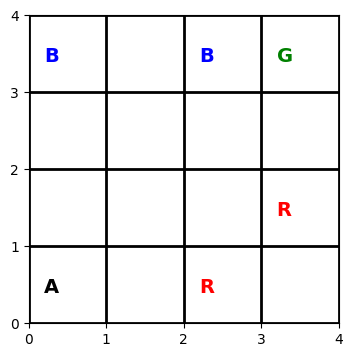

Step: 5
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -5


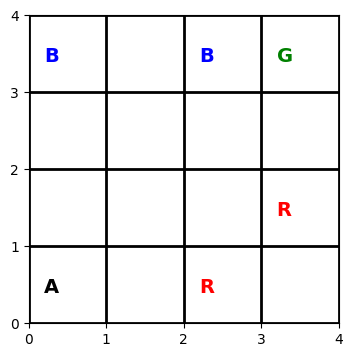

Step: 6
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -6


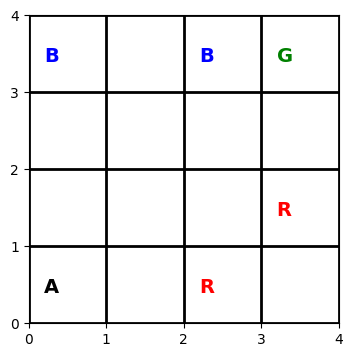

Step: 7
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -7


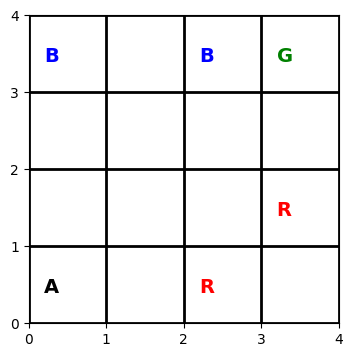

Step: 8
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -8


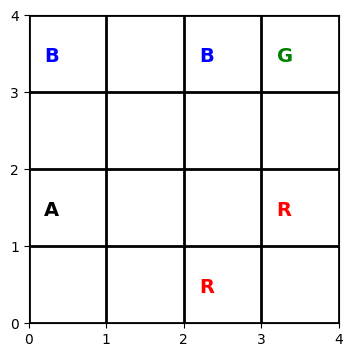

Step: 9
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -9


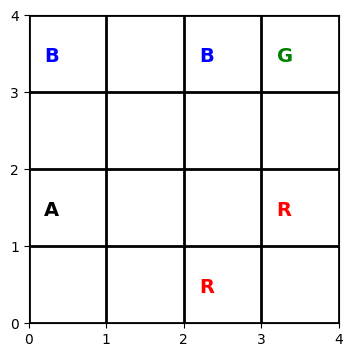

Step: 10
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -10


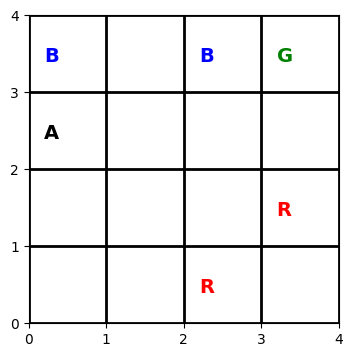

Step: 11
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -11


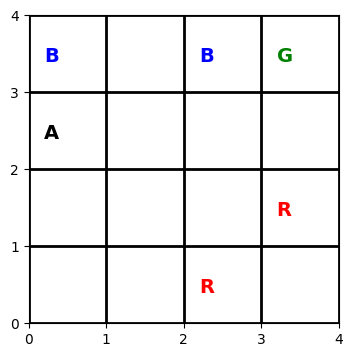

Step: 12
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -12


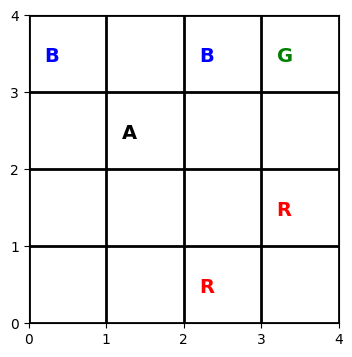

Step: 13
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -13


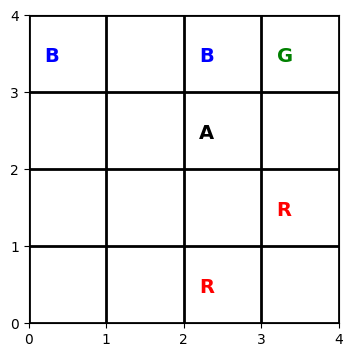

Step: 14
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -14


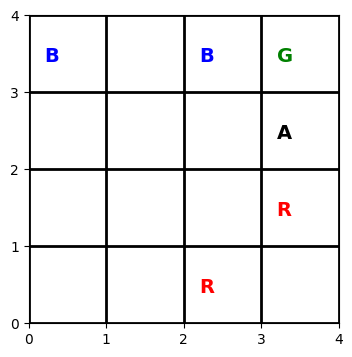

Step: 15
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -15


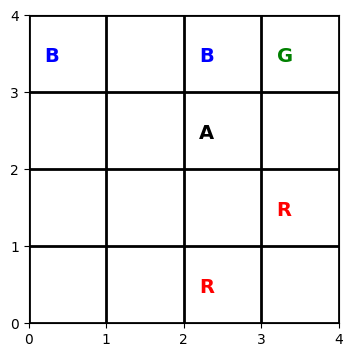

Step: 16
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -16


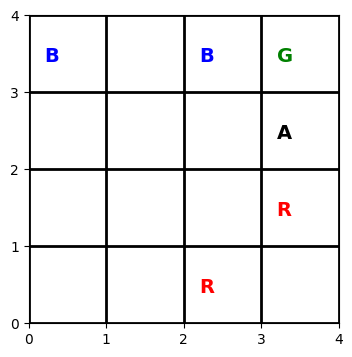

Step: 17
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
Action: 1
Reward: 1000
Cummulative Reward: 984


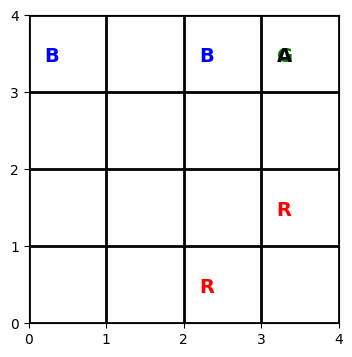

The total reward is  984


In [83]:
#SARSA
class LawnMower(gym.Env):
    def __init__(self, gamma=0.2, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            # Exploration: choose a random action
            action = np.random.choice(self.action_space.n)
        else:
            # Exploitation: choose the action with the highest Q-value
            action = np.argmax(self.Q[state_flat])
        
        return action


    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
        else:
            reward = -1
        
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000:
            done = True
        else:
            done = False

        # Updating agent position
        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos

        target = reward + self.gamma * np.max(self.Q[np.argmax(self.state), :])
        
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):

      # Dictionary for cell types
      cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}

      # Create a copy of the state with integer values
      state_int = self.state.astype(int)

      # Replace integer values with corresponding cell types
      for k, v in cell_types.items():
          state_int[self.state == k] = k

      # Plot
      fig, ax = plt.subplots(figsize=(4,4))  # set figure size
      ax.set_xlim(0,4)
      ax.set_ylim(0,4)
      plt.grid()
      plt.xticks([0,1,2,3,4])
      plt.yticks([0,1,2,3,4]) # set y ticks
      ax.grid(which='both', color='k', linewidth=2)  # add grid
      # ax.imshow(state_int, cmap='Greys')  # show state as image

      # Inserting 'battery' in grid
      for battery in self.battery:
          ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

      # Inserting 'rock' in grid
      for rock in self.rock:
          ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

      # Inserting 'goal' in grid
      ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

      # Inserting 'agent' in grid
      ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

      plt.show()



env = LawnMower()
obs = env.reset()
done = False
sum = 0

steps = []
cumulative_rewards = []


for each in range(20):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward
    
    steps.append(each + 1)
    cumulative_rewards.append(sum)

    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)


# plt.plot(steps, cumulative_rewards)
# plt.xlabel('Step')
# plt.ylabel('Cumulative Reward')
# plt.title('Cumulative Reward vs. Step')

# plt.ylim(-60, 1100)
# plt.xlim(0,20)
# plt.xticks(np.arange(0, 21, 1))
# plt.yticks(np.arange(-50, 1100, 50))


# plt.show()


Step: 1
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -1


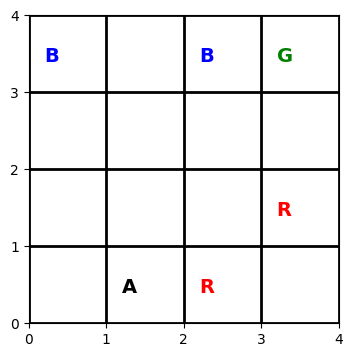

Step: 2
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -10
Cummulative Reward: -11


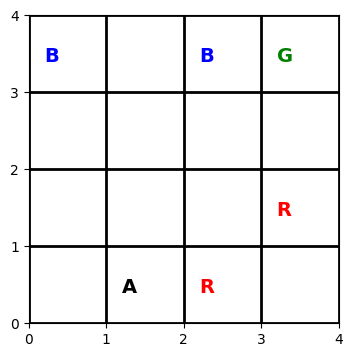

Step: 3
State: [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -12


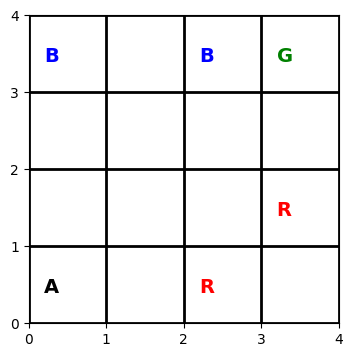

Step: 4
State: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -13


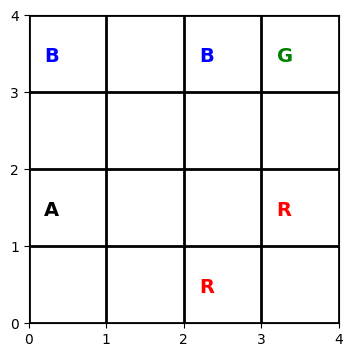

Step: 5
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -14


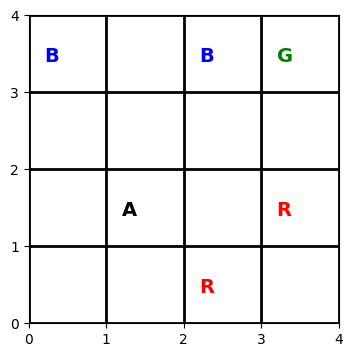

Step: 6
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 3
Reward: -1
Cummulative Reward: -15


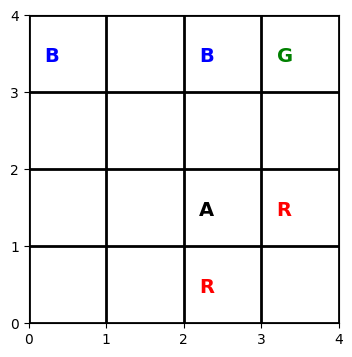

Step: 7
State: [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -10
Cummulative Reward: -25


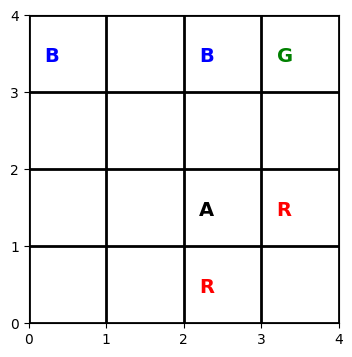

Step: 8
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 2
Reward: -1
Cummulative Reward: -26


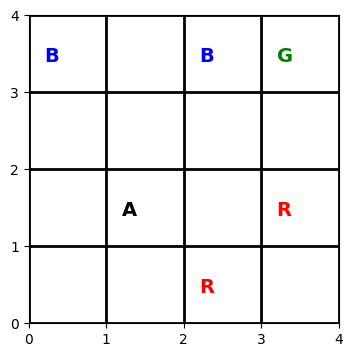

Step: 9
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -27


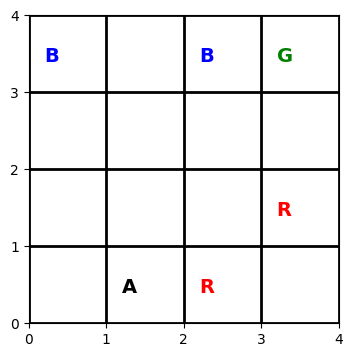

Step: 10
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -28


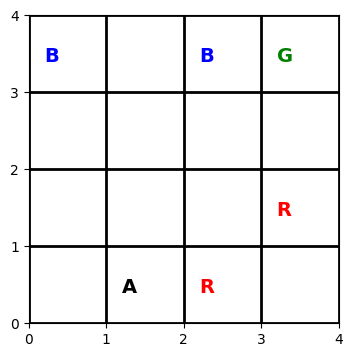

Step: 11
State: [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 0
Reward: -1
Cummulative Reward: -29


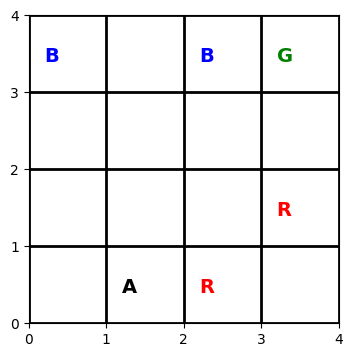

Step: 12
State: [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -30


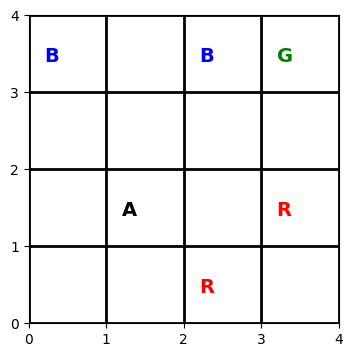

Step: 13
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -31


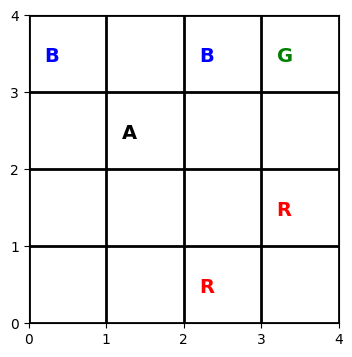

Step: 14
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -32


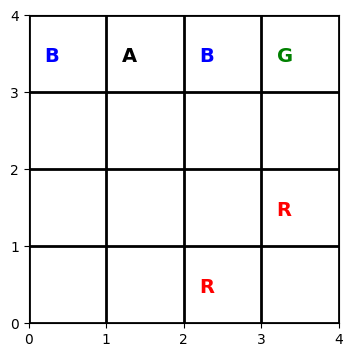

Step: 15
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
Action: 3
Reward: 10
Cummulative Reward: -22


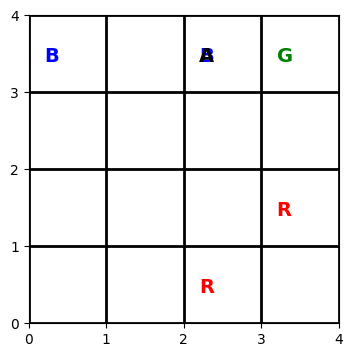

Step: 16
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
Action: 1
Reward: -1
Cummulative Reward: -23


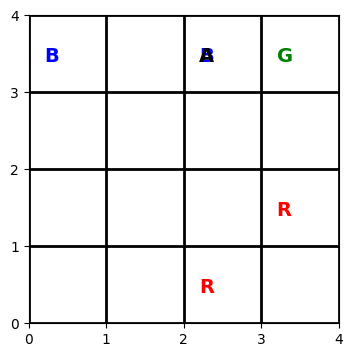

Step: 17
State: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
Action: 3
Reward: 1000
Cummulative Reward: 977


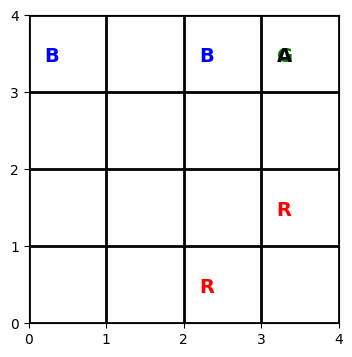

The total reward is  977


In [89]:

# Q-Learning

class LawnMower(gym.Env):
    def __init__(self,gamma=0.5, alpha=0.5, epsilon=1.0, epsilon_decay=0.9, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)
        
        self.Q = np.zeros((self.observation_space.n, self.action_space.n))
        
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.reset()
    
    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state
    
    def choose_action(self, state):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.action_space.n)
        else:
            action = np.argmax(self.Q[state_flat])
        
        return action
    
    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
    
    def step(self, action):
        current_state = np.argmax(self.state)
        new_pos = self.agent_pos
        
        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')
        
        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}
        
        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
            done = True
        else:
            reward = -1
        
        # Updating Q-value
        next_state = np.argmax(self.state)
        self.Q[current_state, action] += self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[current_state, action])

        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos
        
        if reward == 1000:
          done = True
        else:
          done = False
        self.update_epsilon()
        
        return self.state, reward, done, {}

    def render(self, mode='human'):

        cell_types = {0: ' ', 1: 'B', 2: 'R', 3: 'G', 4: 'A'}
        state_int = self.state.astype(int)

        for k, v in cell_types.items():
            state_int[self.state == k] = k

        # Plot
        fig, ax = plt.subplots(figsize=(4,4))
        ax.set_xlim(0,4)
        ax.set_ylim(0,4)
        plt.grid()
        plt.xticks([0,1,2,3,4])
        plt.yticks([0,1,2,3,4]) 
        ax.grid(which='both', color='k', linewidth=2) 

        # Inserting 'battery' in grid
        for battery in self.battery:
            ax.text(battery[1]+0.2, battery[0]+0.4, 'B', fontsize=14, color='blue', fontweight='bold')

        # Inserting 'rock' in grid
        for rock in self.rock:
            ax.text(rock[1]+0.2, rock[0]+0.4, 'R', fontsize=14, color='red', fontweight='bold')

        # Inserting 'goal' in grid
        ax.text(self.goal[1]+0.2, self.goal[0]+0.4, 'G', fontsize=14, color='green', fontweight='bold')

        # Inserting 'agent' in grid
        ax.text(self.agent_pos[1]+0.2, self.agent_pos[0]+0.4, 'A', fontsize=14, color='black', fontweight='bold')

        plt.show()

env = LawnMower()
obs = env.reset()
done = False
sum = 0
steps = []
q_cumulative_rewards = []
 
for each in range(30):
    act = env.action_space.sample()
    obs, reward, done, info = env.step(act)
    sum += reward

    steps.append(each + 1)
    q_cumulative_rewards.append(sum)

    print("Step:", each+1)
    print("State:", obs.reshape((4,4)))
    print("Action:", act)
    print("Reward:", reward)
    print('Cummulative Reward:', sum)
    env.render()
    if done:
      break

print("The total reward is ", sum)

# plt.plot(steps, cumulative_rewards)
# plt.xlabel('Step')
# plt.ylabel('Cumulative Reward')
# plt.title('Cumulative Reward vs. Step')
# plt.ylim(-50, 1100)
# plt.xlim(0,30)
# plt.xticks(np.arange(0, 31, 1))
# plt.yticks(np.arange(-50, 1000, 50))

# plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


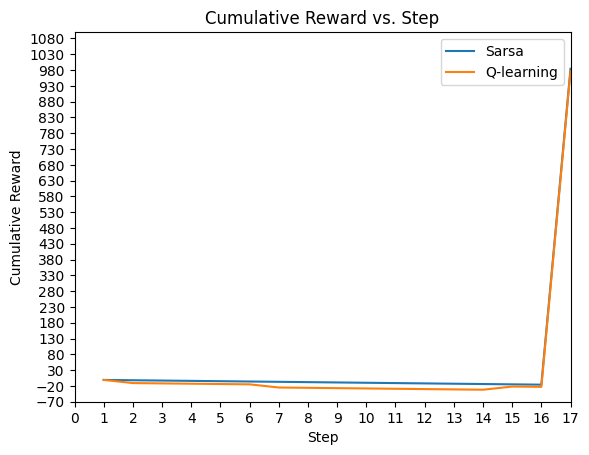

In [91]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
plt.plot(steps, cumulative_rewards, label='Sarsa')
plt.plot(steps, q_cumulative_rewards, label='Q-learning')
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs. Step')
plt.ylim(-70, 1100)
plt.xlim(0, max(steps))
plt.xticks(np.arange(0, max(steps)+1, 1))
plt.yticks(np.arange(-70, 1100, 50))
plt.legend()
plt.show()

# BONUS

In [21]:
class LawnMower:
    def __init__(self, gamma=0.9, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01):
        self.state = np.zeros((4, 4))
        self.battery = [[3, 0], [3, 2]]
        self.rock = [[0, 2], [1, 3]]
        self.goal = [3, 3]
        self.agent_pos = np.array([0, 0])
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(16)

        self.Q_sarsa = np.zeros((self.observation_space.n, self.action_space.n))
        self.Q_2step_sarsa = np.zeros((self.observation_space.n, self.action_space.n))

        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

        self.reset()

    def reset(self):
        self.state = np.zeros((4, 4))
        self.state[0, 0] = 1
        self.agent_pos = np.array([0, 0])
        return self.state

    def choose_action(self, state, q_values):
        state_flat = state.flatten().astype(int)
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.action_space.n)
        else:
            action = np.argmax(q_values[state_flat])

        return action

    def update_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)

    def step(self, action, q_values):
        current_state = np.ravel_multi_index(np.where(self.state == 1), self.state.shape)[0]
        new_pos = self.agent_pos

        if action == 0:  # Up
            new_pos = self.agent_pos + np.array([-1, 0])
        elif action == 1:  # Down
            new_pos = self.agent_pos + np.array([1, 0])
        elif action == 2:  # Left
            new_pos = self.agent_pos + np.array([0, -1])
        elif action == 3:  # Right
            new_pos = self.agent_pos + np.array([0, 1])
        else:
            print('Error')

        if not (0 <= new_pos[0] < 4 and 0 <= new_pos[1] < 4):
            reward = -1
            done = False
            return self.state, reward, done, {}

        if list(new_pos) in self.rock:
            reward = -10
            done = False
            return self.state, reward, done, {}
        elif list(new_pos) in self.battery:
            reward = 10
        elif list(new_pos) == list(self.goal):
            reward = 1000
        else:
            reward = -1

        self.state[self.agent_pos[0], self.agent_pos[1]] = 0
        self.state[new_pos[0], new_pos[1]] = 1
        self.agent_pos = new_pos

        if reward == 1000:
            done = True
        else:
            done = False

        next_action = self.choose_action(self.state, q_values)

        next_state = np.ravel_multi_index(np.where(self.state == 1), self.state.shape)[0]
        target = reward + self.gamma * q_values[next_state, next_action]
        q_values[current_state, action] += 0.1 * (target - q_values[current_state, action])

        self.update_epsilon()

        return self.state, reward, done, q_values

    def train_sarsa(self, num_episodes):
        sum_rewards = []
        for episode in range(num_episodes):
            obs = self.reset()
            done = False
            episode_reward = 0

            while not done:
                action = self.choose_action(obs, self.Q_sarsa)
                obs, reward, done, self.Q_sarsa = self.step(action, self.Q_sarsa)
                episode_reward += reward

            sum_rewards.append(episode_reward)

        return sum_rewards

    def train_2step_sarsa(self, num_episodes):
        sum_rewards = []
        for episode in range(num_episodes):
            obs = self.reset()
            done = False
            episode_reward = 0

            while not done:
                action = self.choose_action(obs, self.Q_2step_sarsa)
                obs, reward, done, q_values = self.step(action, self.Q_2step_sarsa)

                if not done:
                    next_action, _ = self.choose_action(obs, q_values)
                    next_state = np.ravel_multi_index(np.where(obs == 1), obs.shape)[0]
                    target = reward + self.gamma * q_values[next_state, next_action]
                    self.Q_2step_sarsa[next_state, action] += 0.1 * (target - self.Q_2step_sarsa[next_state, action])

                episode_reward += reward

            sum_rewards.append(episode_reward)

        return sum_rewards


# SARSA
sarsa_agent = LawnMower()
sarsa_rewards = sarsa_agent.train_sarsa(num_episodes=20)

# 2-step SARSA
two_step_sarsa_agent = LawnMower()
two_step_sarsa_rewards = two_step_sarsa_agent.train_2step_sarsa(num_episodes=20)

# Plot rewards
plt.plot(sarsa_rewards, label='SARSA')
plt.plot(two_step_sarsa_rewards, label='2-step SARSA')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Comparison of SARSA and 2-step SARSA')
plt.legend()
plt.show()


KeyError: ignored

## References

https://www.sharpsightlabs.com/blog/numpy-argmax/

https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

https://www.gymlibrary.dev/

https://optuna.org/

https://www.geeksforgeeks.org/sarsa-reinforcement-learning/

https://towardsdatascience.com/sarsa-vs-q-learning-a-comparative-study-62d29a4c2848

https://towardsdatascience.com/q-learning-algorithm-from-explanation-to-implementation-cdbeda2ea187?gi=363481e11c10

https://www.geeksforgeeks.org/sarsa-reinforcement-learning/

https://medium.com/reinforcement-learning-a-step-by-step-implementati/reinforcement-learning-a-step-by-step-implementation-using-sarsa-1cfd3e64775a

https://builtin.com/machine-learning/sarsa